In [6]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import glob
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path#
import ipdb
from itertools import combinations,product

In [1]:
!pip install ipdb
! pip install seaborn==0.9.0

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Import History Data for analysis

In [ ]:
pickle_dictionary=[]
add_info=[('learn_rate',['0.0003','0.001','0.01','0.1']),
          ('samp_sz',['250']),('btch_sz',['3','7']),
          ('loss_type',['dice','focal','cat'])]

for file in final_list:
    
    if os.path.getsize(file) > 0:
        #print('file found:',file)
        with open(file, "rb") as f:
            unpickler = pickle.Unpickler(f)
            file_dict = unpickler.load()
        #Acquiring file information based on keys in add info from file string.  
        file_dict,split_vals=get_file_info(file,add_info)
            
        #finding if additional sequence values present
        seq_lst=[x for x in split_vals if x in ['pt2','pt3','pt4']]
        
        if len(seq_lst)>0:
            print('appended_values')
            
            #due to sorting of list if pt 2 is found it is found directly after the initial file hence this matching approach
            pickle_dictionary[len(pickle_dictionary)-1],tmp_chk=FullMergeDict(pickle_dictionary[len(pickle_dictionary)-1], 
                                                                              file_dict)
        else:
            #ipdb.set_trace()
            pickle_dictionary.append(file_dict)
    else:
        print('no values in data:',file)


    
    #print(file_dict['btch_sz'])
    #print(file_dict['learn_rate'])
    #print(file_dict['samp_sz'])
    #print(file_dict['loss'])
    

In [26]:
file

'F:\\Results\\Unet\\250 strd\\history_info\\history_files\\focal_loss_bckgrnd_in_loss\\btch_sz_7\\t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_focal_loss_all_cls_idx_trn_samp_sz_250_btch_sz_7_lr_0.1_time_2019-10-23_history'

In [7]:
def get_file_info(file,add_info):
    """The purpose of this method is to pull file information from the file name presnet in the string"""
    split_vals=file.split('_')
    split_vals.sort()
    #Iterate through additional information of set of tuples on file strings for analysis
    for param_k,param_v in add_info:

        file_dict[param_k]=[x for x in param_v if x in split_vals][0]
    return file_dict,split_vals

In [8]:
def FullMergeDict(D1, D2):
    """The purpose of this method is to merge two dictoinaries irrespective of  variable types"""
    
    for key, value in D1.items():
        #ipdb.set_trace()
        if key in D2:
            if type(value) is dict:
                FullMergeDict(D1[key], D2[key])  
            else:
                if type(value) in (int, float, str):    
                    D1[key] = value
                if type(D2[key]) is list:
                    D1[key].extend(D2[key])
                #else:
                 #   D1[key].append(D2[key])
    for key, value in D2.items():
        
        if key not in D1:
            D1[key] = value
    
    return (D1,D2)

# Plot different loss function methods

## Plotting training and validation data for Categorical cross entropy data

In [10]:
loss_type_1='cat'

### Training data

cat
cat
cat
cat
cat
cat


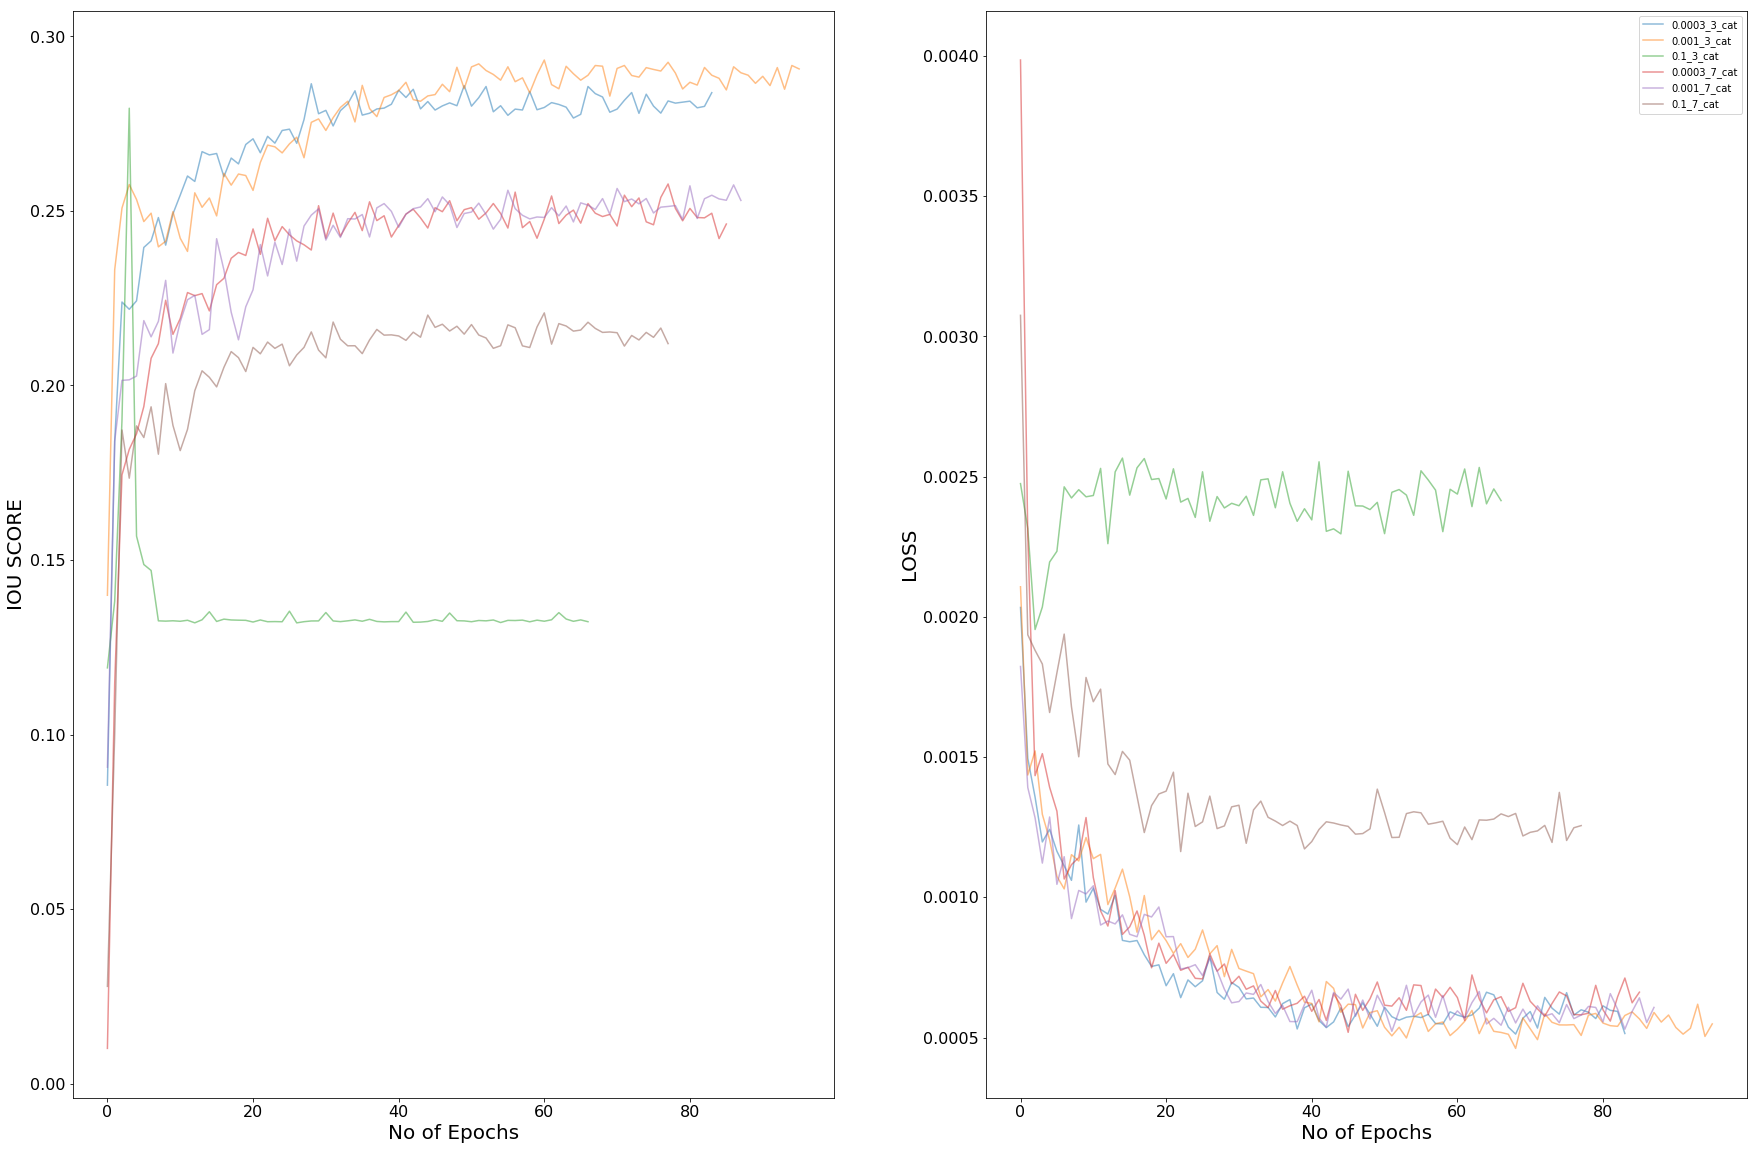

In [11]:
loss_type=loss_type_1
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type and info['learn_rate']!='0.01':
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['iou_score']]#,info
        loss_info_val=[info['loss']]#,info

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

### Validation data

cat
cat
cat
cat
cat
cat


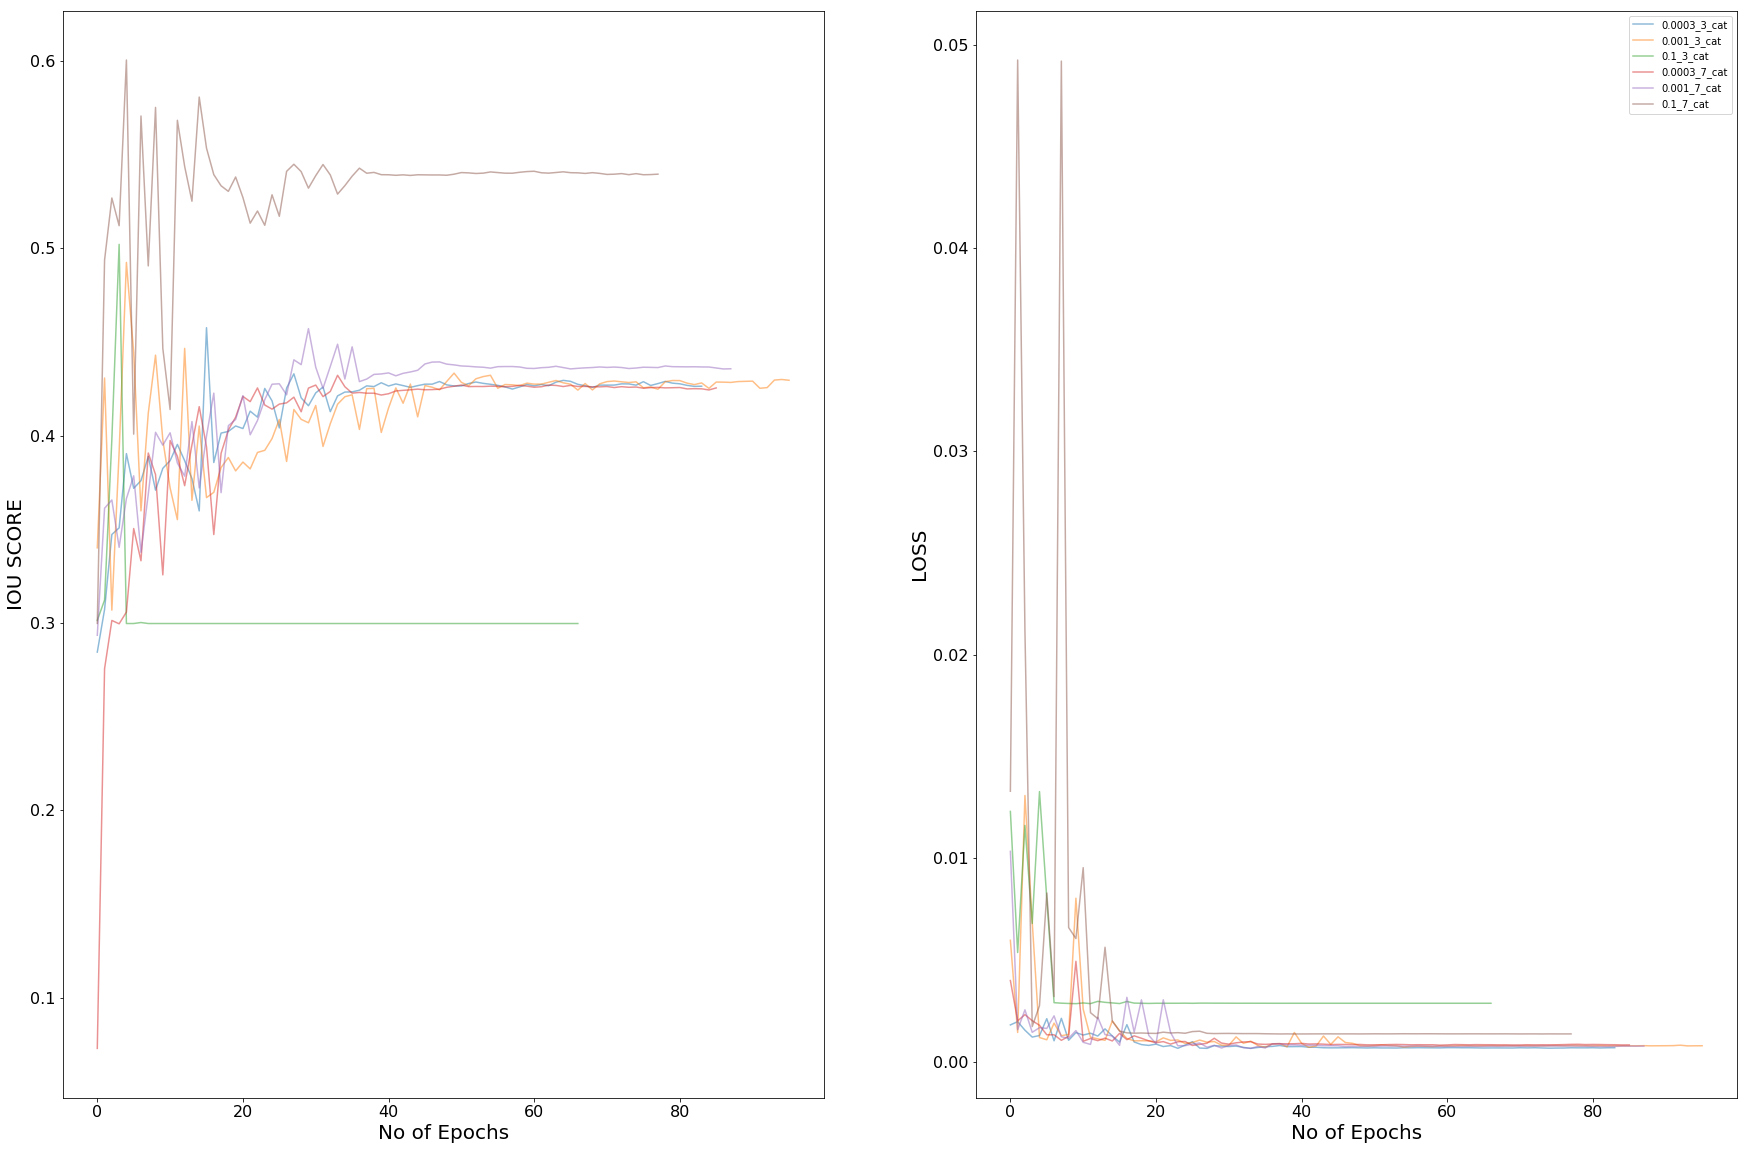

In [12]:
loss_type=loss_type_1
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type and info['learn_rate']!='0.01':
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['val_f1-score']]#,info['iou_score']
        loss_info_val=[info['val_loss']]#,info['loss']

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

## Plotting training and validation data for dice weighted entropy data

In [13]:
loss_type_1='dice'

### Training data

dice
dice
dice
dice
dice
dice


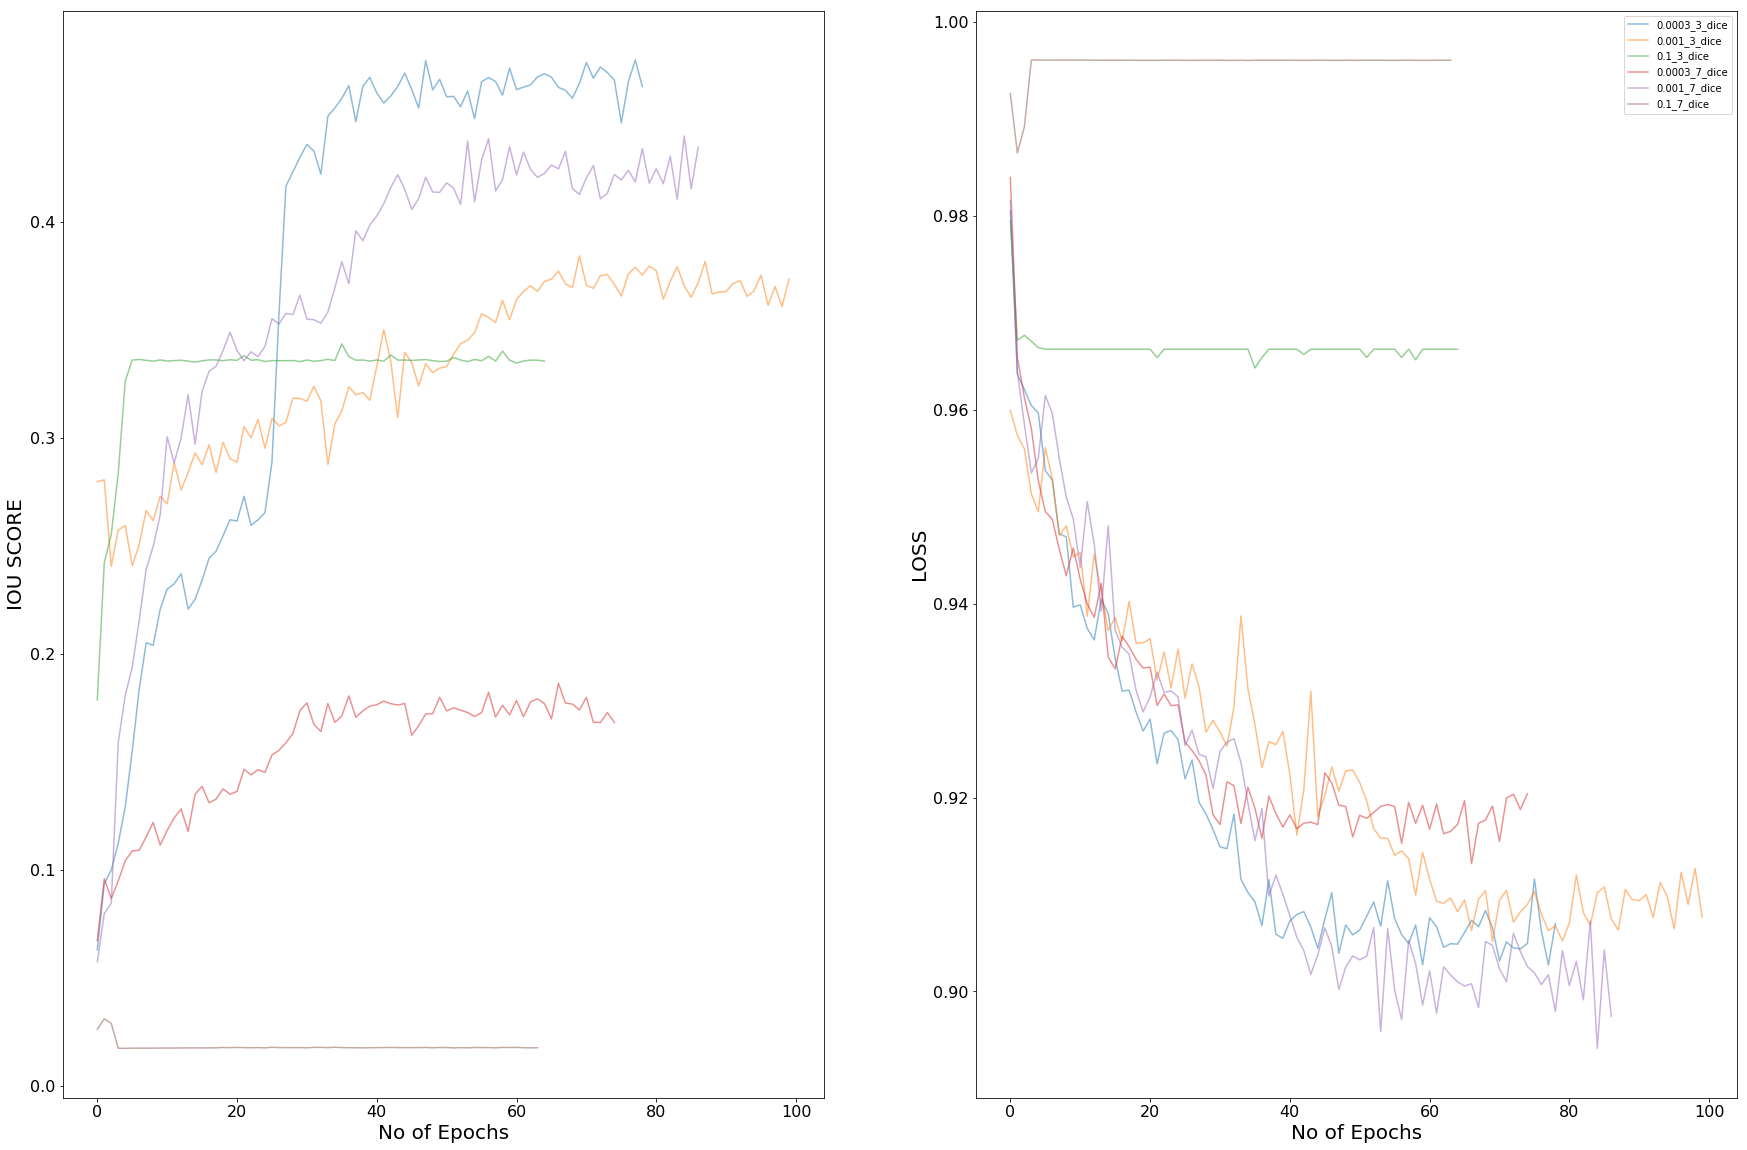

In [14]:
loss_type=loss_type_1
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type and info['learn_rate']!='0.01':
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['iou_score']]#,info
        loss_info_val=[info['loss']]#,info

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

### Validation data

dice
dice
dice
dice
dice
dice


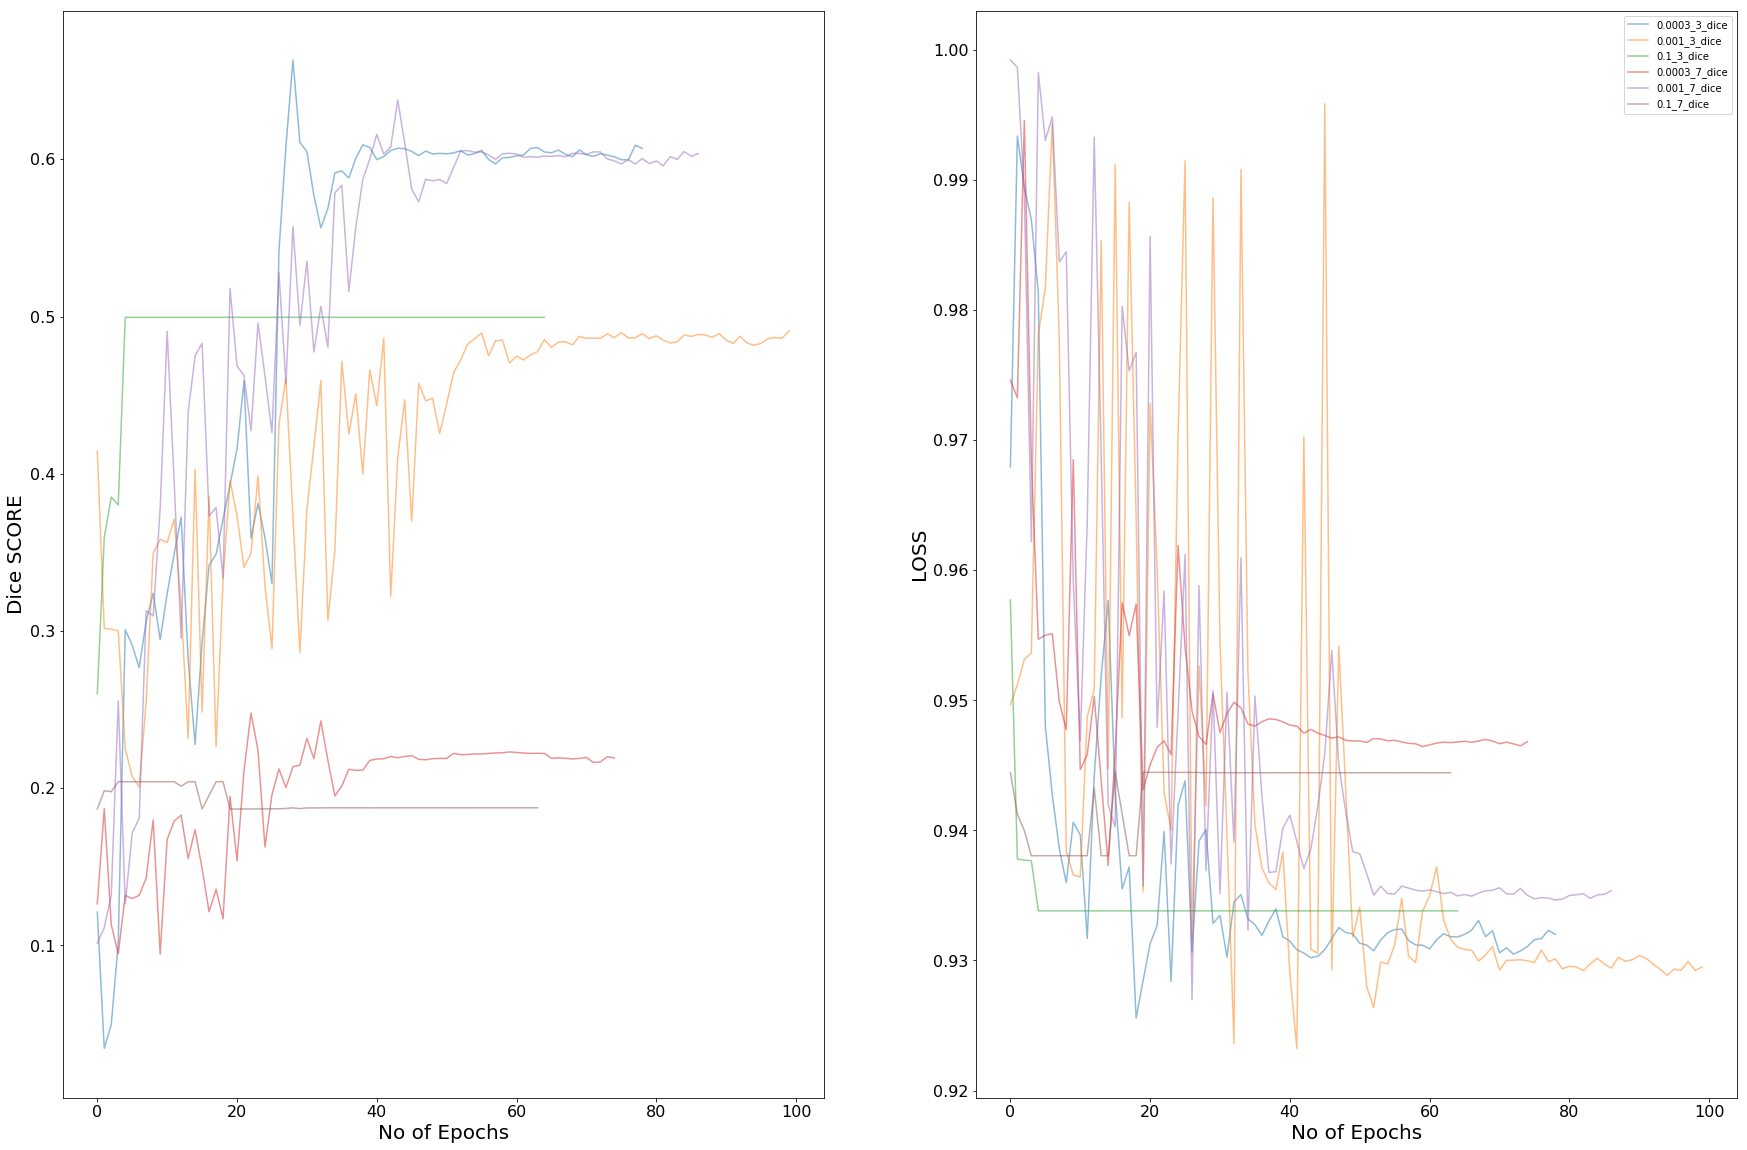

In [15]:
loss_type=loss_type_1
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type and info['learn_rate']!='0.01':
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['val_f1-score']]#,info['iou_score']
        loss_info_val=[info['val_loss']]#,info['loss']

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('Dice SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

## Plotting training and validation data for dice weighted entropy data

In [18]:
loss_type_1='focal'

### Training data

focal
focal
focal
focal
focal
focal
focal
focal
focal
focal
focal
focal


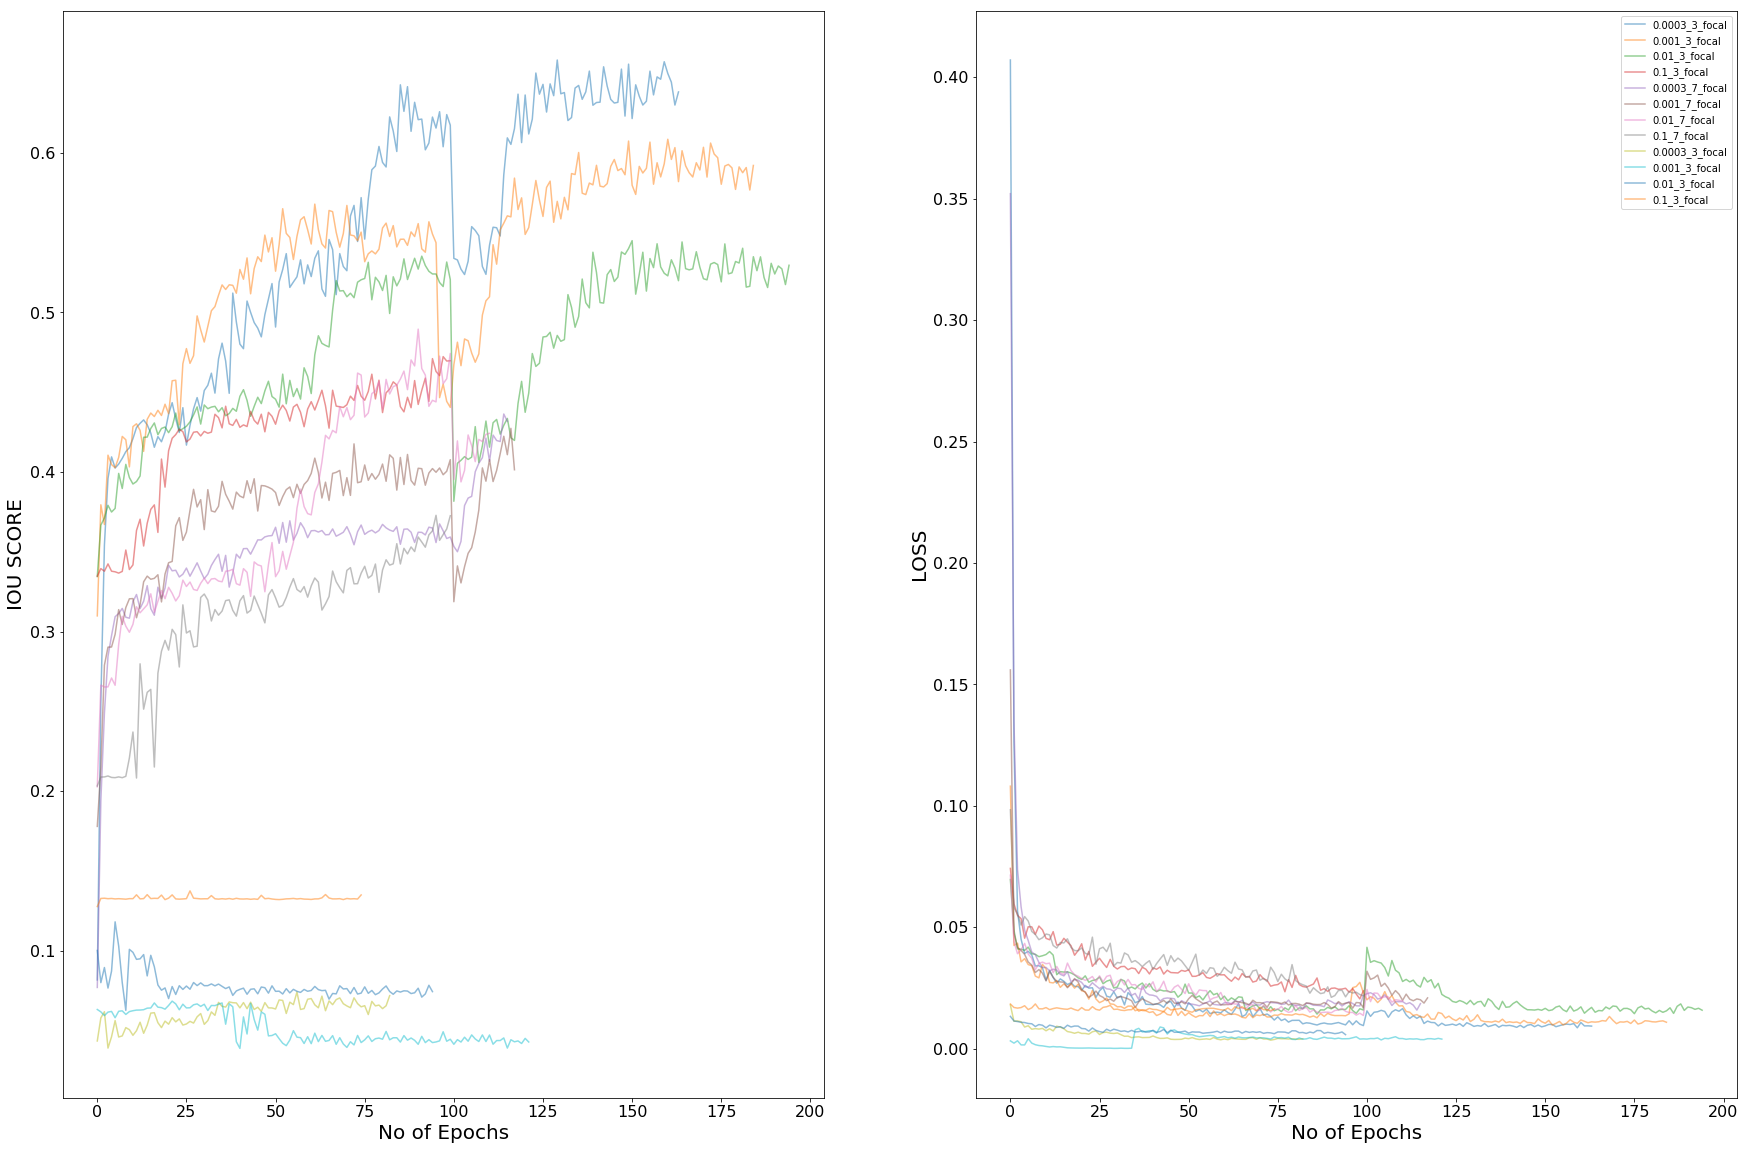

In [19]:
loss_type=loss_type_1
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type:# and info['learn_rate']!='0.01'
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['iou_score']]#,info
        loss_info_val=[info['loss']]#,info

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

### Validation data

focal
focal
focal
focal
focal
focal
focal
focal
focal
focal
focal
focal


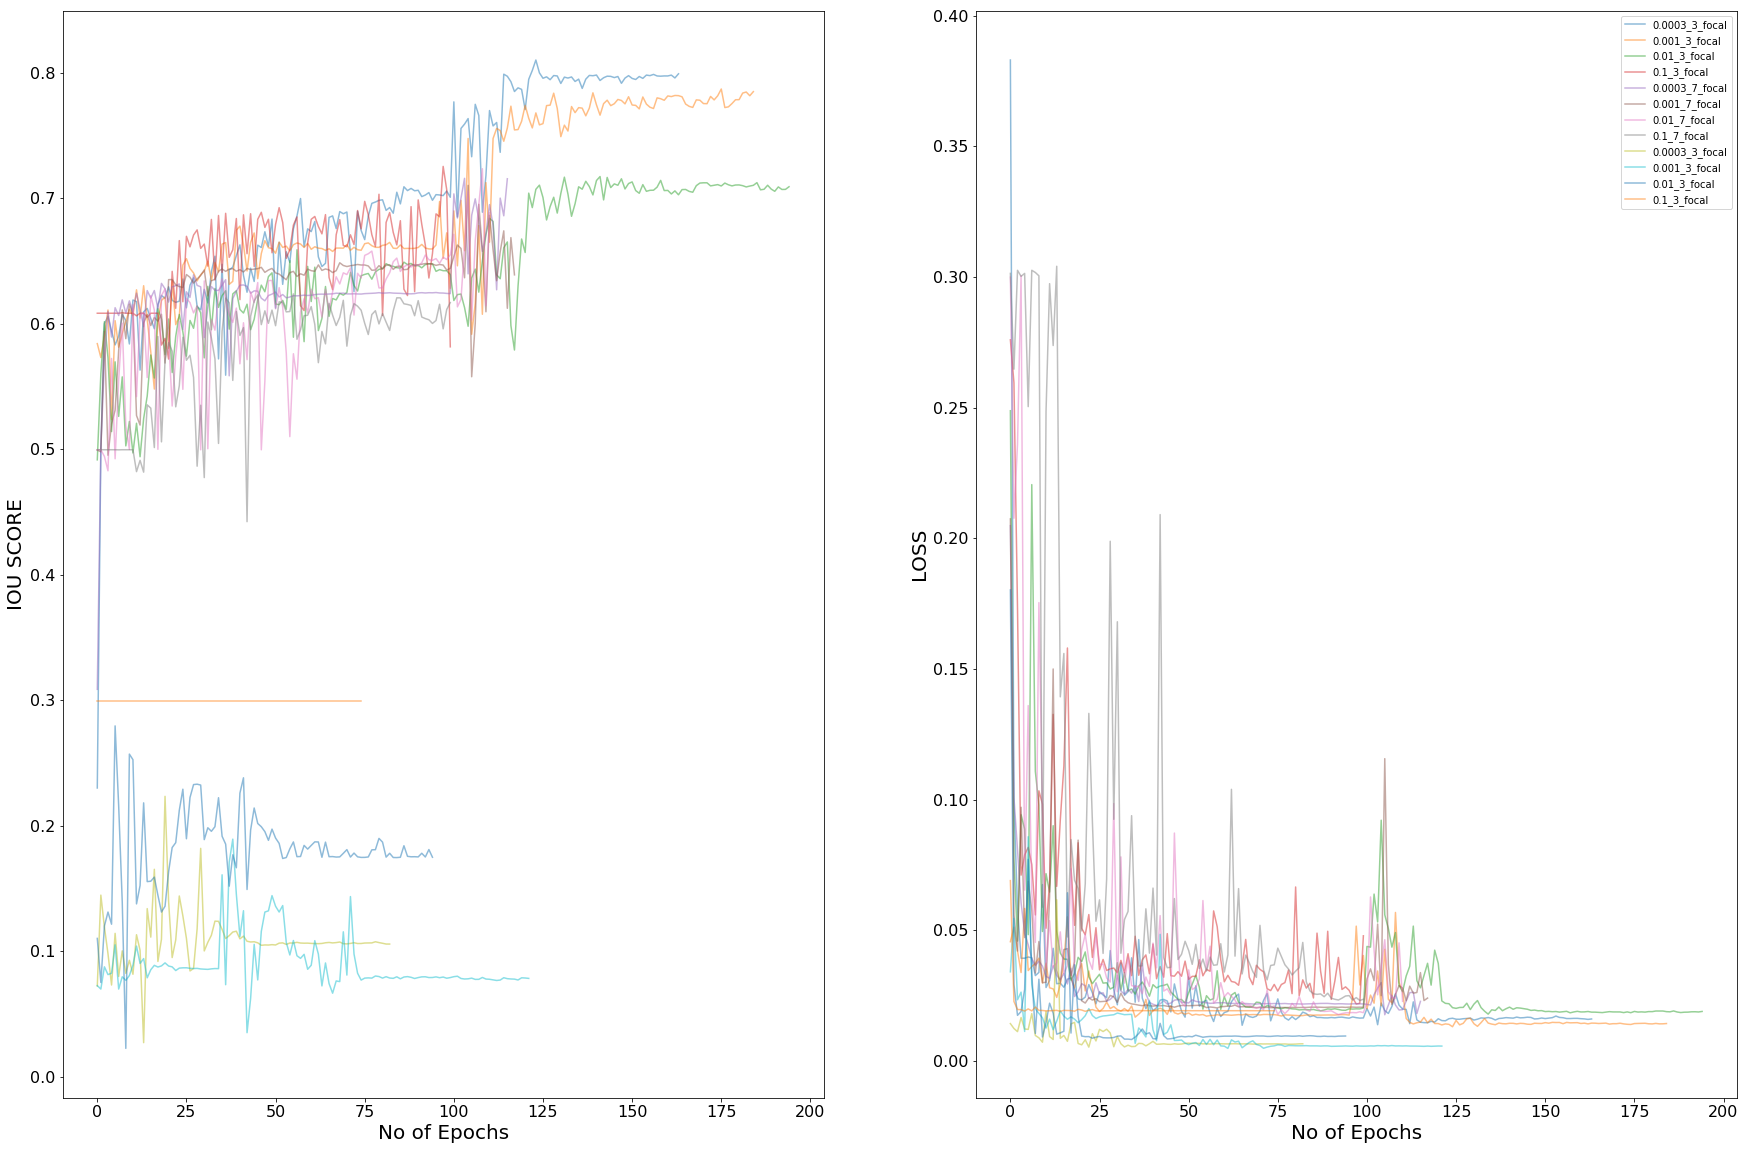

In [20]:
loss_type=loss_type_1
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type:#and info['learn_rate']!='0.01'
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['val_f1-score']]#,info['iou_score']
        loss_info_val=[info['val_loss']]#,info['loss']

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

# Per class analysis of plots

## Importing data for analysis for running methods and data munging

In [2]:
src='/home/ec2-user/SageMaker/Masters-Thesis-UNet-repository/jupyter_notebooks/weights_history_full/predict_imgs'
fin_df_nm='summary_per_class_dice_score.csv'
final_df=None
#Iterate and write files to directory
for filename in Path(src).rglob('*.csv'):
    #ipdb.set_trace()
    tmp_file=pd.read_csv(filename)
    
    if final_df is None:
        final_df=tmp_file
    else:
        final_df=final_df.append(tmp_file, ignore_index=True)


#final_df.to_csv(os.path.join(src,fin_df_nm))

In [4]:
ls

aggregated_df_for_analysis_visualisation_27_nov_2019.xlsx
aggregated_df_for_analysis_visualisation.xlsx
agg_results/
results_csv/
SegCaps_agg_results.ipynb
segcaps_grd_srch_plt/
SegCaps_multilabel_attempt2/
segcaps_summary_spreadsheet_24_nov_2019.xlsx


In [17]:
final_df=pd.read_excel('aggregated_df_for_analysis_visualisation_27_nov_2019.xlsx')

In [24]:
agg_cols=['loss_func','learn_rate','epoch_no','btch_sz']

final_df.rename(columns={'file_nms':'file_nm',
                 'learning_rates':'learn_rate','loss_function':'loss_func'},inplace=True)

final_df['loss_func'].replace({'generalised_dice_loss':'dice','weighted_softmax':'wce','focal_loss_fixed':'focal'},inplace=True)
final_df.rename(columns={'dice':'file_nm'},inplace=True)
final_df.output_folder.unique()

array(['./Experiments/SegCaps_multilabels_2019-11-04_17-05-39',
       './Experiments/SegCaps_multilabels_2019-11-26_06-35-10',
       './Experiments/SegCaps_multilabels_2019-11-05_22-12-47',
       './Experiments/SegCaps_multilabels_2019-11-05_15-53-33',
       './Experiments/SegCaps_multilabels_2019-11-06_00-11-23',
       './Experiments/SegCaps_multilabels_2019-11-05_20-14-18',
       './Experiments/SegCaps_multilabels_2019-11-09_01-25-53',
       './Experiments/SegCaps_multilabels_2019-11-07_00-15-18',
       './Experiments/SegCaps_multilabels_2019-10-29_11-36-40',
       './Experiments/SegCaps_multilabels_2019-10-29_13-36-34',
       './Experiments/SegCaps_multilabels_2019-11-07_04-11-22',
       './Experiments/SegCaps_multilabels_2019-11-25_19-26-23',
       './Experiments/SegCaps_multilabels_2019-11-02_16-25-11',
       './Experiments/SegCaps_multilabels_2019-11-02_18-22-22',
       './Experiments/SegCaps_multilabels_2019-11-03_00-14-41',
       './Experiments/SegCaps_multilabel

In [20]:
#Aggregation of data for analysis
agg_cols=['loss_func','learn_rate','epoch_no']
col_set=['loss_func','learn_rate']#,'btch_sz'
organs=['right_kidney','left_kidney','spleen','liver','background']

#Patient no for different datasets 
val_ids=['pat_id_21_','pat_id_33_']
test_ids=['pat_id_3_','pat_id_39_','pat_id_2_','pat_id_8_','pat_id_32_']
train_ids_rej=val_ids+test_ids

In [21]:
def agg_per_col(df_tmp,agg_col,meas_col,agg_val='mean'):
    
    #meas_cols_dict={agg_col+'_'+agg_val+'_'+k:agg_val for k in meas_col}
    df_tmp=df_tmp.groupby(agg_cols).mean()
    df_tmp.reset_index(inplace=True)
    return df_tmp

def concat_df_col(df,col_set,new_col_nm):
    
    df[new_col_nm] = df[col_set].apply(lambda row: concat_lsts(col_set,row), axis=1)
    
    return df

def concat_lsts(col_set,row):
    
    return '_'.join(['_'.join([a,b]) for a,b in zip(col_set,
                                             row.values.astype(str))])

def melt_df(df,colset=['epoch_no','learn_rate','loss_func'],var_val='organs',val_nm='dice_score'):
    return df.melt(colset,
                   var_name=var_val,
                   value_name=val_nm)

def find_max_cat_per_col(train_df_mlt,max_col='epoch_no',
                         group_by_params=['loss_func','learn_rate']):
    return train_df_mlt.iloc[train_df_mlt.groupby(group_by_params)[max_col].agg(pd.Series.idxmax)]

def gen_mean_col(df,avrg_cols,mean_col_nm='f1_score_mean'):
    df[mean_col_nm]=df[avrg_cols].mean(axis=1)
    return df

In [22]:


#Converting cols to numeric
final_df[organs] = final_df[organs].apply(pd.to_numeric, errors='coerce')
#Filtering basedon patient id subtrings
train_df=final_df[~final_df['file_nm'].str.contains('|'.join(train_ids_rej), na = False)]
test_df=final_df[final_df['file_nm'].str.contains('|'.join(test_ids), na = False)]
val_df=final_df[final_df['file_nm'].str.contains('|'.join(val_ids), na = False)]

#Creating dictionary to perform iterative analysis 
raw_df_dict={'train_set':train_df,'test_set':test_df,'valid_set':val_df}

#Aggregating columns based on ley  values specified in parameters above
agg_dfs_dict={k:agg_per_col(x,agg_cols,organs) for k,x in raw_df_dict.items()}
agg_df_dict_filt={k:x.drop(['Unnamed: 0','mean','epoch_no_bool'],
                           inplace=True,axis=1) for k,x in agg_dfs_dict.items()}

#Meltting dataframe for all epochs
agg_df_melt_per_epoch={k:melt_df(x,agg_cols) for k,x in agg_dfs_dict.items()}
#Meltting data frame for maximum epoch for heatmap
agg_df_max_epoch_filt={k:find_max_cat_per_col(x) for k,x in agg_dfs_dict.items()}
agg_df_melt_max_epoch={k:melt_df(x,agg_cols) for k,x in agg_df_max_epoch_filt.items()}
#Creating column of average f1 score across classes and determining the maximum value based on this metric
agg_df_mean_f1_dict={k:gen_mean_col(x,organs) for k,x in agg_dfs_dict.items()}
agg_df_max_f1_filt={k:find_max_cat_per_col(x,'f1_score_mean') for k,x in agg_dfs_dict.items()}
agg_df_max_f1_filt
agg_df_max_f1_tmp={k:x.drop('f1_score_mean',inplace=True,axis=1) for k,x in agg_df_max_f1_filt.items()}
agg_df_melt_max_f1={k:melt_df(x,agg_cols) for k,x in agg_df_max_f1_filt.items()}
#agg_dfs_dict['train_set']['f1_score_mean']=agg_dfs_dict['train_set'][organs].mean(axis=1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
agg_df_max_f1_filt['train_set']

loss_func  learn_rate  epoch_no  background     liver  right_kidney  \
1        dice      0.0003         6    0.978478  0.000000      0.000000   
33       dice      0.0010        50    0.502676  0.049571      0.005124   
51       dice      0.0100        50    0.321274  0.047577      0.004961   
69       dice      0.1000        50    0.848082  0.033537      0.006309   
78       dice      0.5000        24    0.941900  0.038794      0.007269   
90       dice      0.9000         6    0.926552  0.062068      0.015463   
140     focal      0.0003        50    0.277399  0.062035      0.009192   
158     focal      0.0010        50    0.283105  0.053144      0.008603   
176     focal      0.0100        50    0.841831  0.035795      0.008265   
185     focal      0.1000        24    0.958154  0.023073      0.007602   
197     focal      0.5000         6    0.935898  0.044527      0.012100   
228     focal      0.9000         6    0.966498  0.025260      0.003458   
247       wce      0.0003        12    0.711155  0.085543      0.014125   
270       wce      0.0010        30    0.311874  0.048564      0.006425   
298       wce      0.0100        50    0.380575  0.052528      0.004282   
354       wce      0.1000       244    0.733295  0.097659      0.013245   
395       wce      0.5000        24    0.744253  0.083231      0.012928   
420       wce      0.9000        18    0.818239  0.074074      0.019463   

     left_kidney    spleen  
1       0.000000  0.000000  
33      0.008459  0.009027  
51      0.007893  0.009031  
69      0.005081  0.007991  
78      0.010471  0.010496  
90      0.015911  0.015522  
140     0.007414  0.005047  
158     0.007846  0.004891  
176     0.008778  0.008957  
185     0.009878  0.004889  
197     0.014314  0.012982  
228     0.002823  0.009901  
247     0.015611  0.017837  
270     0.007326  0.007827  
298     0.007864  0.008798  
354     0.013387  0.015877  
395     0.014418  0.016417  
420     0.019433  0.019373

Dataset type train_set


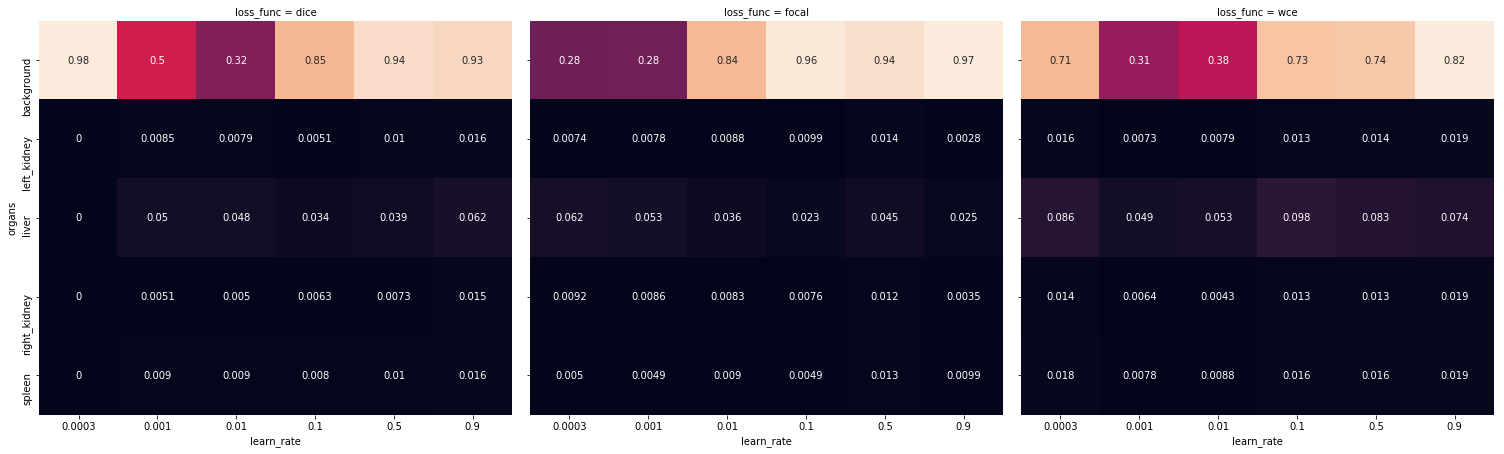

Dataset type test_set


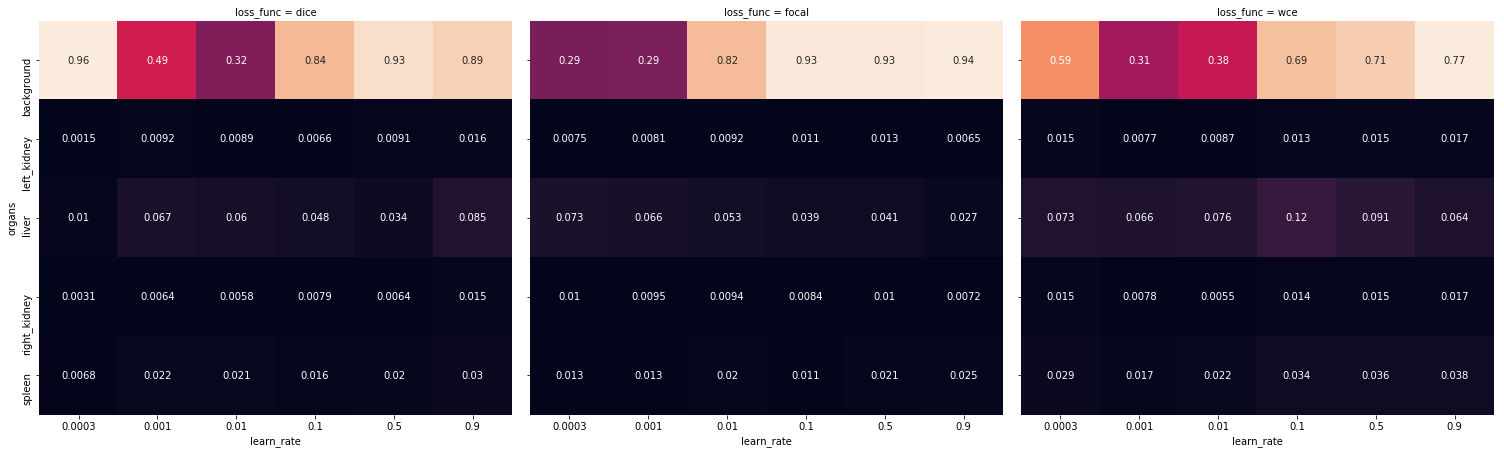

Dataset type valid_set


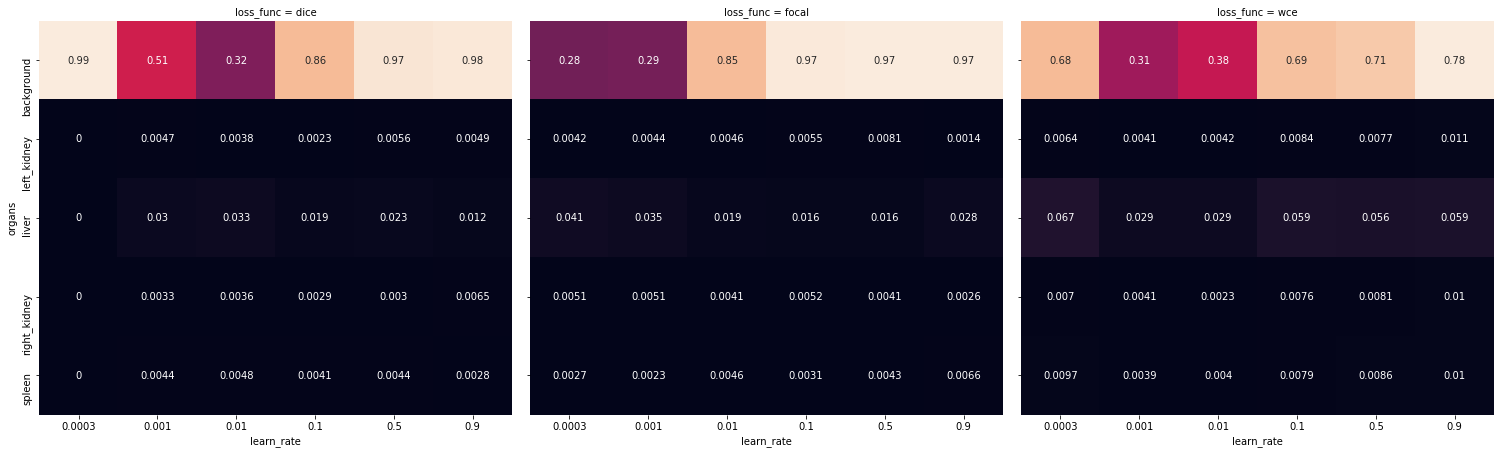

In [23]:
# Generate a set of sample data

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)
    
filt_grid=[3,7]

for dataset_type,dataset_df in agg_df_melt_max_f1.items():

    
    #print('Batch size:',vals)
    print('Dataset type',dataset_type)
    trl_df=dataset_df
    with sns.plotting_context(font_scale=20):
        fg = sns.FacetGrid(trl_df, col='loss_func',height=7)
        fg.map_dataframe(draw_heatmap, 'learn_rate', 'organs', 'dice_score',
                         cbar=False, square = True,annot=True,)
        # get figure background color
        facecolor=plt.gcf().get_facecolor()
        for ax in fg.axes.flat:
            # set aspect of all axis
            ax.set_aspect('equal','box')
            # set background color of axis instance
            #ax.set_axis_bgcolor(facecolor)
        dst_dir_hmap='/home/ec2-user/SageMaker/segcaps_output_images/segcaps_grd_srch_plt/heatmaps'
        fig_nm='dataset_type_'+dataset_type+'segcaps_grid_srch_heatmap.jpeg'
        plt.savefig(os.path.join(dst_dir_hmap,fig_nm),dpi=600)
        plt.show()

In [75]:
cd /home/ec2-user/SageMaker/u_net_grd_srch_results_graphs/per_class_per_epoch_grid_srch_heatmap

/home/ec2-user/SageMaker/u_net_grd_srch_results_graphs/per_class_per_epoch_grid_srch_heatmap


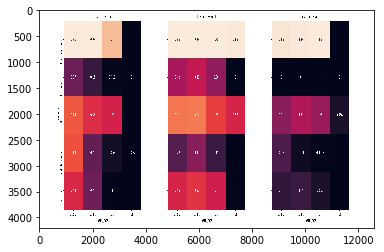

In [78]:
import imageio
trl_img=imageio.imread('btch_sz_3_dataset_type_test_setunet_grid_srch_heatmap.jpeg')
plt.imshow(trl_img,aspect='auto')

In [111]:
agg_df_melt_max_epoch['train_set'][(agg_df_melt_max_epoch['train_set']['loss_func']=='focal')&(agg_df_melt_max_epoch['train_set']['btch_sz']==7)]

loss_func  learn_rate  epoch_no  btch_sz        organs  dice_score
9      focal      0.0003      99.0      7.0    background    0.996363
11     focal      0.0010      99.0      7.0    background    0.993329
13     focal      0.0100      99.0      7.0    background    0.995136
15     focal      0.1000      99.0      7.0    background    0.990336
25     focal      0.0003      99.0      7.0   left_kidney    0.468933
27     focal      0.0010      99.0      7.0   left_kidney    0.000000
29     focal      0.0100      99.0      7.0   left_kidney    0.382689
31     focal      0.1000      99.0      7.0   left_kidney    0.000000
41     focal      0.0003      99.0      7.0         liver    0.845860
43     focal      0.0010      99.0      7.0         liver    0.806378
45     focal      0.0100      99.0      7.0         liver    0.775382
47     focal      0.1000      99.0      7.0         liver    0.635568
57     focal      0.0003      99.0      7.0  right_kidney    0.312685
59     focal      0.0010      99.0      7.0  right_kidney    0.000000
61     focal      0.0100      99.0      7.0  right_kidney    0.204317
63     focal      0.1000      99.0      7.0  right_kidney    0.000000
73     focal      0.0003      99.0      7.0        spleen    0.610222
75     focal      0.0010      99.0      7.0        spleen    0.530506
77     focal      0.0100      99.0      7.0        spleen    0.440828
79     focal      0.1000      99.0      7.0        spleen    0.000000

In [122]:
agg_df_melt_per_epoch['train_set'][(agg_df_melt_per_epoch['train_set']['loss_func']=='focal')&(agg_df_melt_per_epoch['train_set']['btch_sz']==7)&(agg_df_melt_per_epoch['train_set']['organs']=='left_kidney')&(agg_df_melt_per_epoch['train_set']['learn_rate']==0.001)]

loss_func  learn_rate  epoch_no  btch_sz       organs  dice_score
699     focal       0.001       3.0      7.0  left_kidney    0.000000
701     focal       0.001       6.0      7.0  left_kidney    0.055809
703     focal       0.001       9.0      7.0  left_kidney    0.078320
705     focal       0.001      12.0      7.0  left_kidney    0.185554
707     focal       0.001      15.0      7.0  left_kidney    0.355433
709     focal       0.001      18.0      7.0  left_kidney    0.357235
711     focal       0.001      21.0      7.0  left_kidney    0.386322
713     focal       0.001      24.0      7.0  left_kidney    0.403940
715     focal       0.001      27.0      7.0  left_kidney    0.384293
717     focal       0.001      30.0      7.0  left_kidney    0.391157
719     focal       0.001      33.0      7.0  left_kidney    0.365770
721     focal       0.001      36.0      7.0  left_kidney    0.433517
723     focal       0.001      39.0      7.0  left_kidney    0.445570
725     focal       0.001      42.0      7.0  left_kidney    0.446971
727     focal       0.001      45.0      7.0  left_kidney    0.418144
729     focal       0.001      48.0      7.0  left_kidney    0.468999
731     focal       0.001      51.0      7.0  left_kidney    0.455744
733     focal       0.001      54.0      7.0  left_kidney    0.458159
735     focal       0.001      57.0      7.0  left_kidney    0.473130
737     focal       0.001      60.0      7.0  left_kidney    0.000000
739     focal       0.001      63.0      7.0  left_kidney    0.000000
741     focal       0.001      66.0      7.0  left_kidney    0.000000
743     focal       0.001      69.0      7.0  left_kidney    0.000000
745     focal       0.001      72.0      7.0  left_kidney    0.000000
747     focal       0.001      75.0      7.0  left_kidney    0.000000
749     focal       0.001      78.0      7.0  left_kidney    0.000000
751     focal       0.001      81.0      7.0  left_kidney    0.000000
753     focal       0.001      84.0      7.0  left_kidney    0.000000
755     focal       0.001      87.0      7.0  left_kidney    0.000000
757     focal       0.001      90.0      7.0  left_kidney    0.000000
759     focal       0.001      93.0      7.0  left_kidney    0.000000
761     focal       0.001      96.0      7.0  left_kidney    0.000000
763     focal       0.001      99.0      7.0  left_kidney    0.000000

In [ ]:
# Generate a set of sample data
np.random.seed(0)
indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
 names=('label0', 'label1', 'label2'))
data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
 index=indices, columns=('value',)).reset_index()

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(data, col='label0')
fg.map_dataframe(draw_heatmap, 'label1', 'label2', 'value', cbar=False, square = True)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal','box-forced')
    # set background color of axis instance
    ax.set_axis_bgcolor(facecolor)
plt.show()


## Plotting per class performance across different methods and epochs

In [33]:
def gen_uniq_combos(df,filt_df_cols=['loss_function','learning_rate'])->list:
    final_list=[]
    for vals in filt_df_cols:
        tmp_lst=df[vals].unique().tolist()
        final_list.append(tmp_lst)
        
    return list(product(*final_list))


In [34]:
def filt_eq(thresh_sp,*x):
    #Confirms if all element within character else do not return
    tmp_lst=[param for param in x if param in thresh_sp]
    
    if len(tmp_lst)==len(thresh_sp):
        return True
    else:
        return False
    
def gen_multi_factor_plot_sns(df_val,dst_dir,x_axis="epoch_no",y_axis="dice_score",hue_cat='organs',
                              filt_cols=['loss_function','learning_rate'],dataset_type=None,filt_func=filt_eq,
                             fig_dim=(15,15),dpi=600):

    assert dataset_type in ['valid_set','train_set','test_set'],'No dataset type selected'
    
    graph_filters=gen_uniq_combos(df_val,filt_cols)
    
    for vals in graph_filters:
        #Defining file name for analysis 
        name=dataset_type+'_'+hue_cat+'_'+y_axis+'_wrt_'+x_axis+'_'
        lr_loss_str='_'.join(['_'.join([str(a),str(b)]) for a,b in zip(filt_cols,vals)])
        print('LOSS FUNCTION RUN',name+lr_loss_str)
        f_name=os.path.join(dst_dir,name+lr_loss_str+'.jpeg')
        #Filtering based on filter function in arguments above. 
        #ipdb.set_trace()
        df_filt=df_val[df_val[filt_cols].apply(lambda x: filt_func(vals,*x), axis=1)]
        fig,ax=plt.subplots(figsize=fig_dim)
        g = sns.lineplot(ax=ax,x=x_axis, y=y_axis, hue=hue_cat,
                        data=df_filt,legend='full')
        
        g.set_xlabel(x_axis,fontsize=20)
        g.set_ylabel(y_axis,fontsize=20)
        g.tick_params(labelsize=16)
        g.legend(prop={'size': 16})
        fig = g.get_figure()
        fig.savefig(f_name)

    

In [3]:
dst_dir_sample='/home/ec2-user/SageMaker/segcaps_output_images/segcaps_grd_srch_plt/dice_per_cls_per_epoch'


LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.0003
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.001
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.01
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.1
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.5
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.9
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.0003
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.001
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.01
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.1
LOSS FUNCTION RUN train_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.5
LOSS

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.1
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.5
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.9
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.0003
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.001
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.01
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.1
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.5
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.9
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_wce_learn_rate_0.0003
LOSS FUNCTION RUN test_set_organs_dice_score_wrt_epoch_no_loss_func_wce_learn_rate_0.001
LOSS FUNCTION RUN

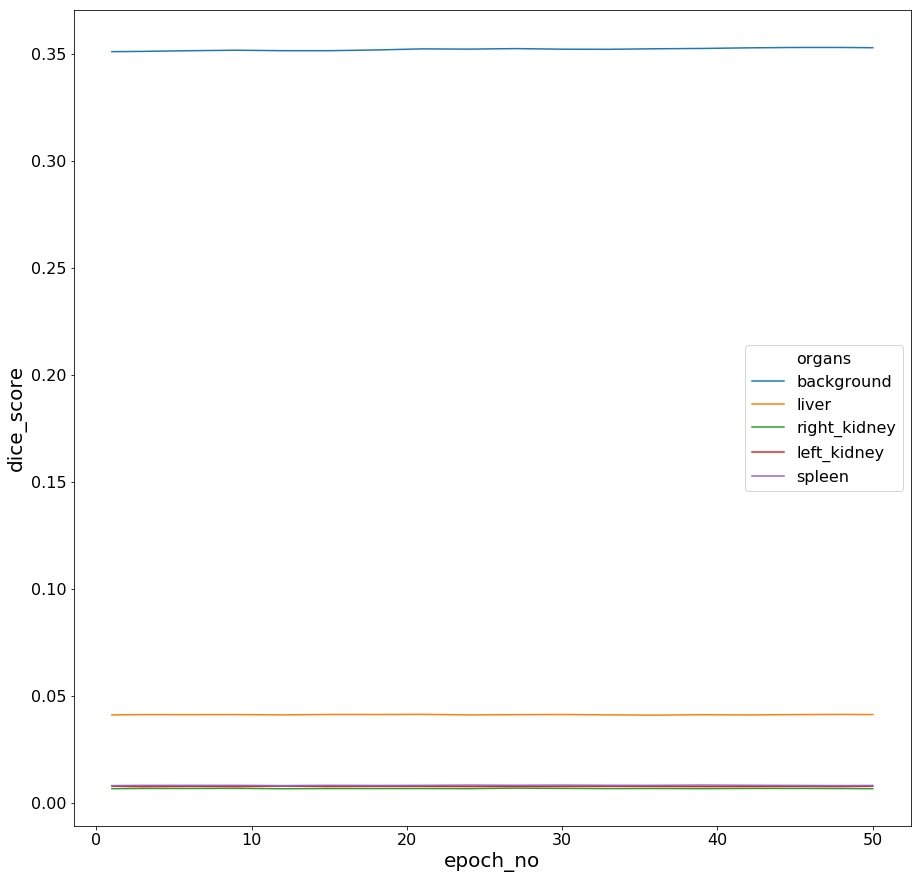

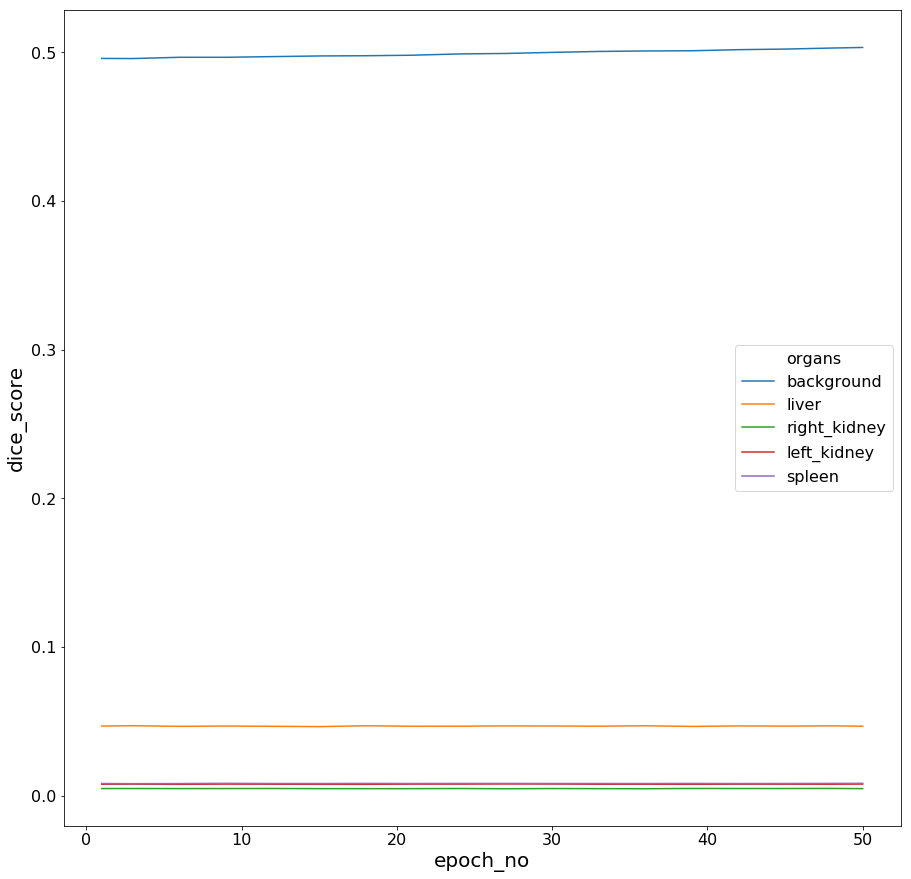

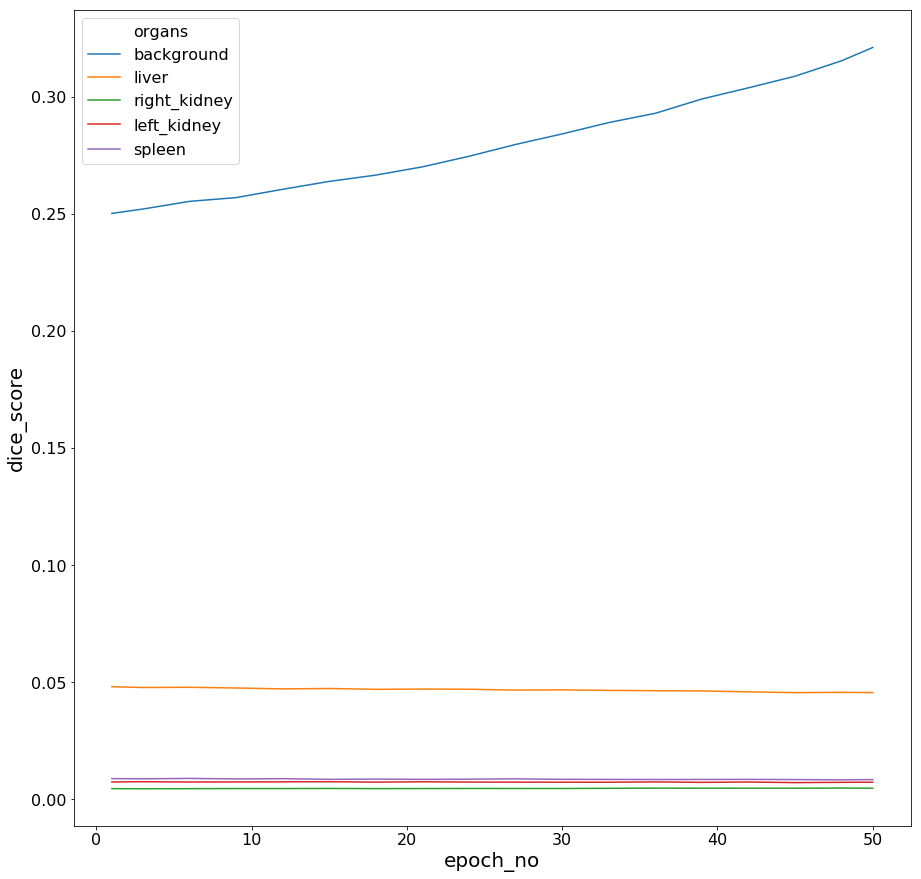

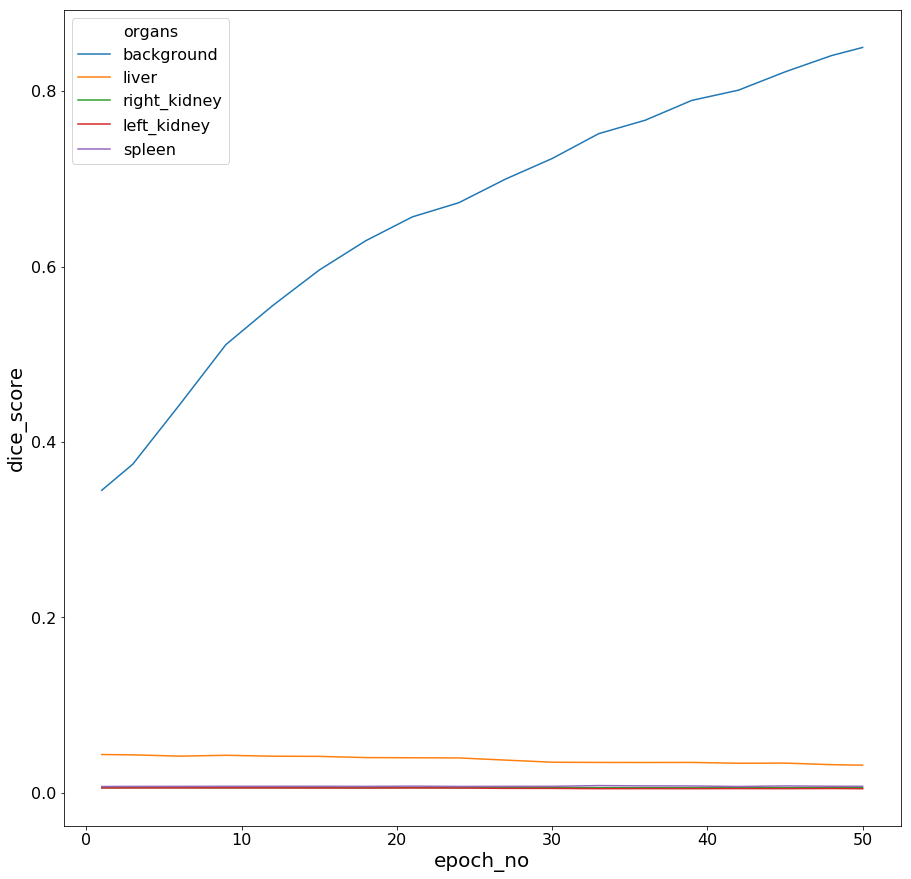

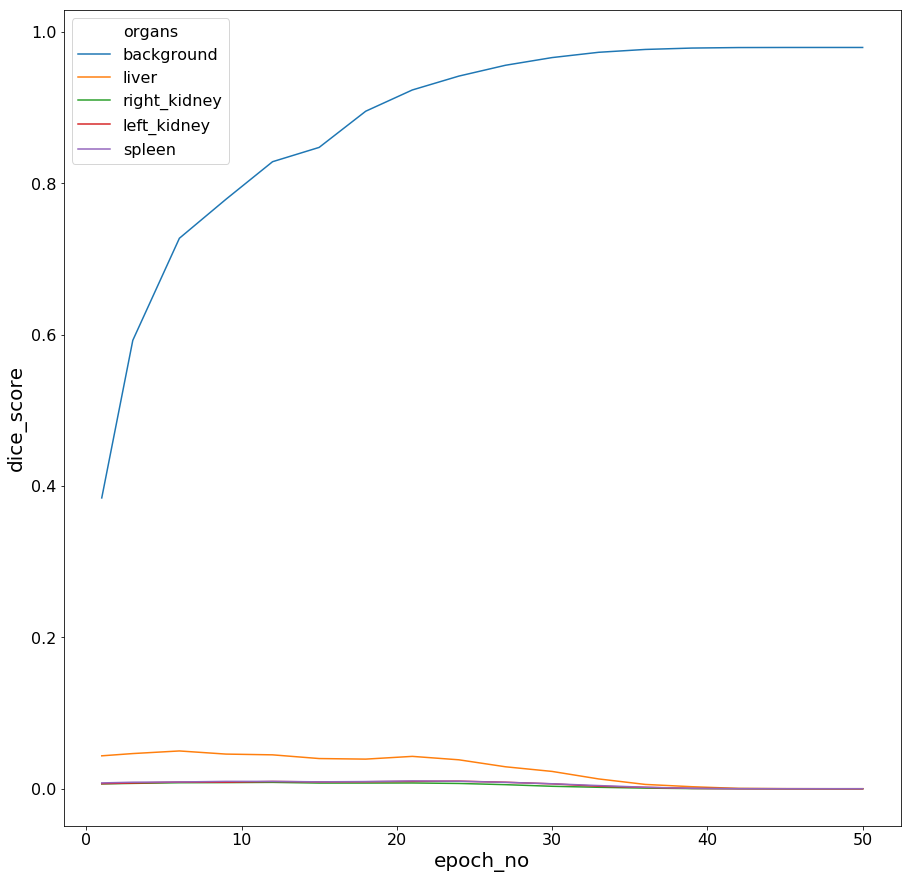

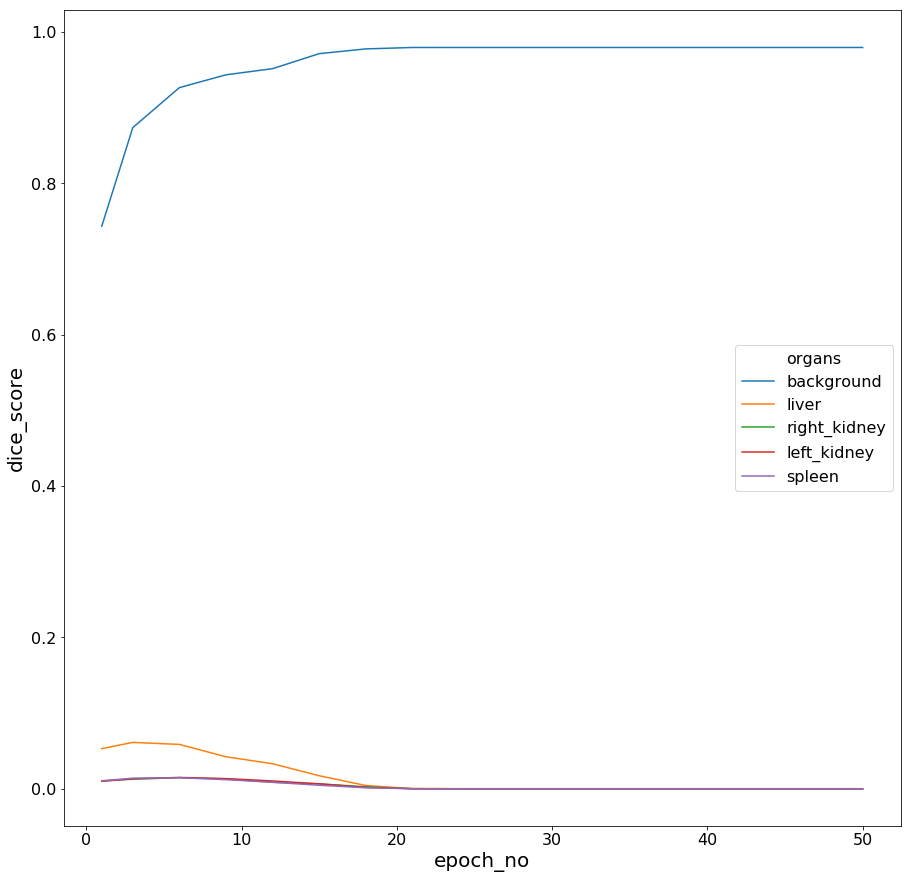

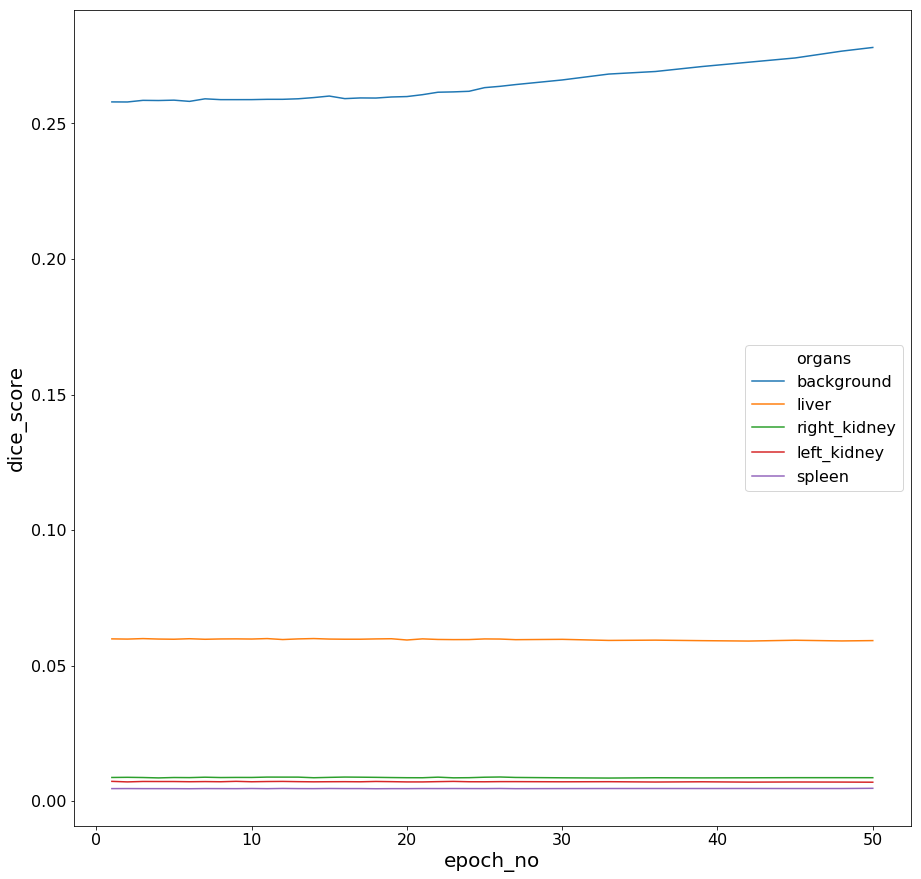

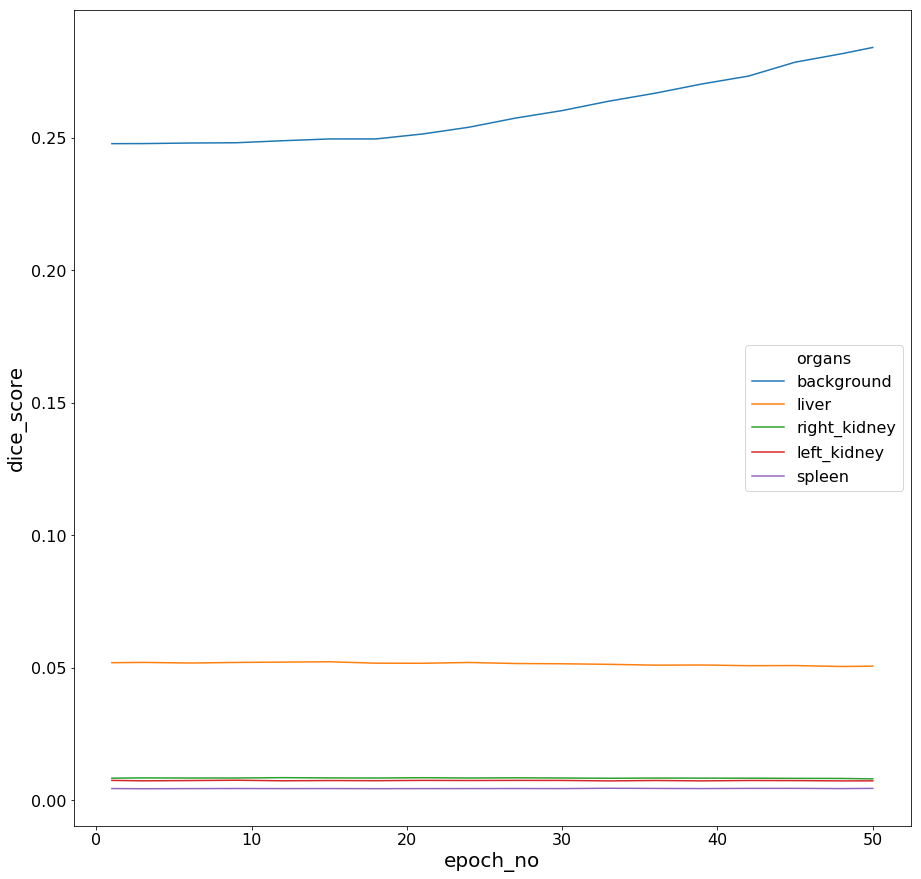

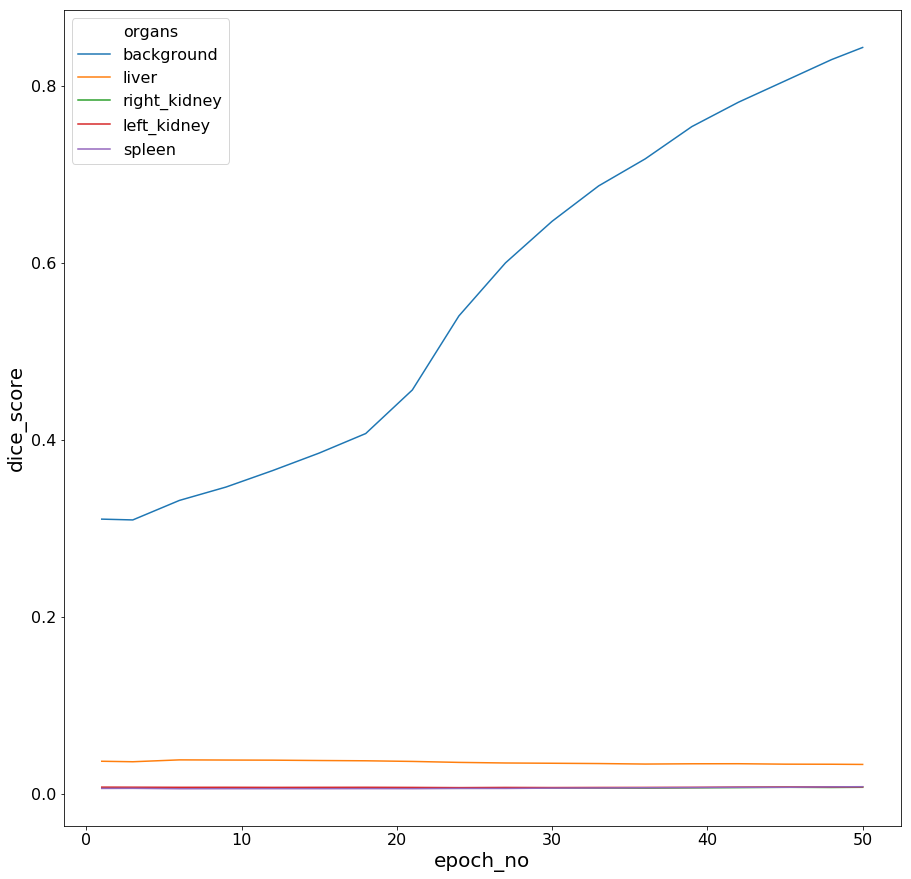

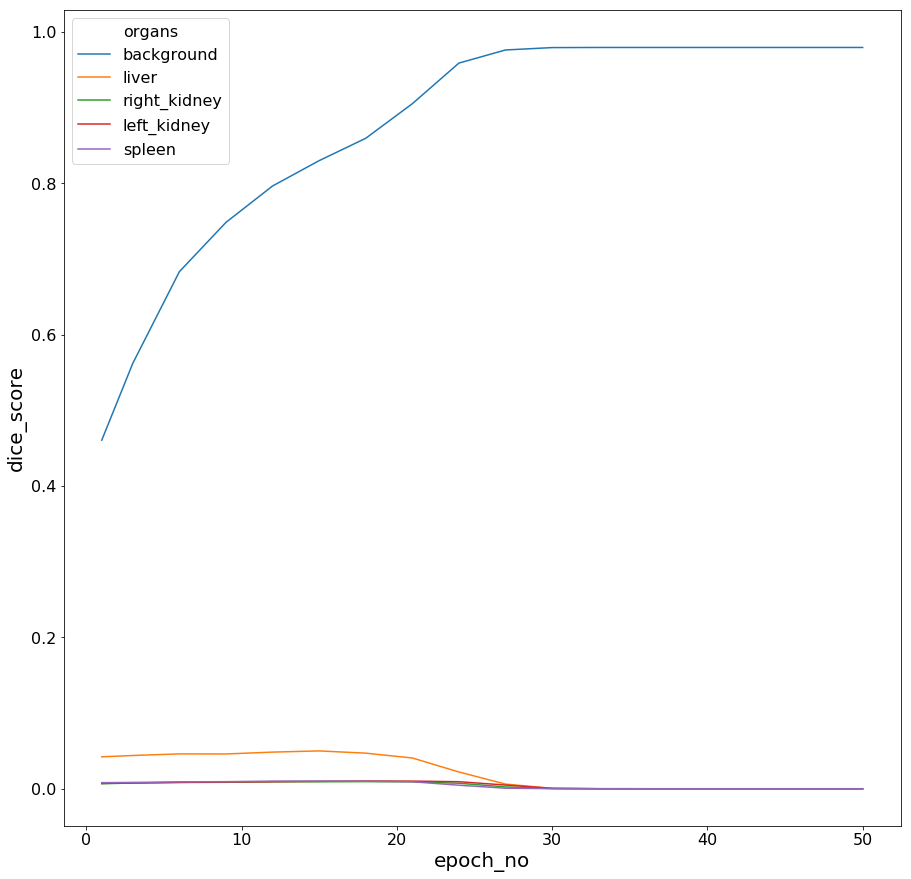

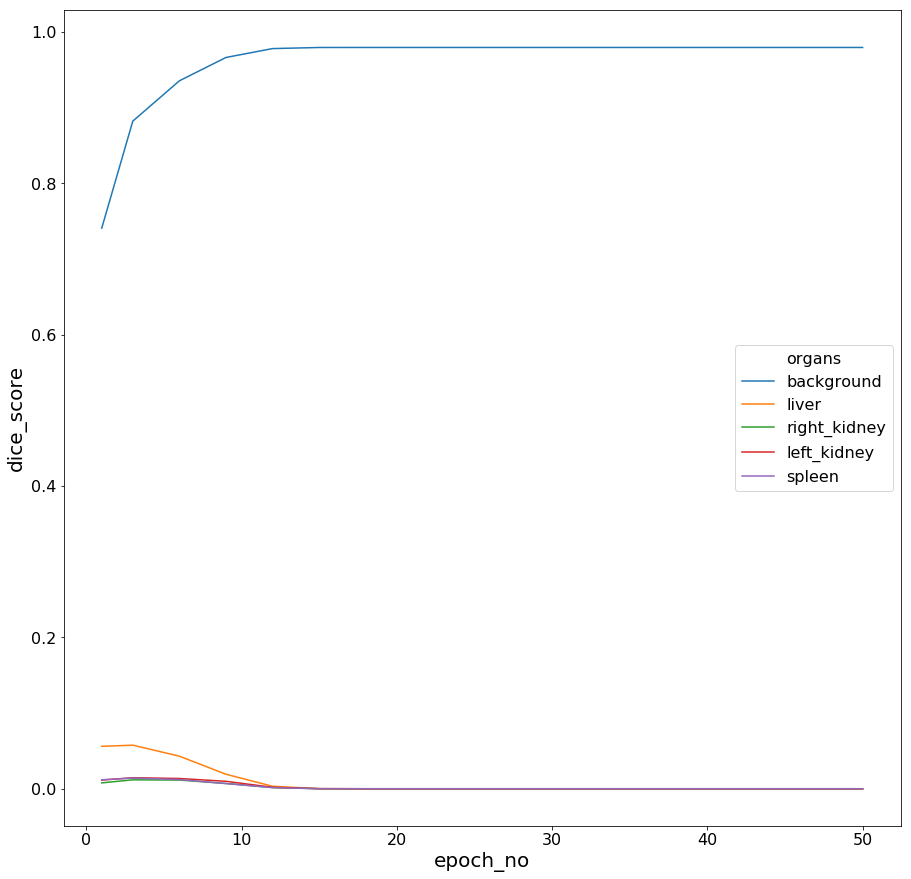

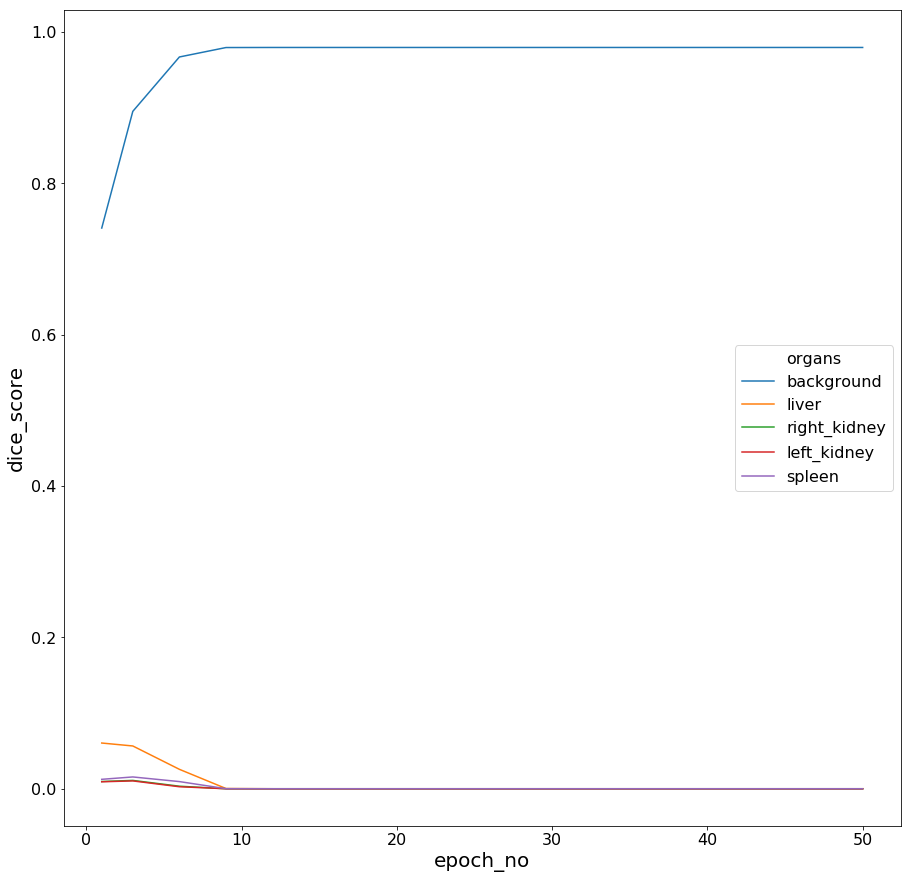

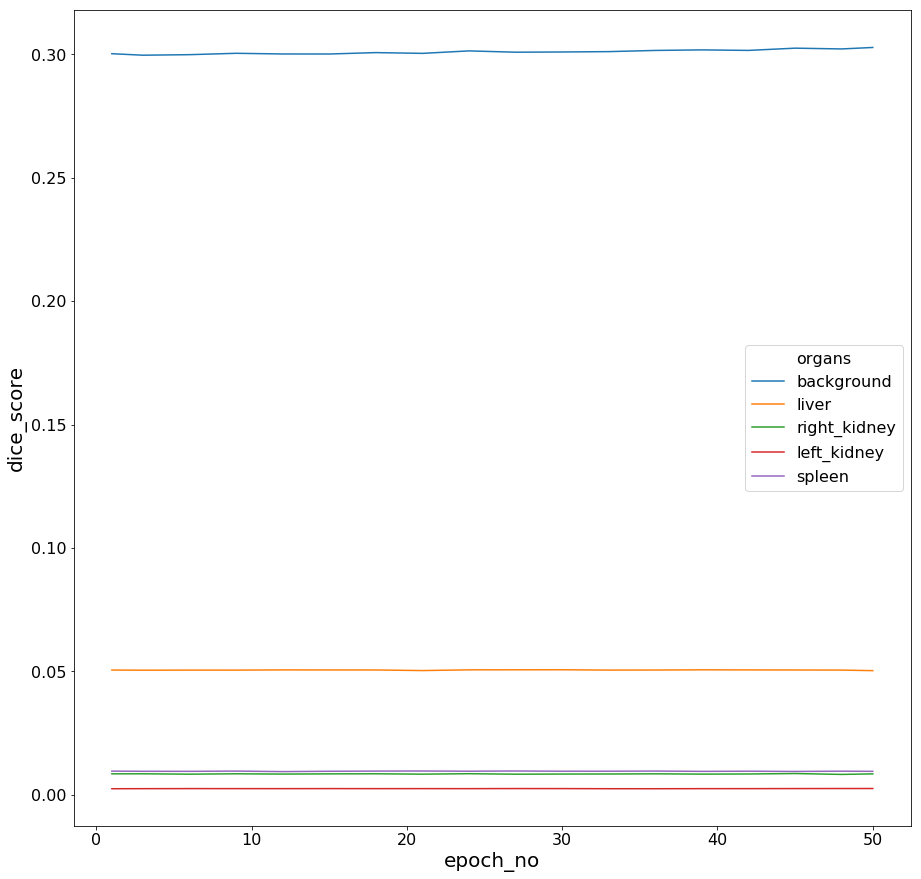

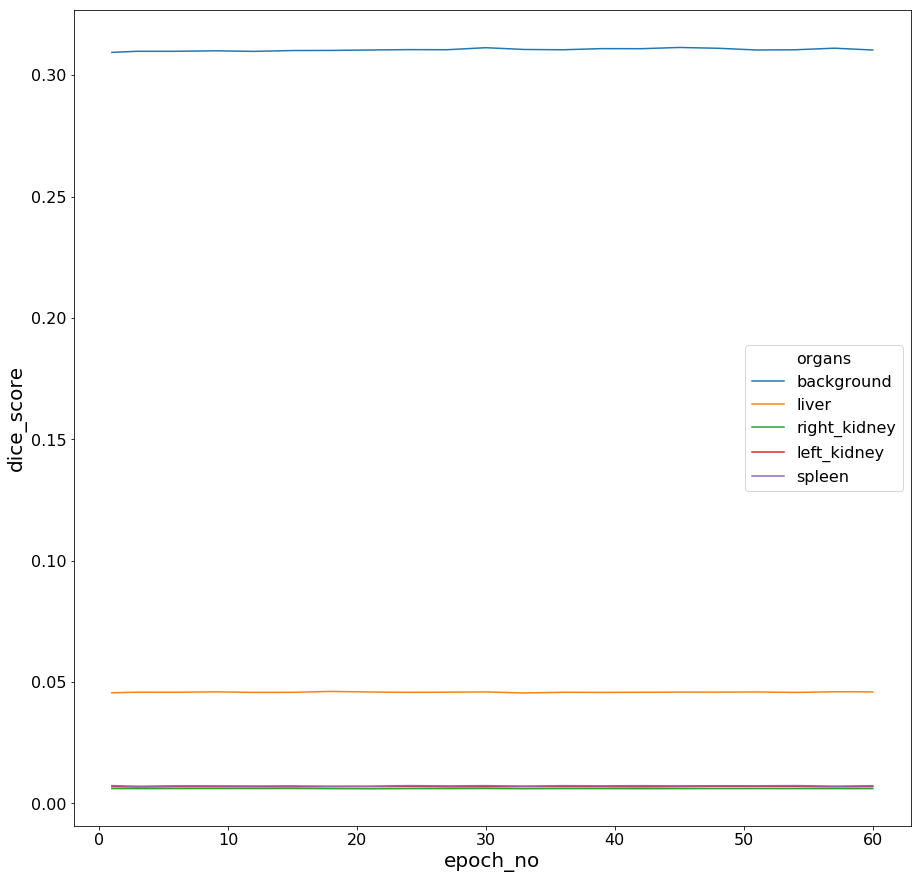

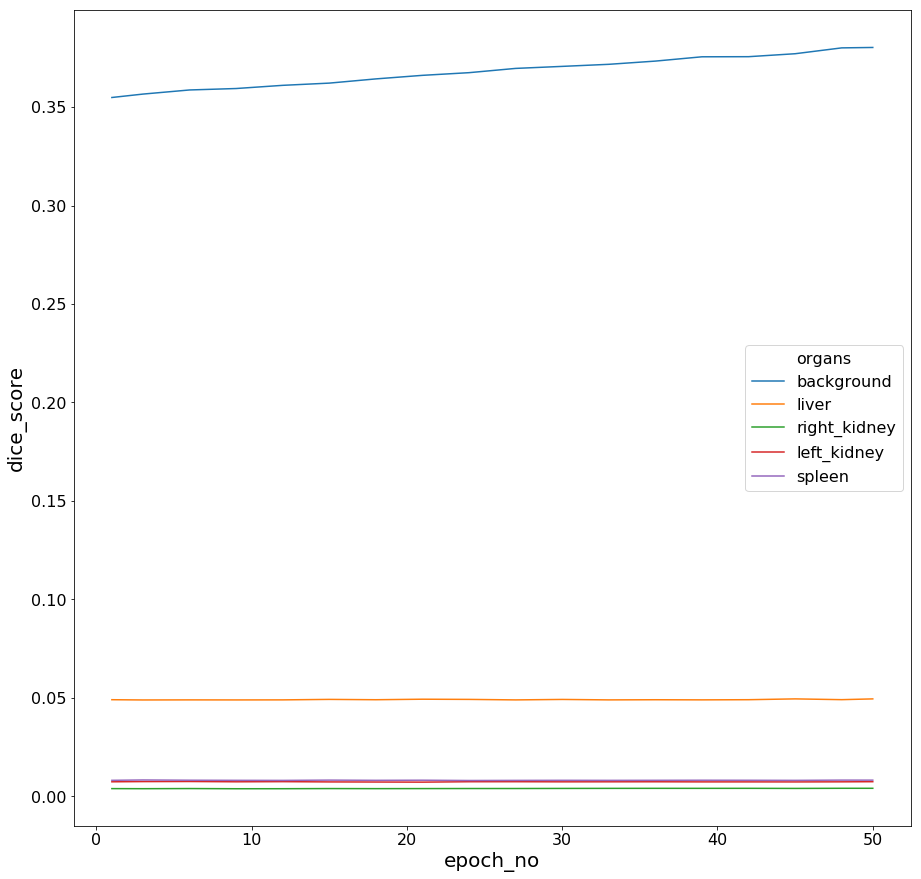

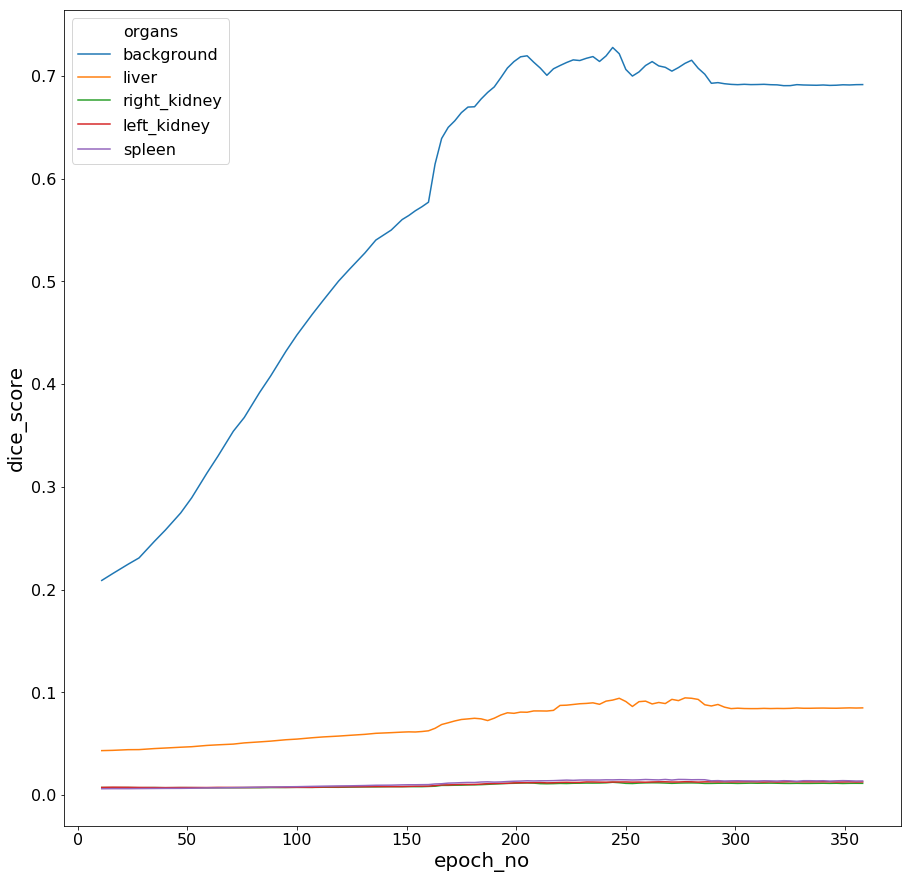

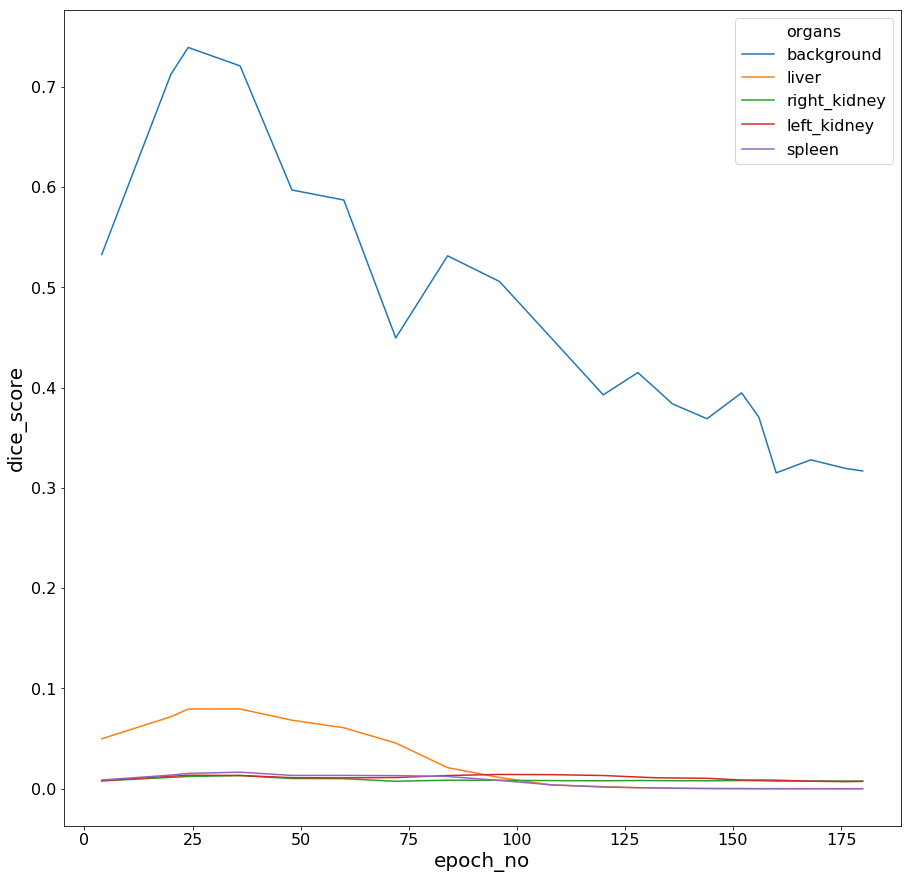

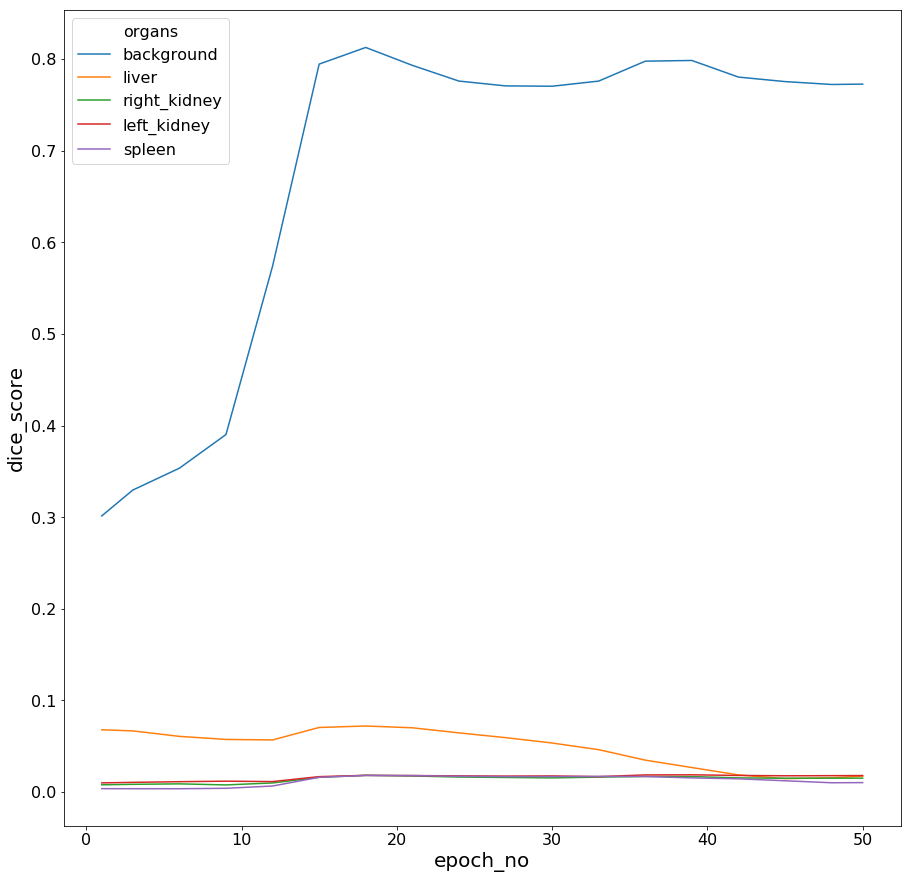

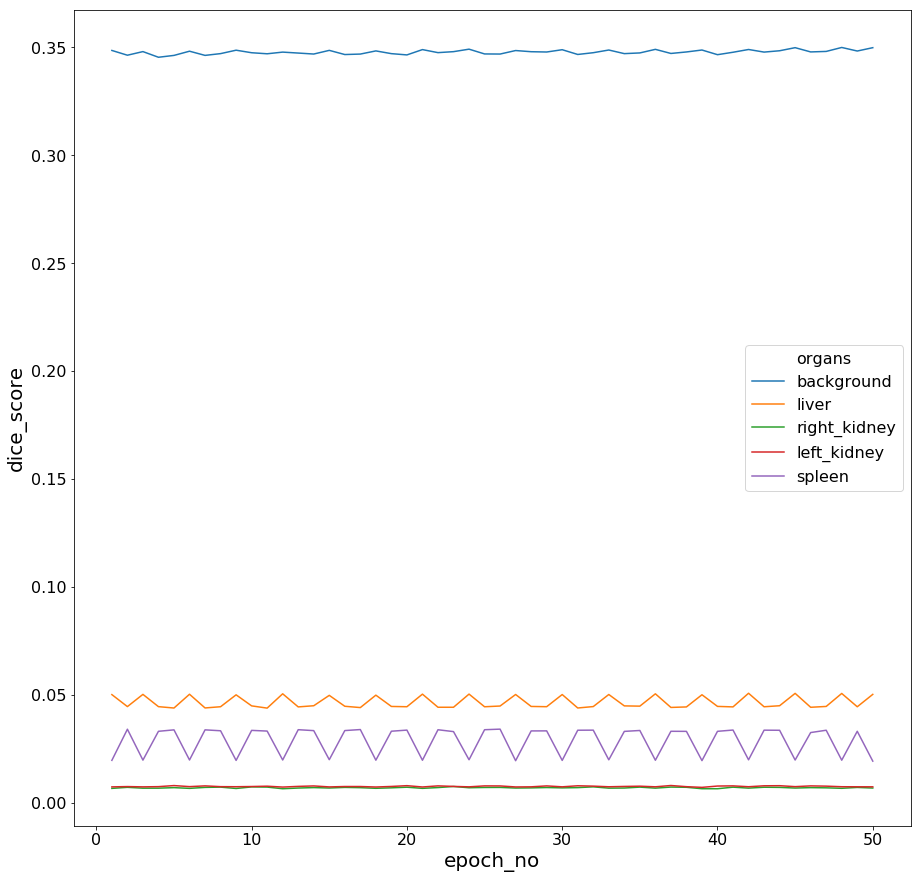

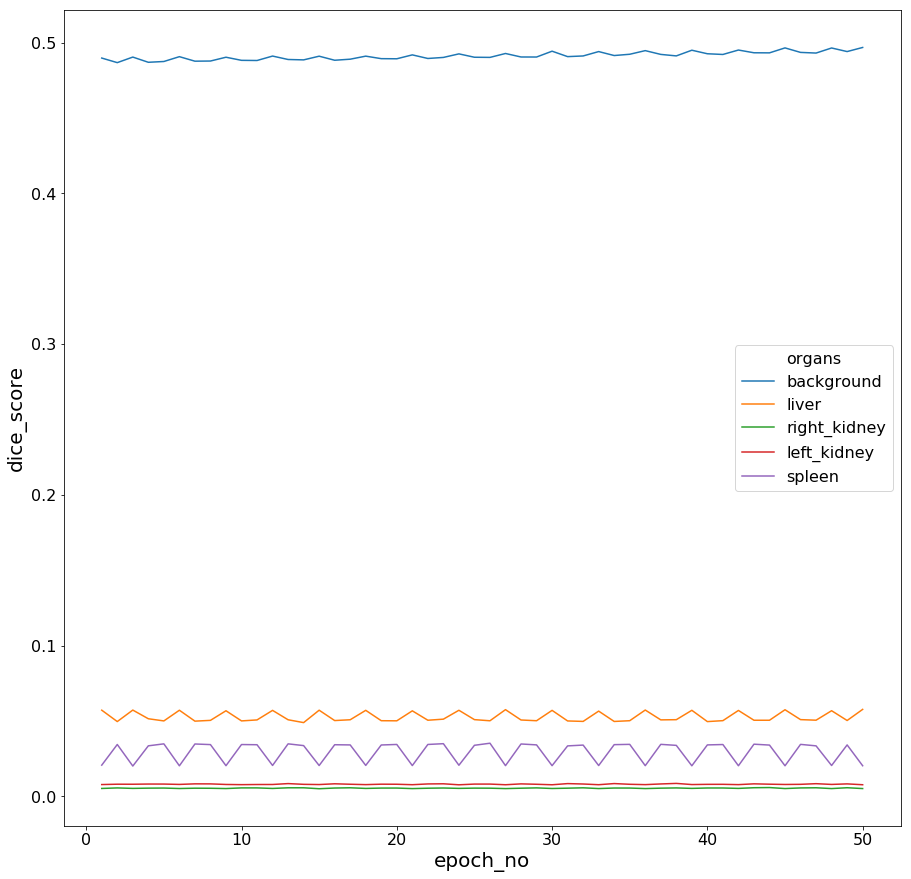

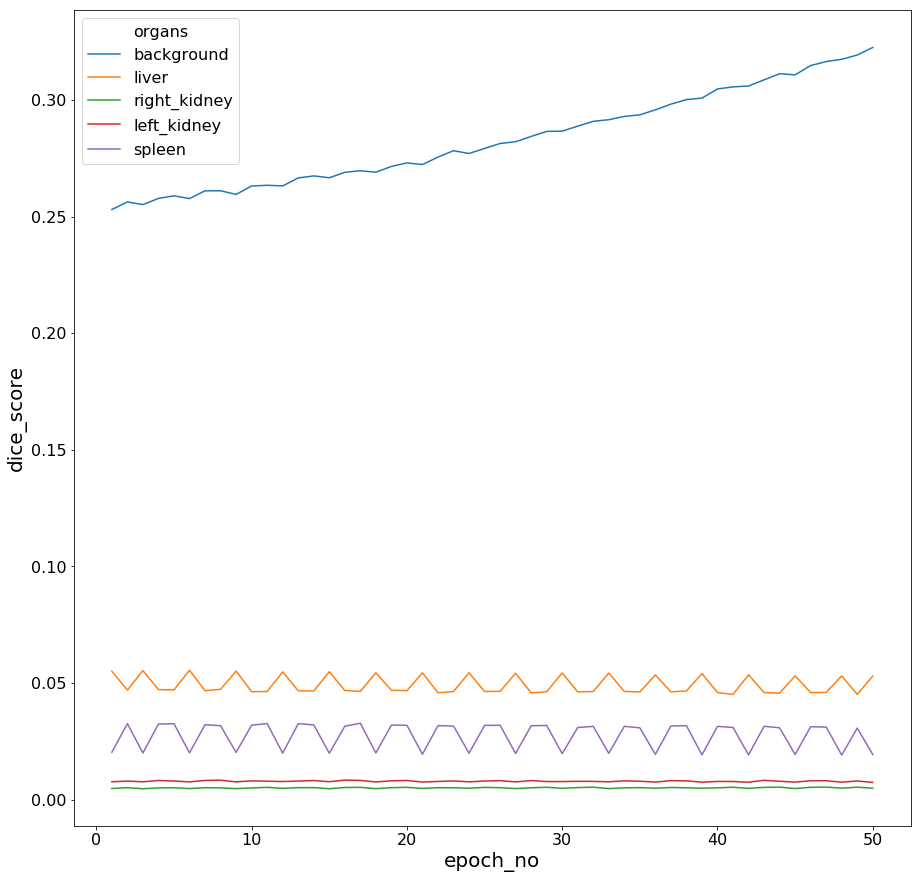

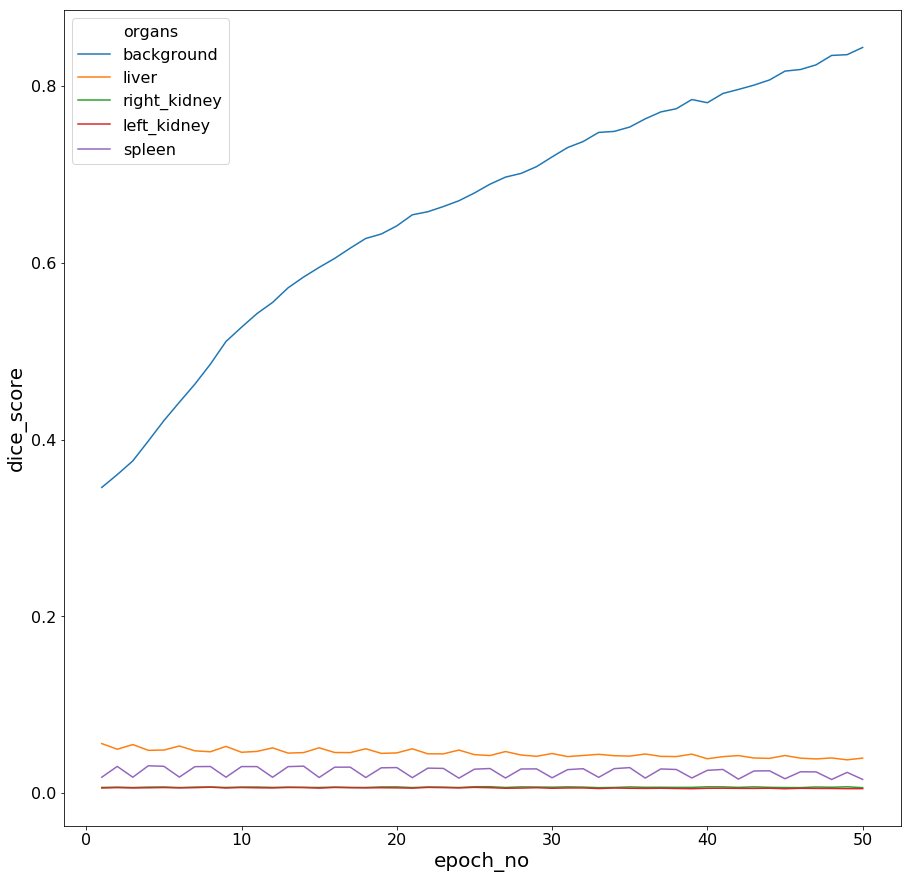

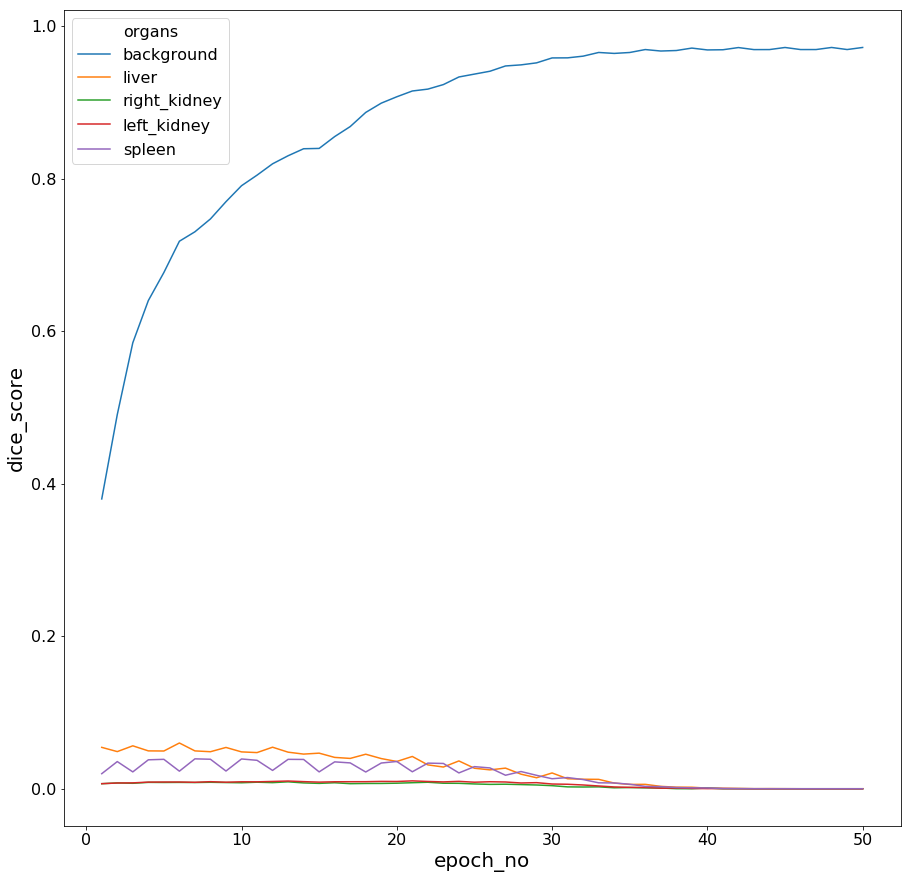

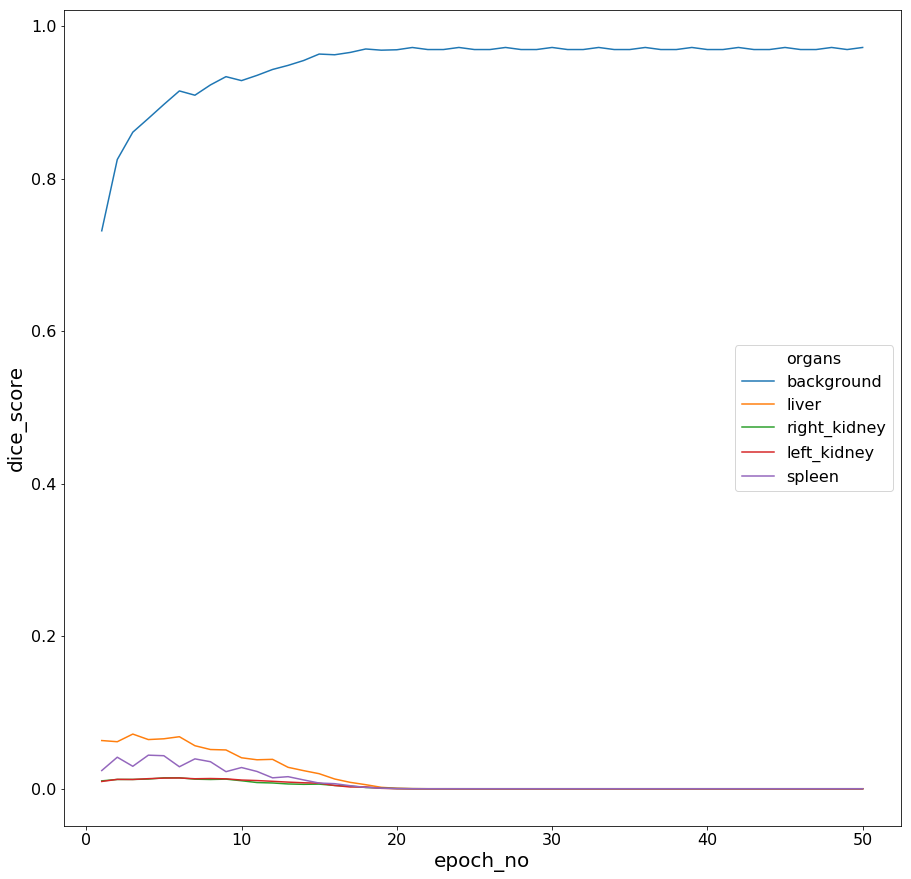

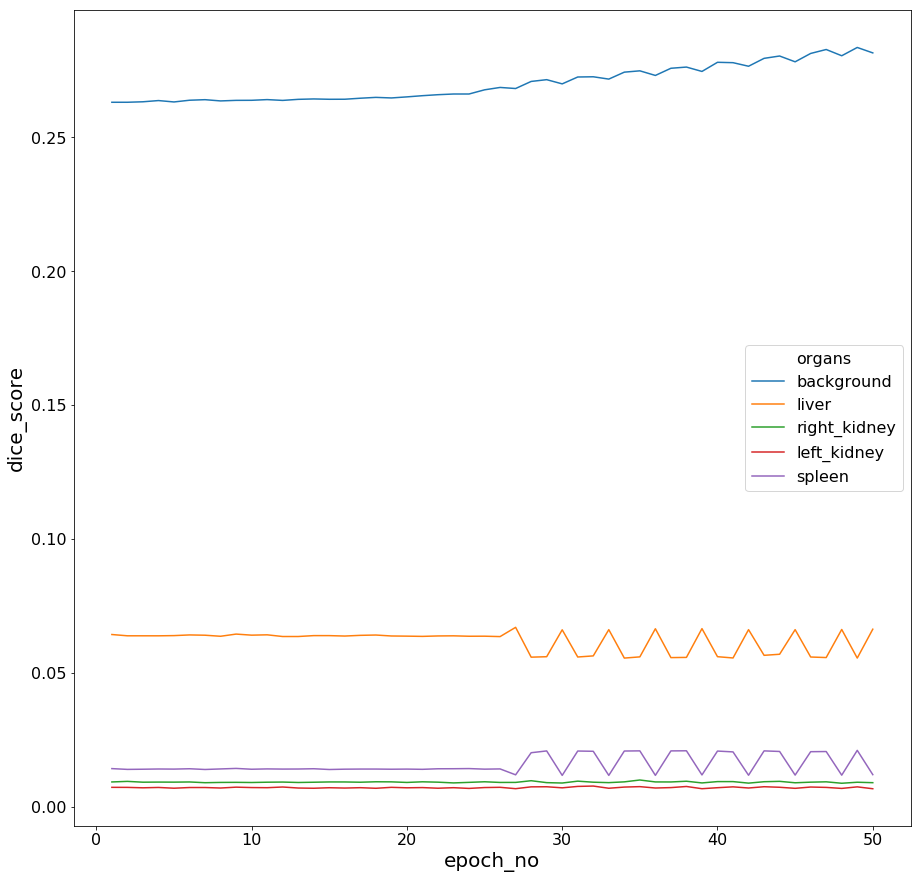

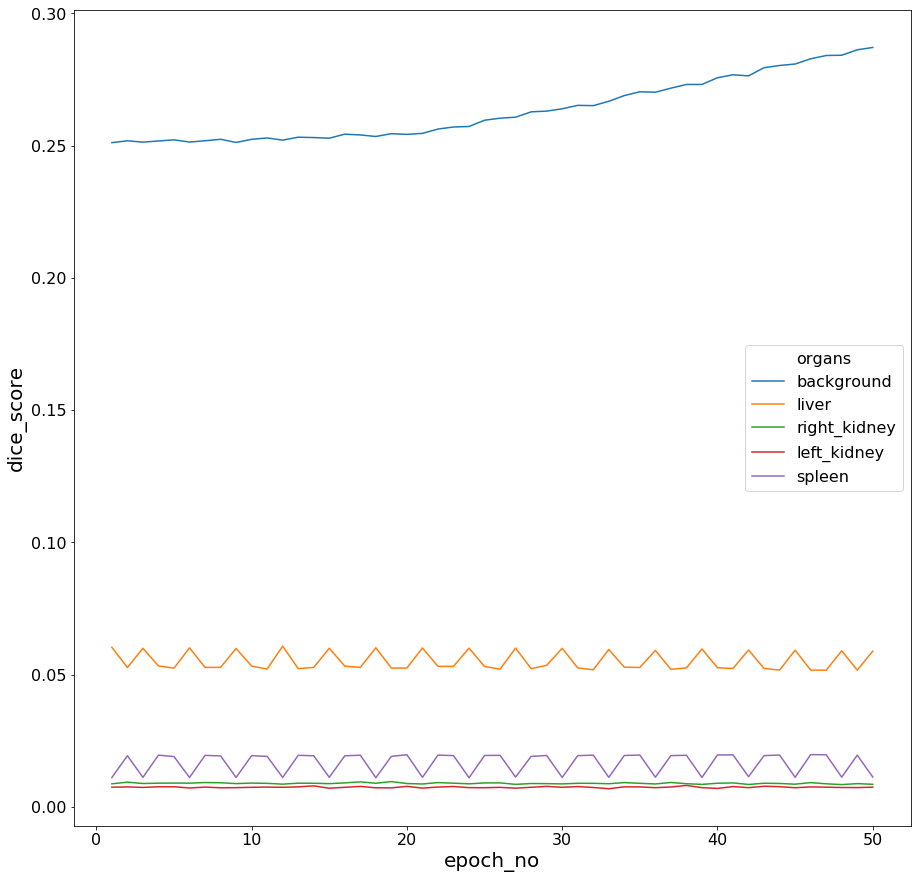

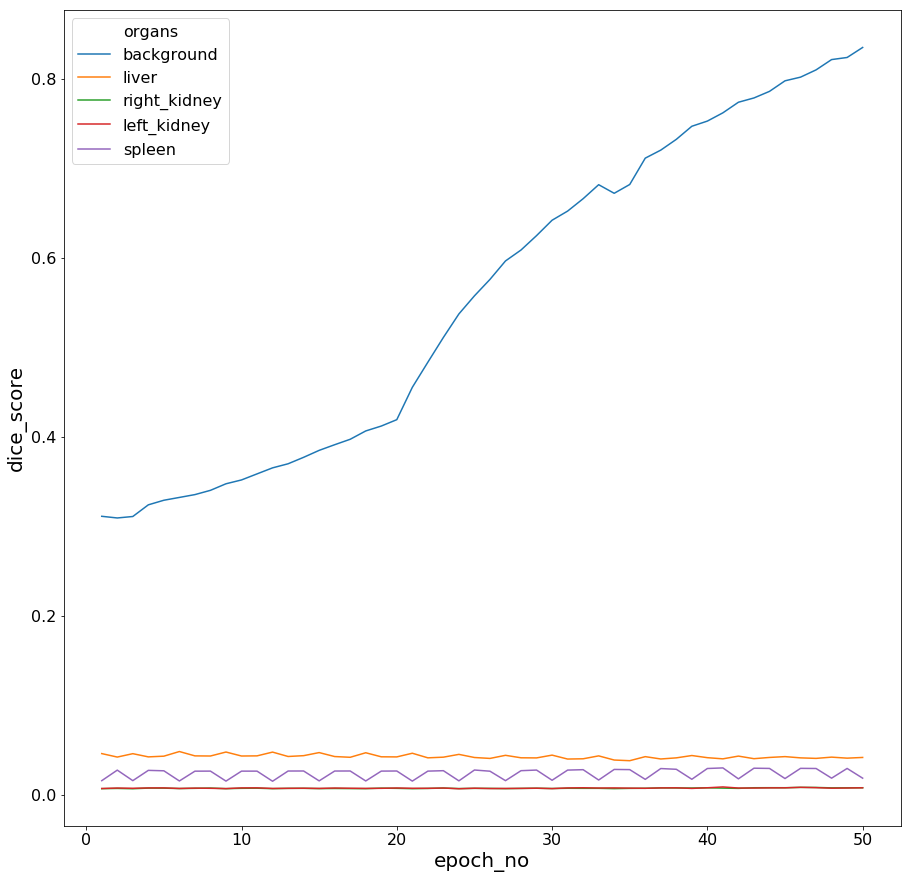

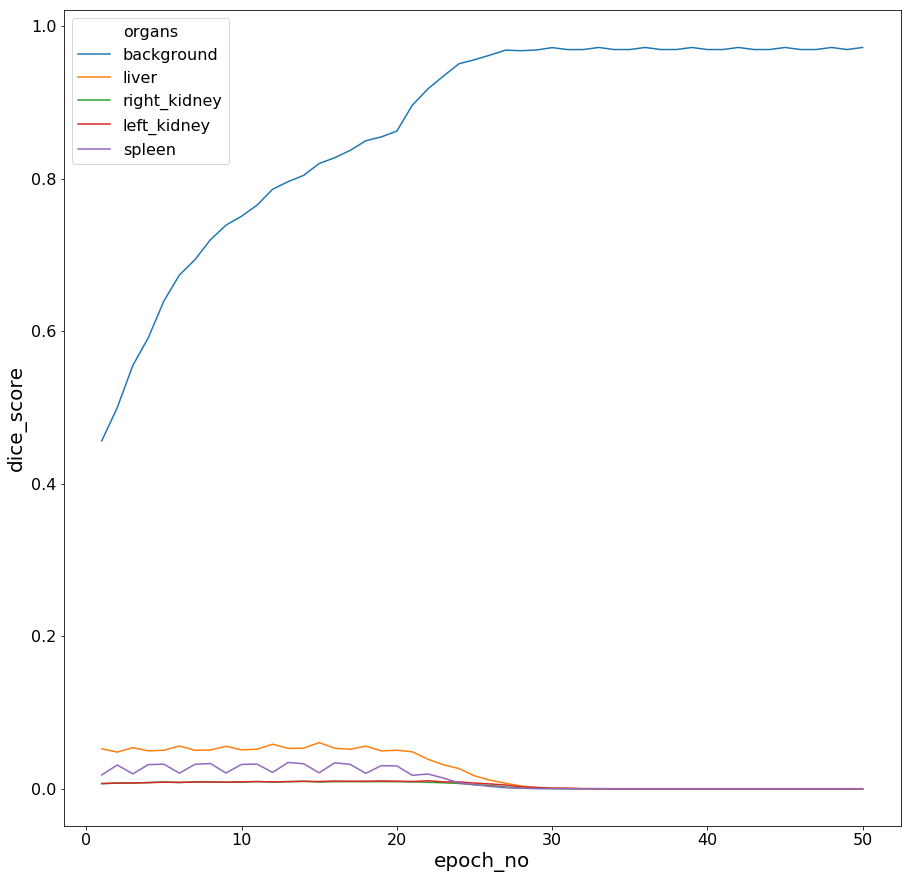

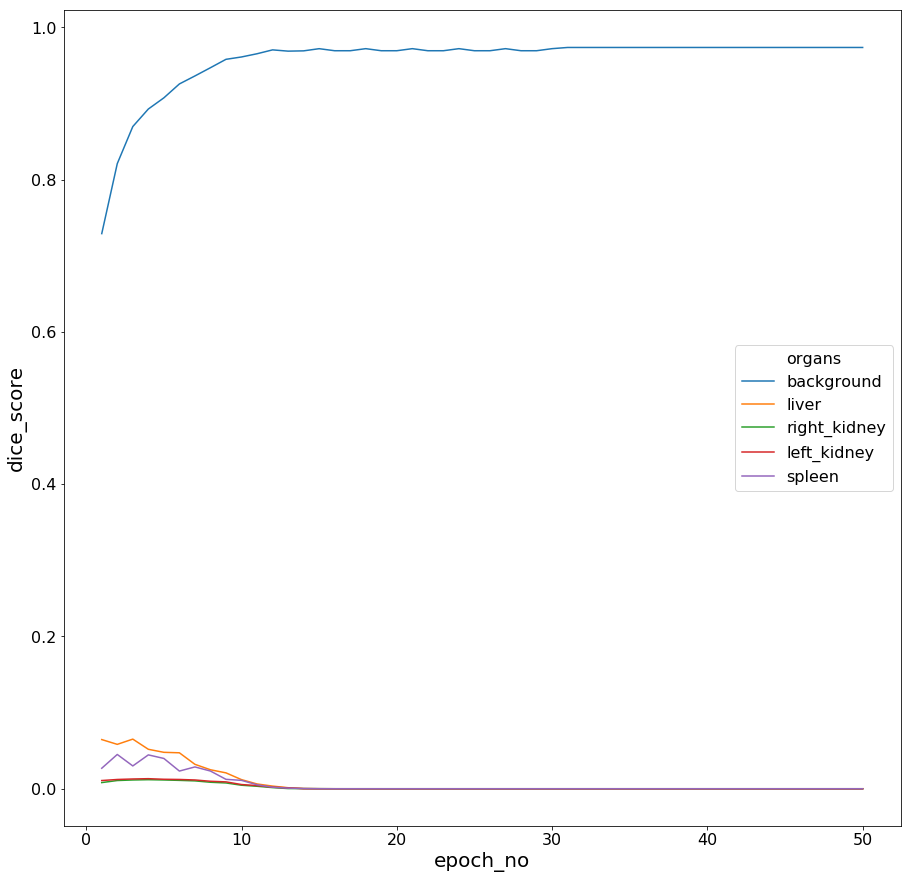

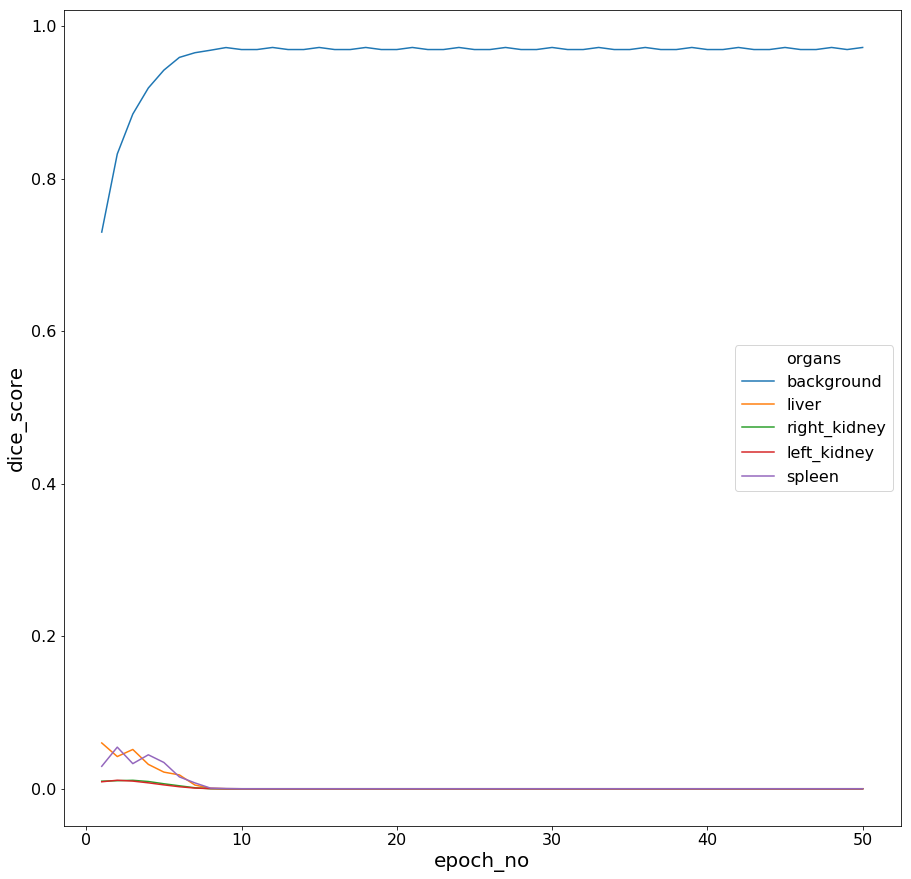

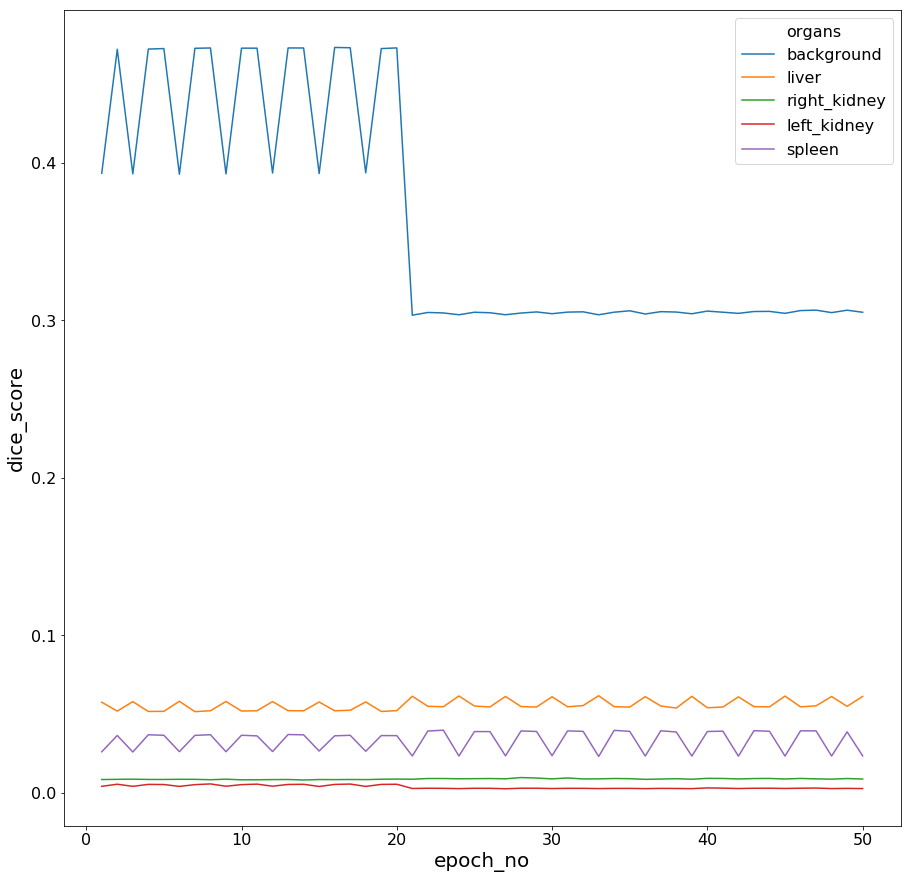

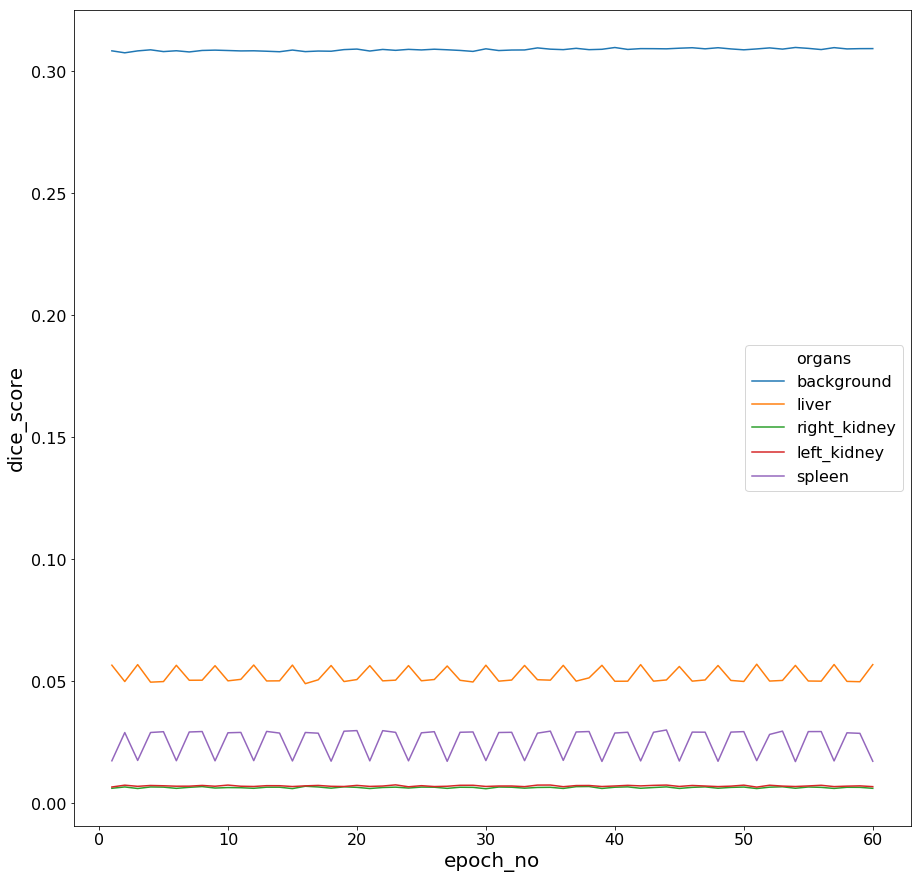

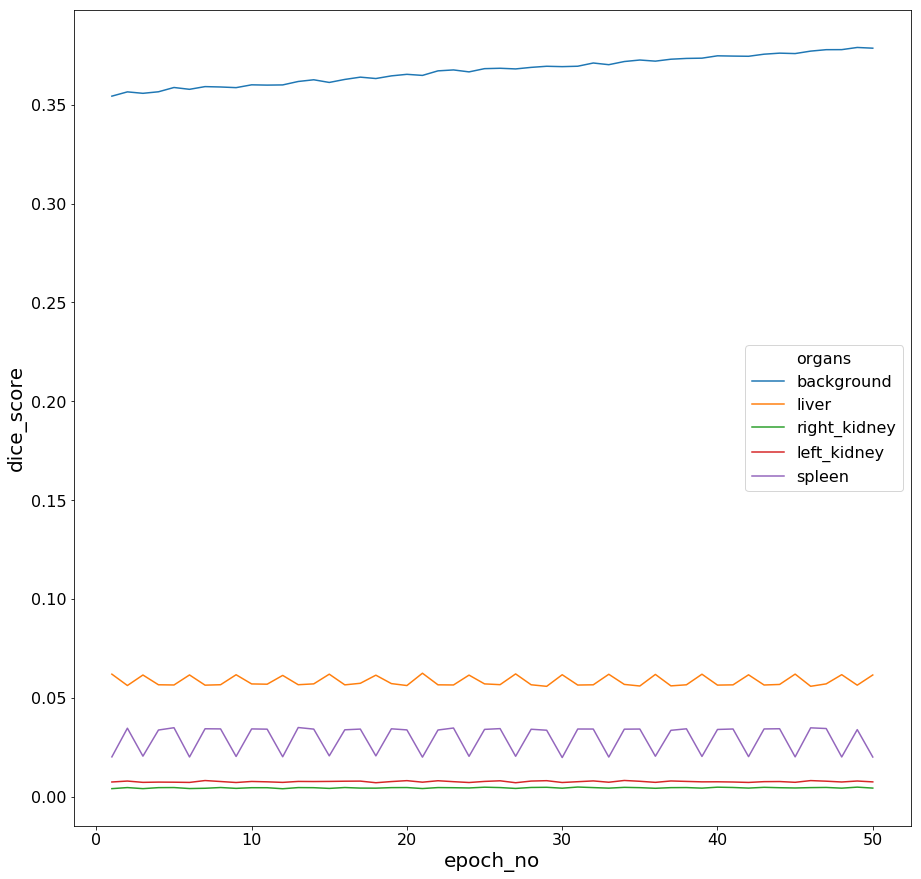

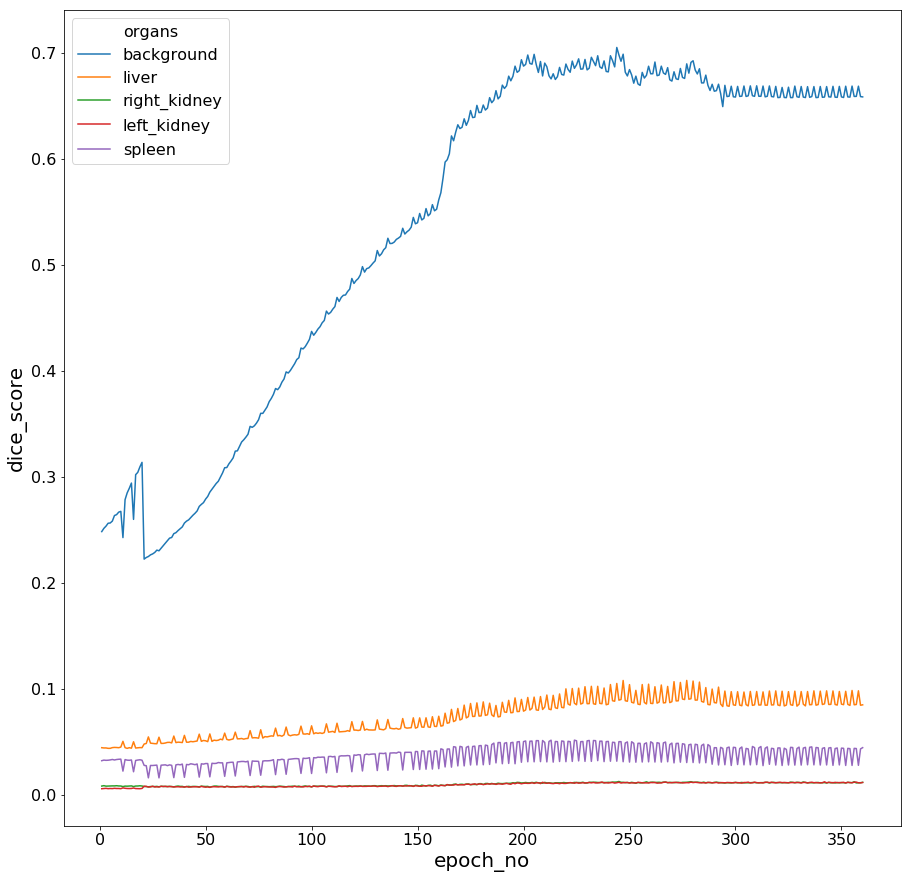

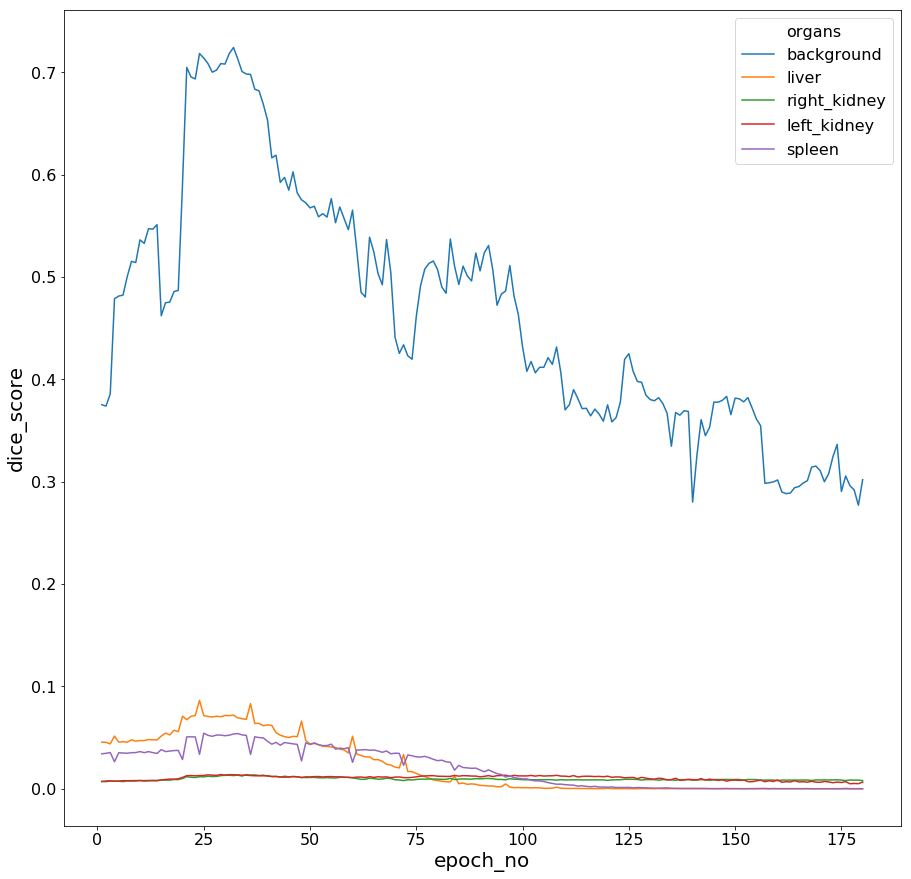

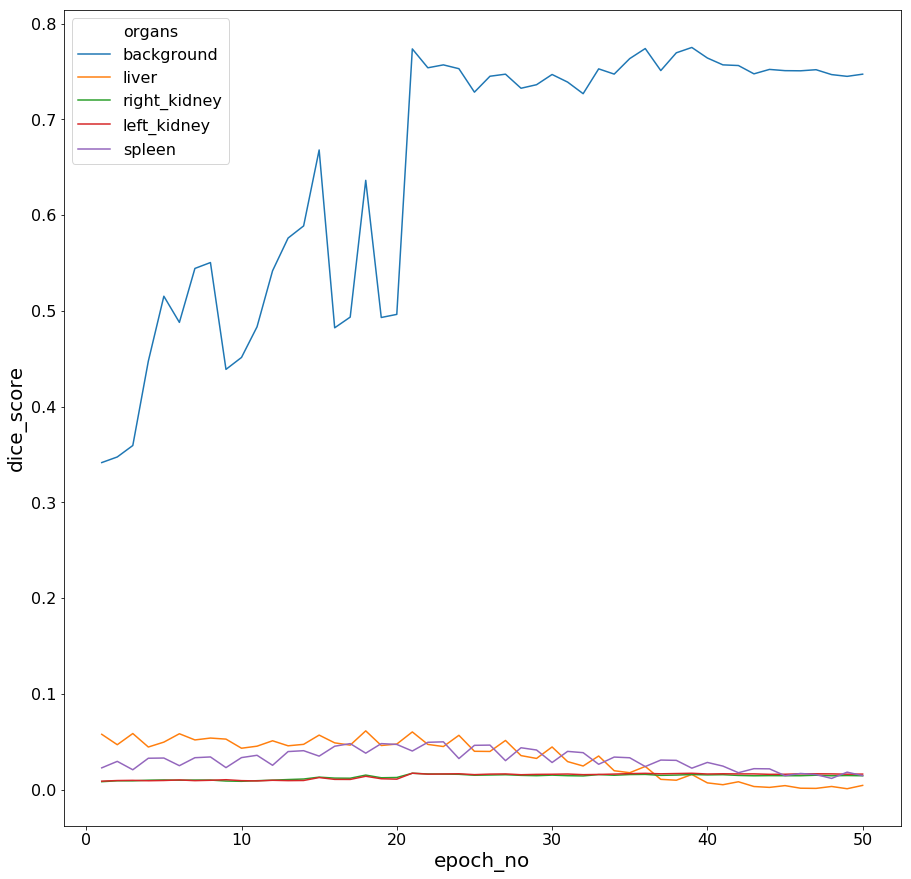

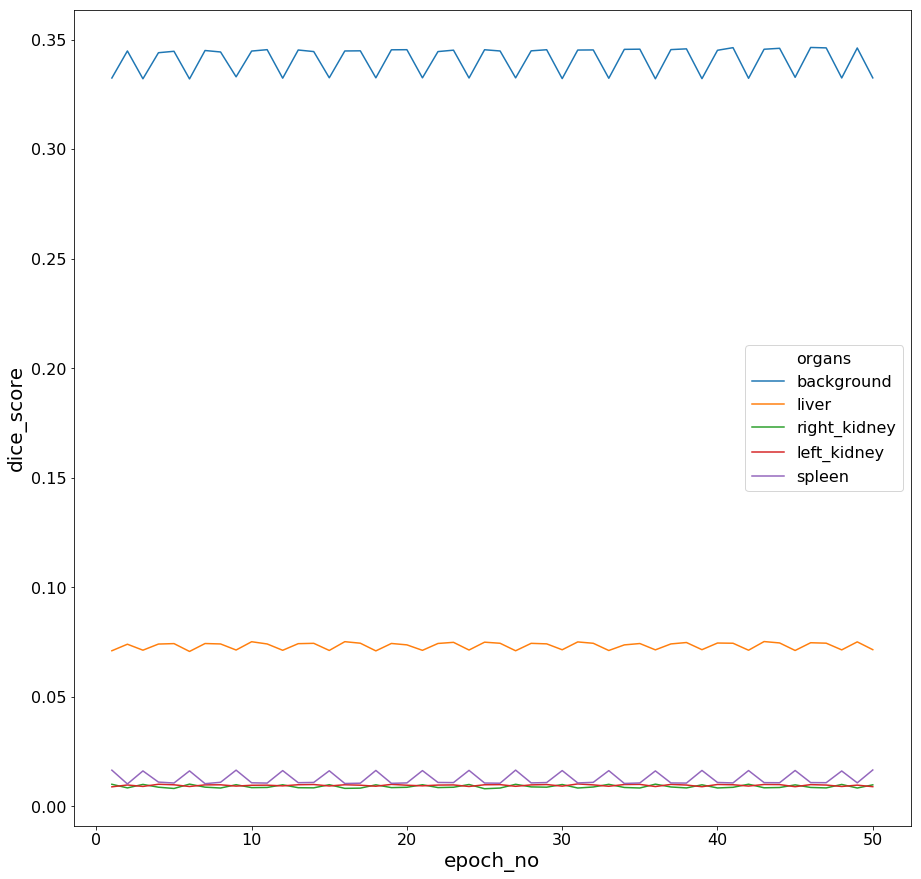

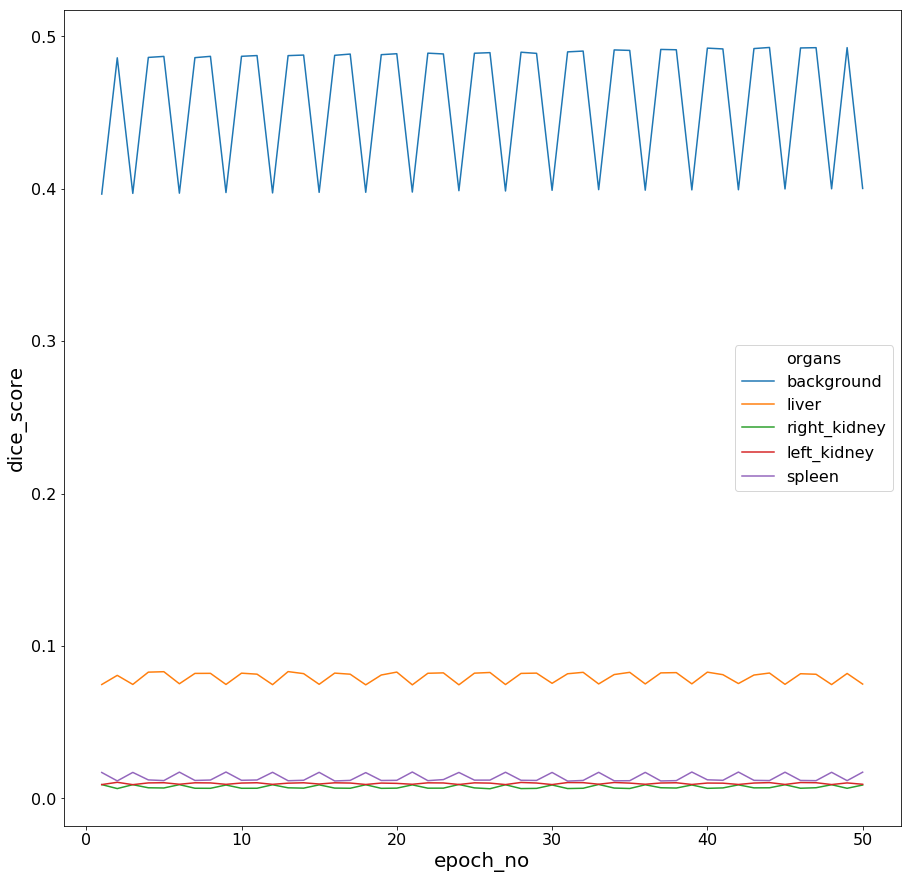

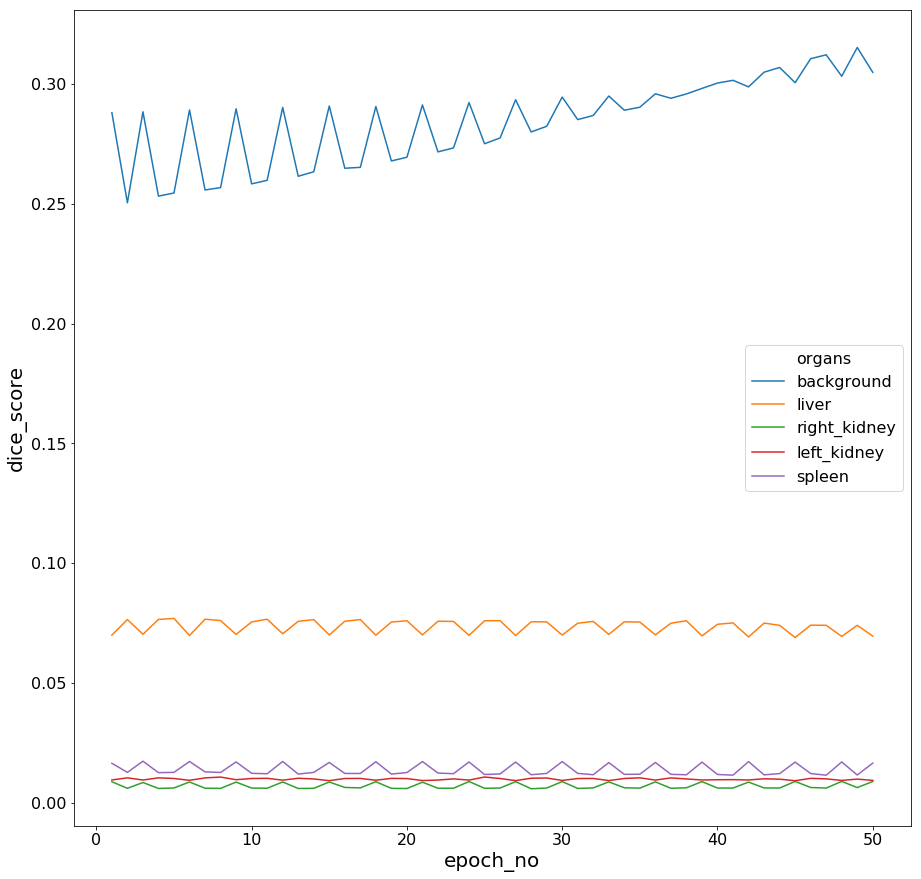

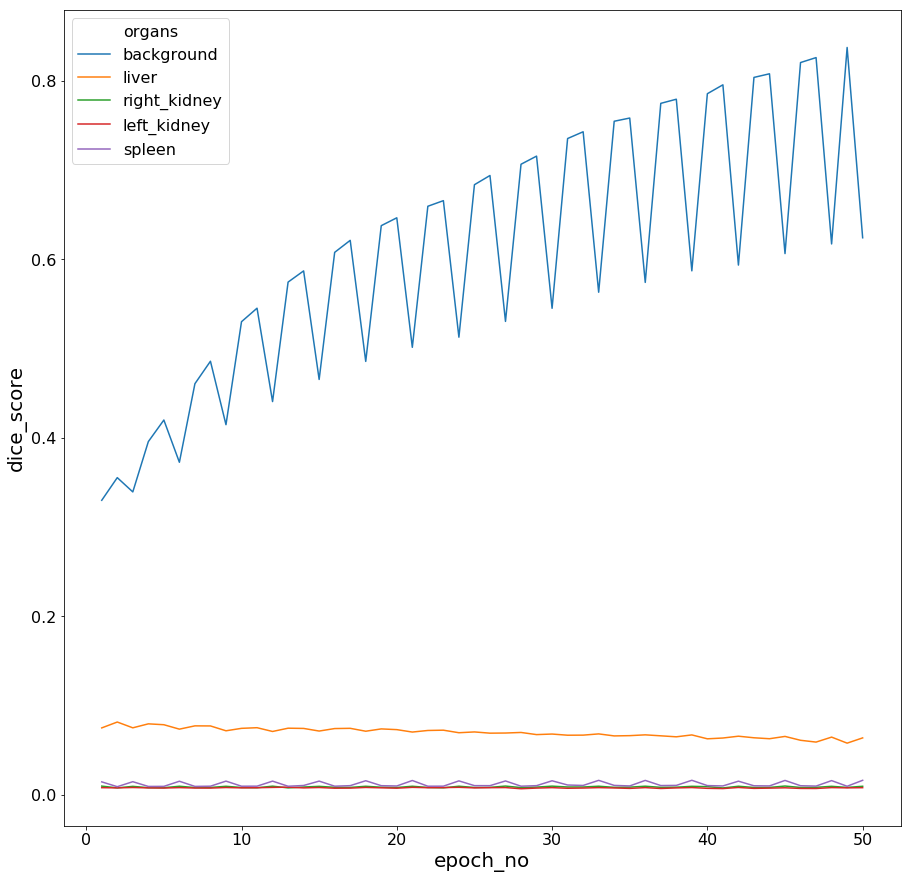

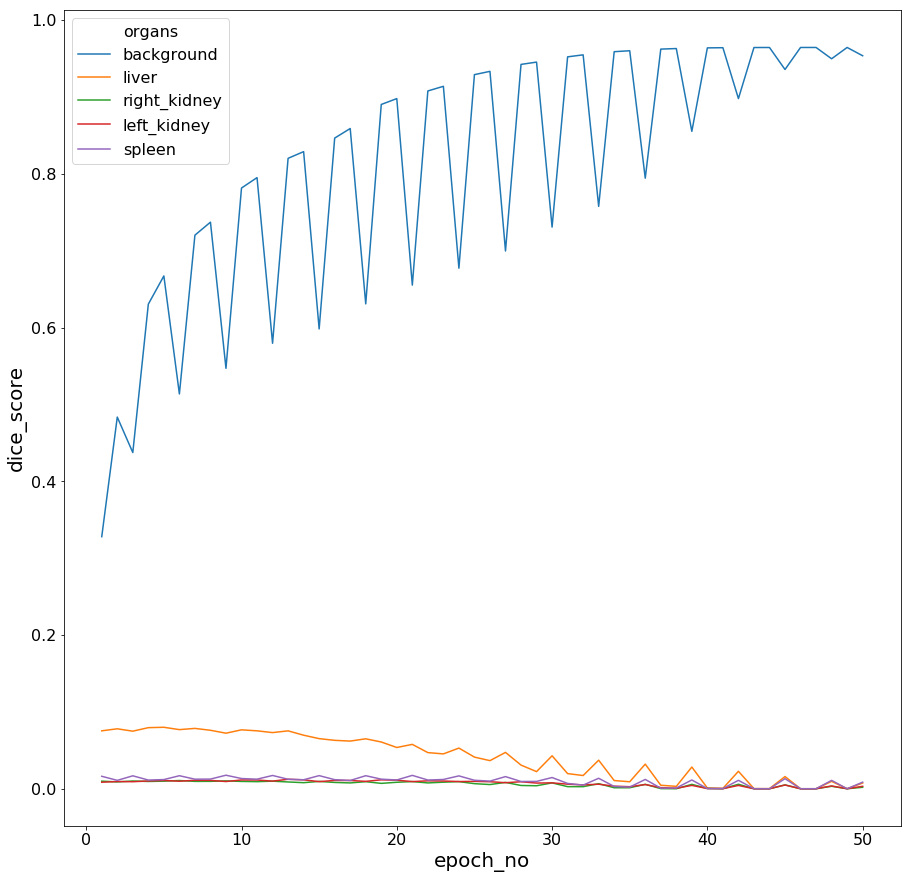

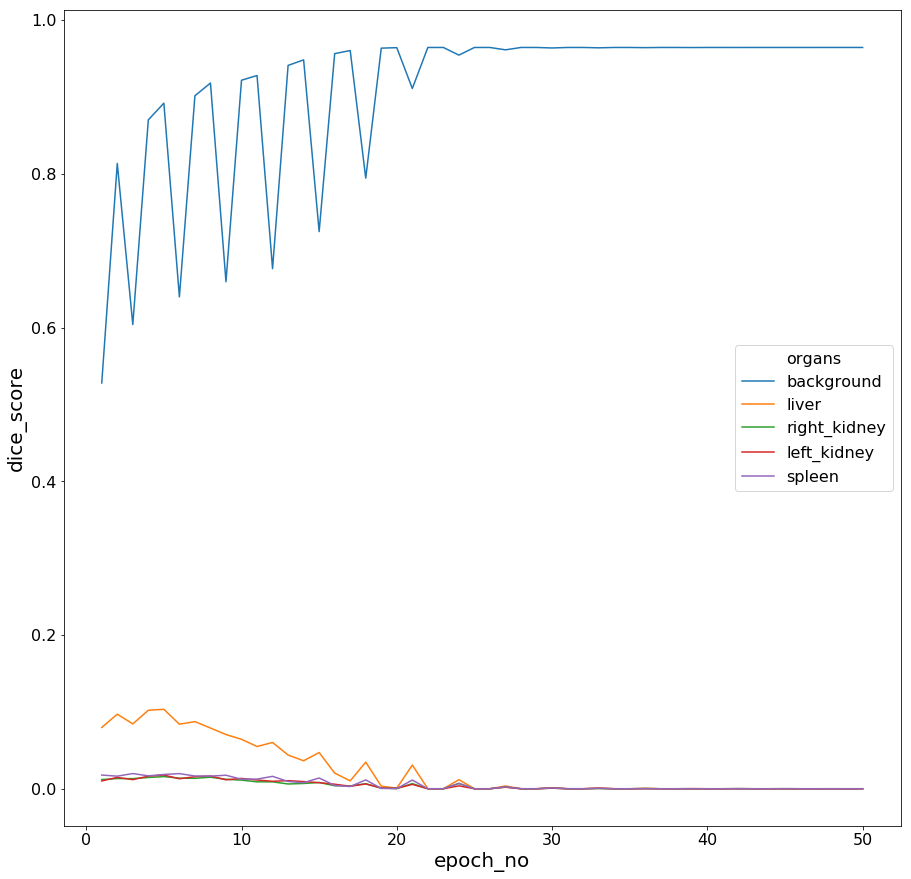

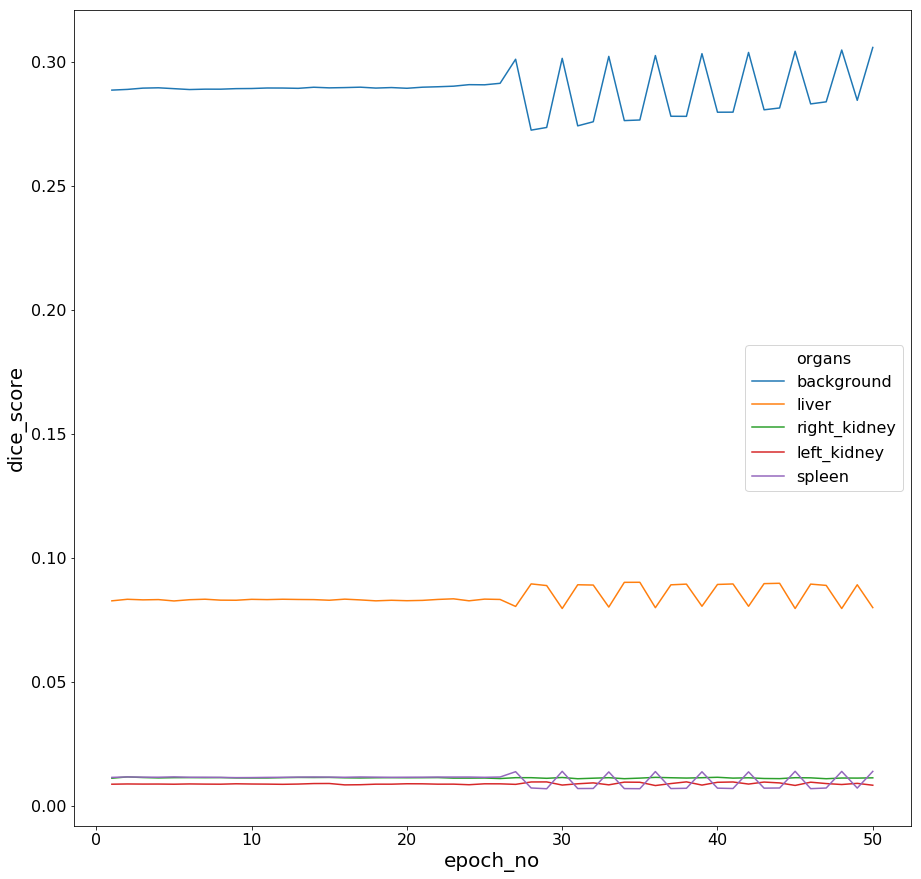

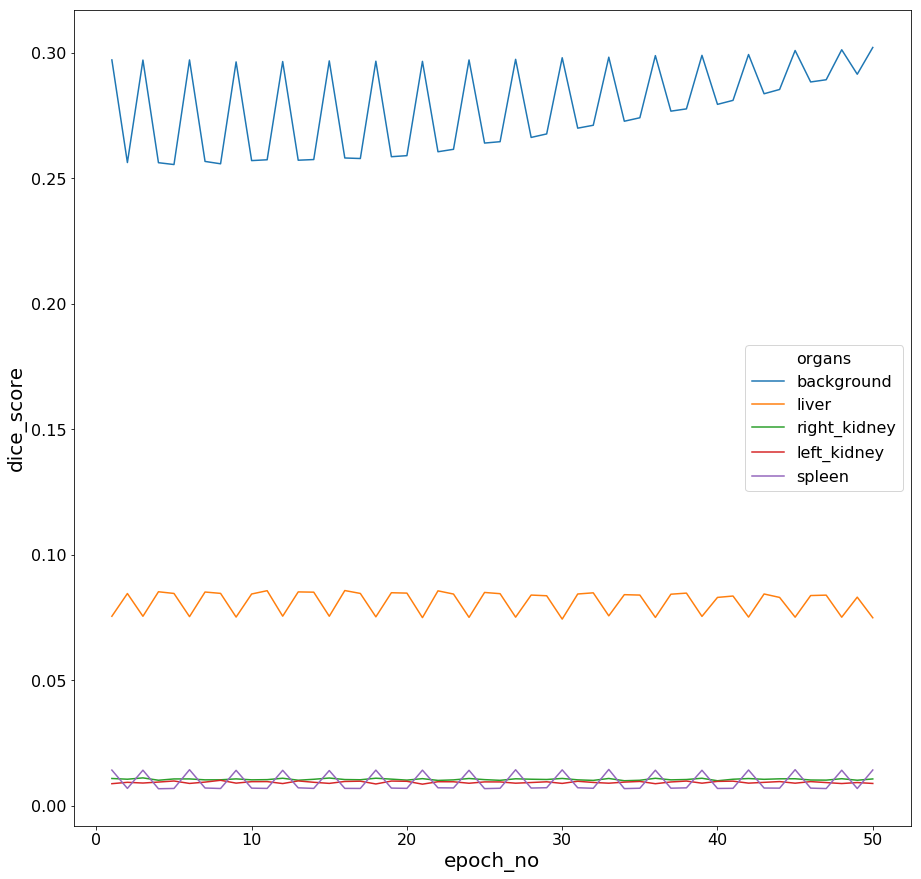

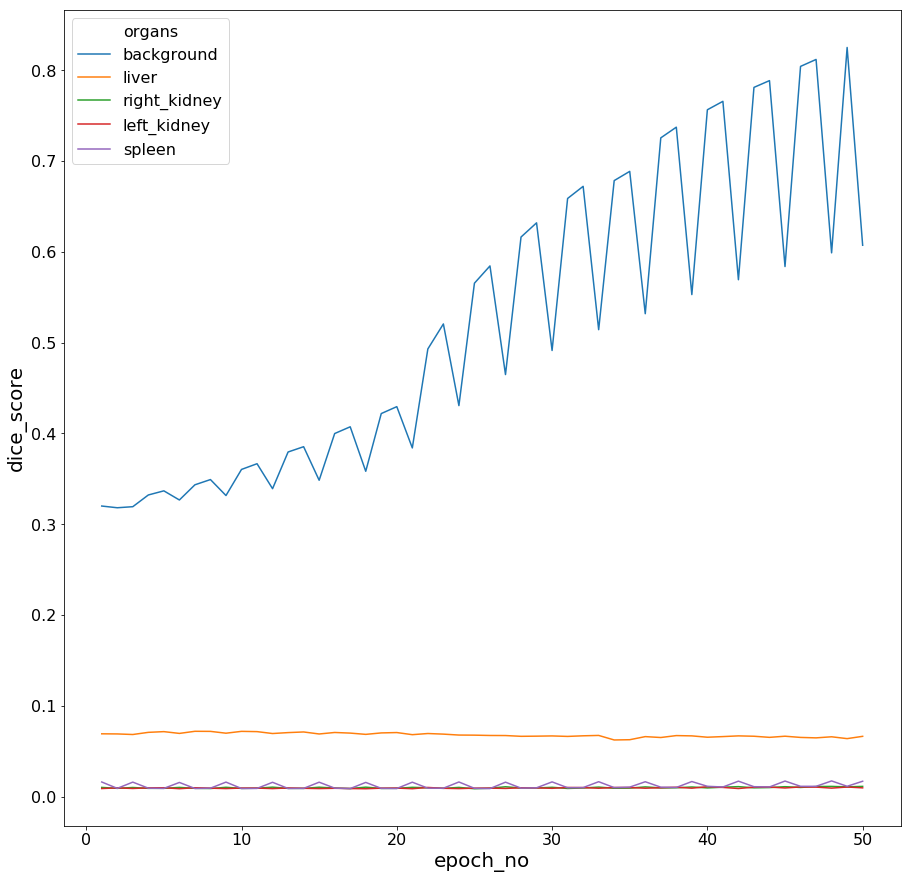

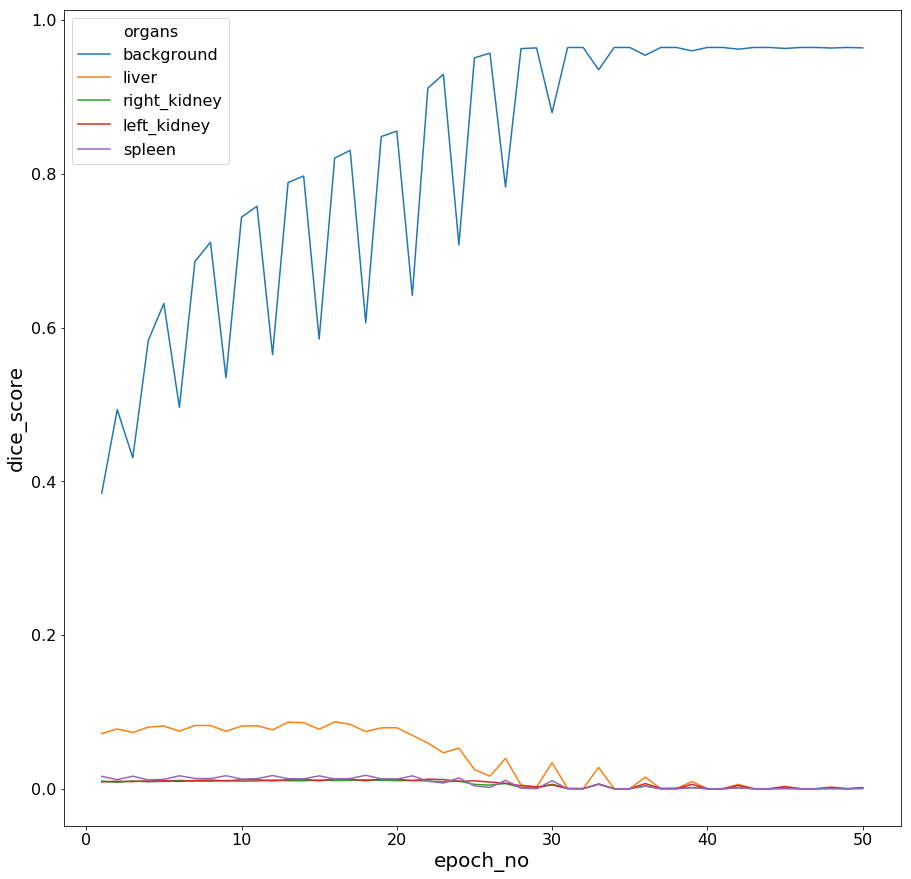

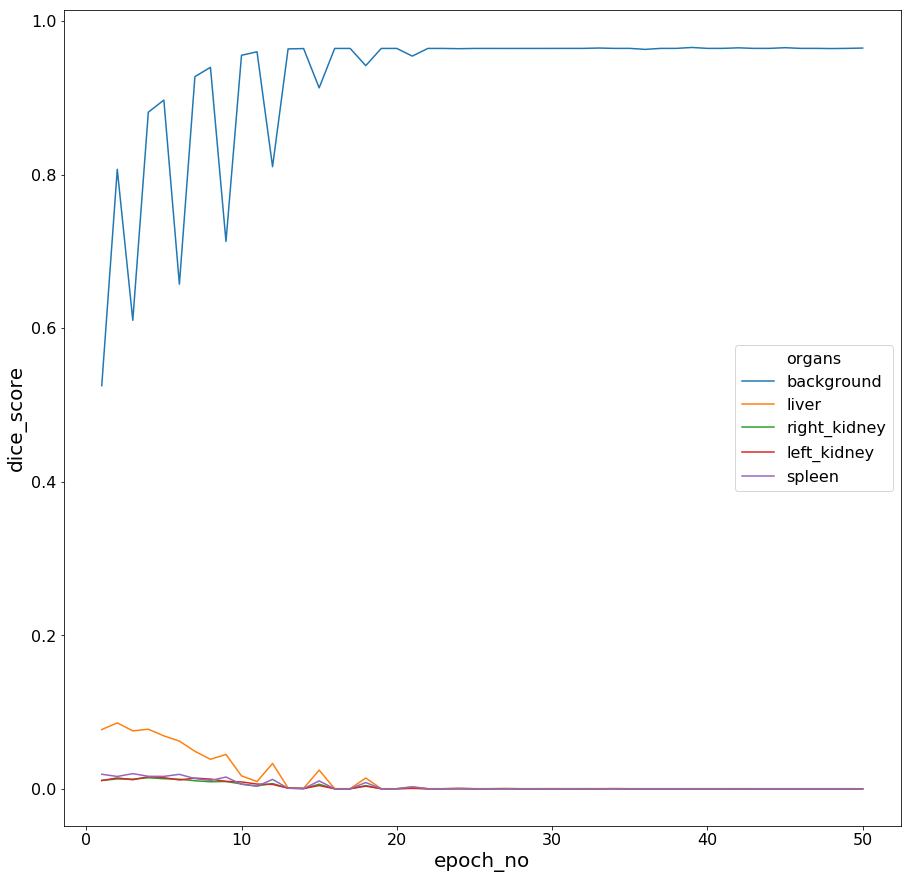

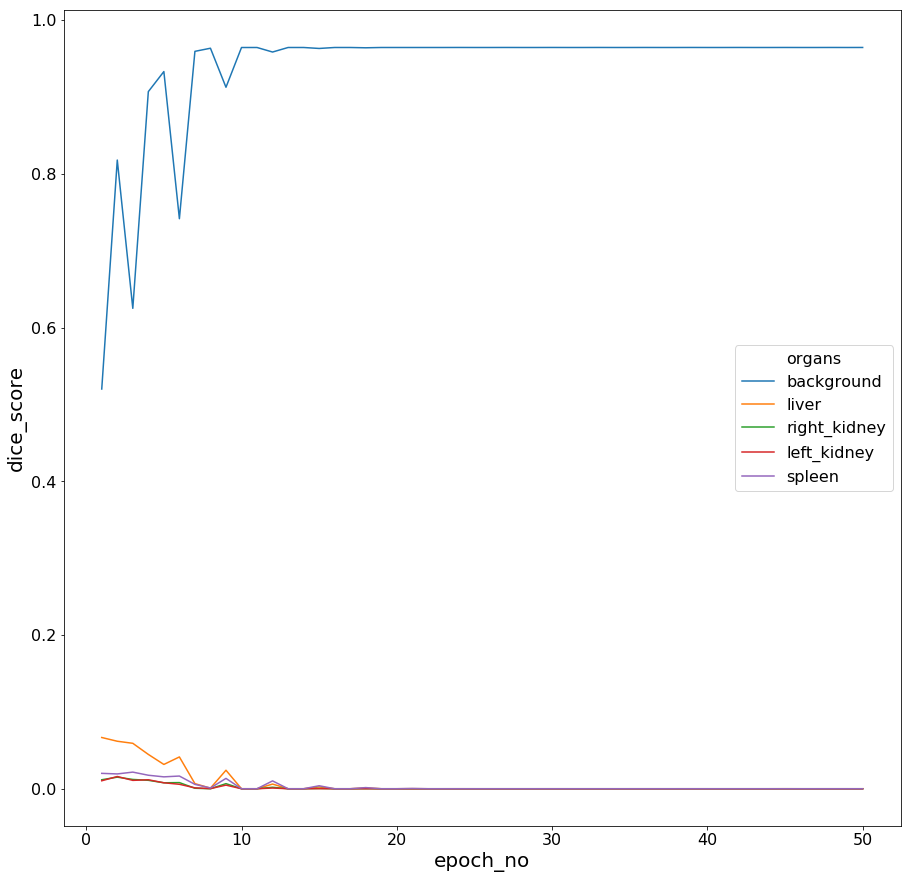

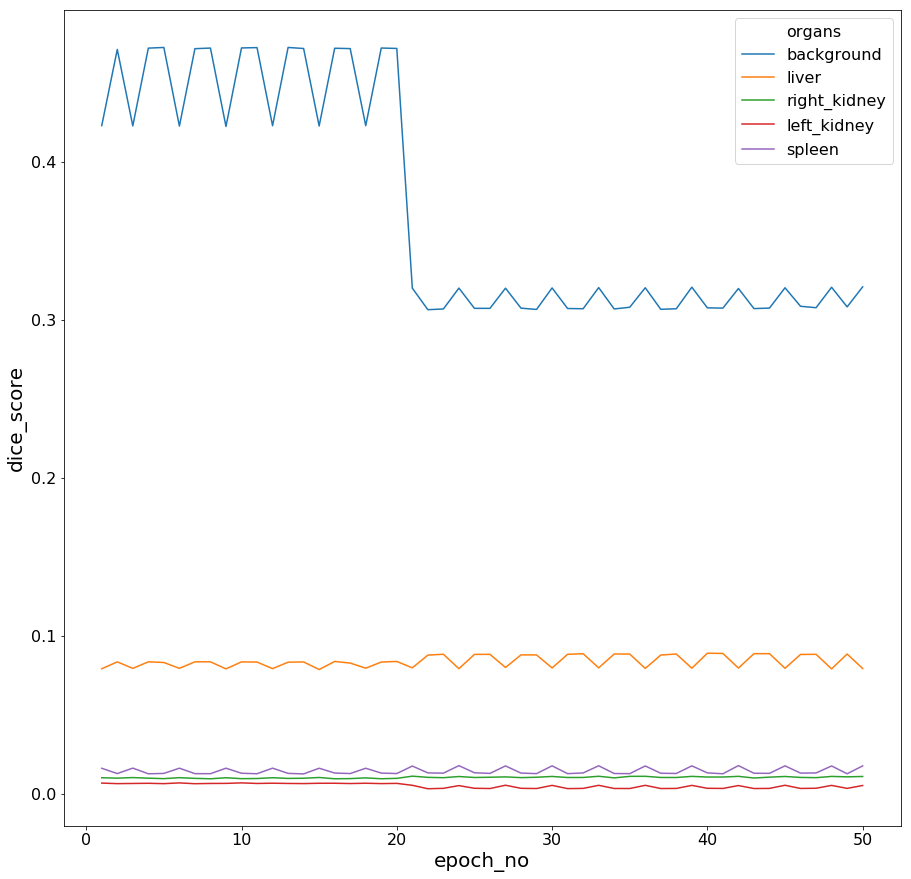

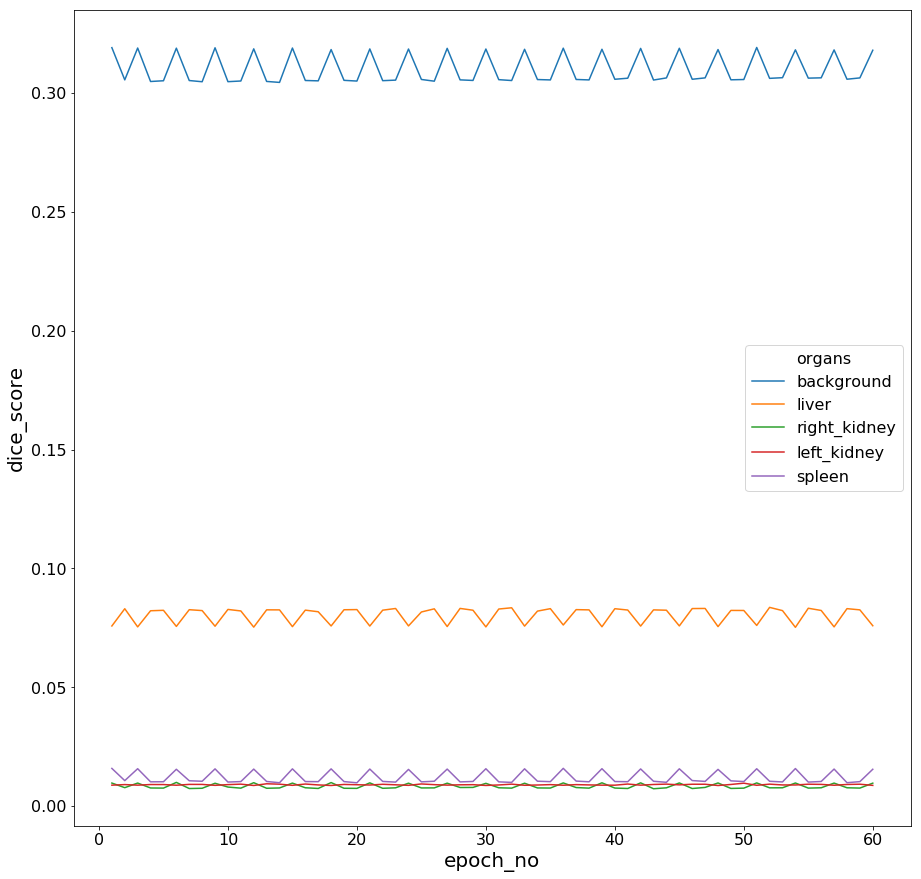

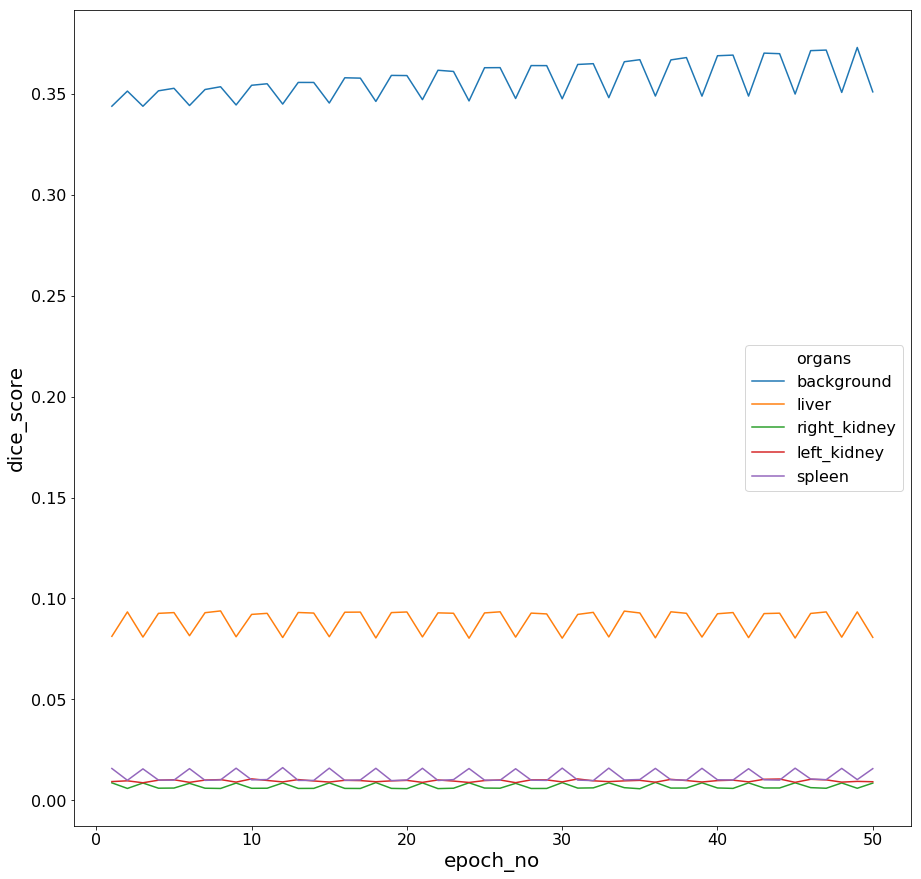

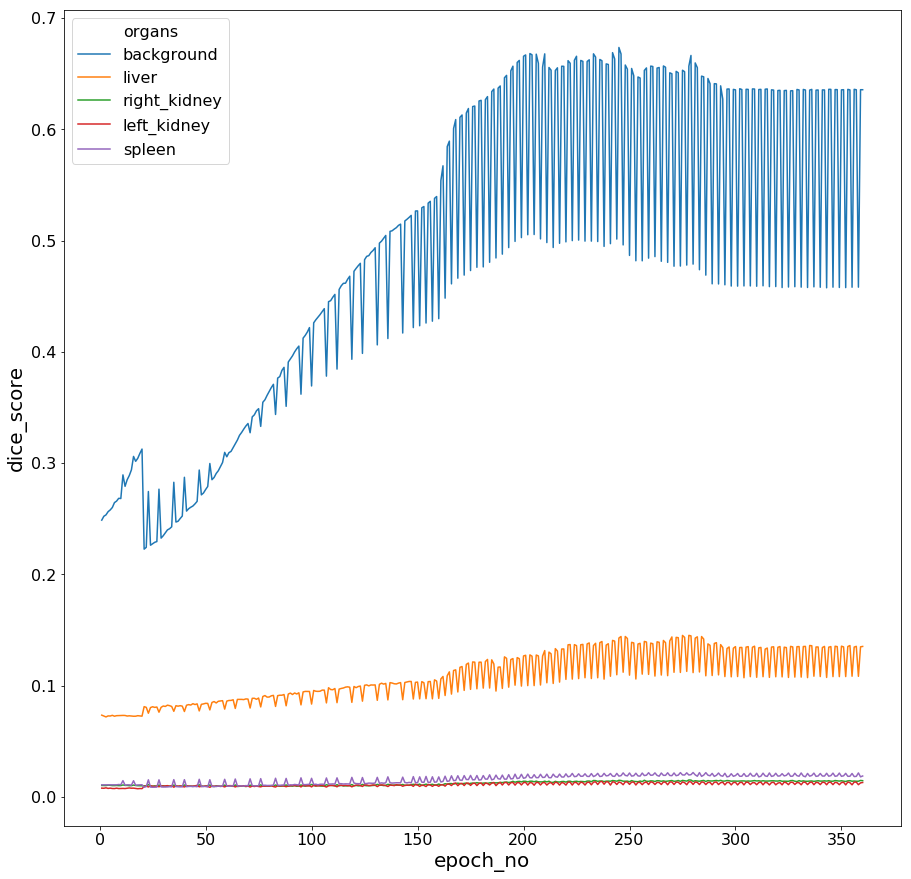

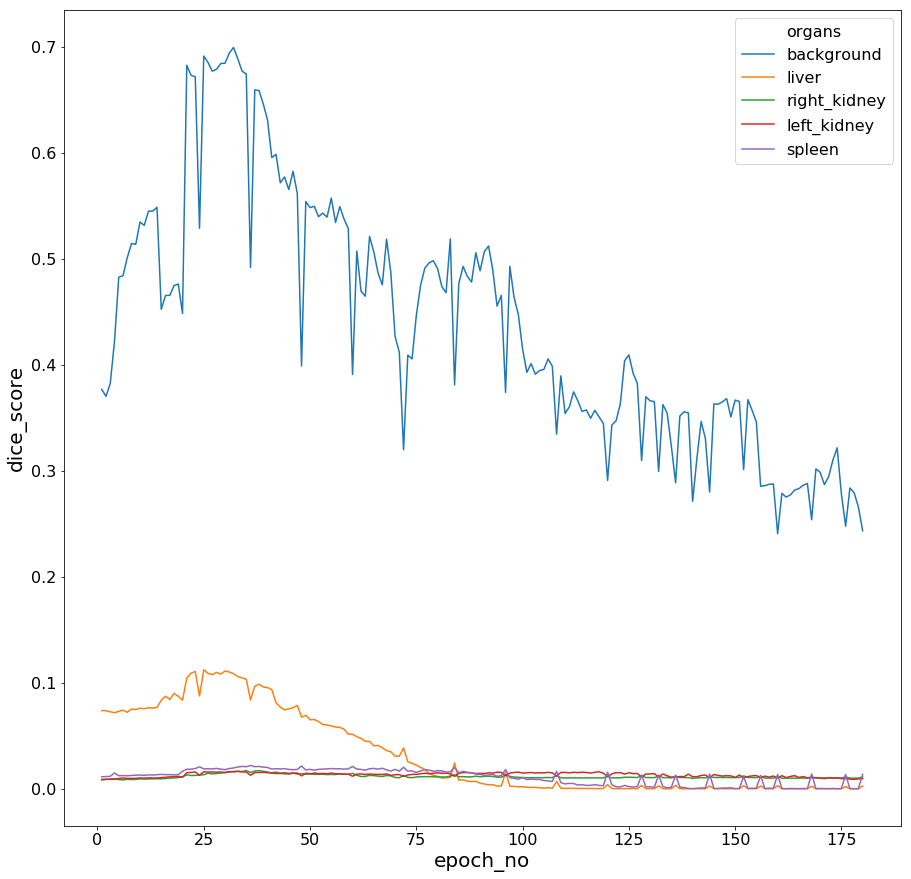

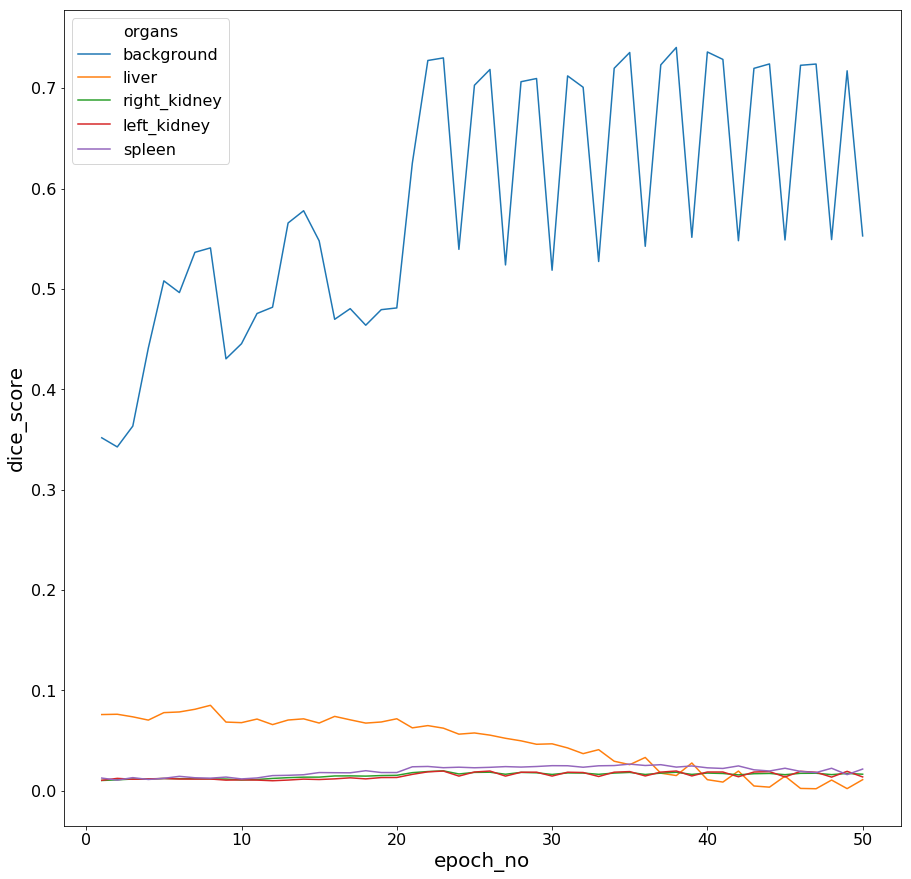

In [36]:

for dataset_type_str,vals in agg_df_melt_per_epoch.items():
    
    gen_multi_factor_plot_sns(vals,dst_dir_sample,x_axis="epoch_no",y_axis="dice_score",hue_cat='organs',
                              filt_cols=['loss_func','learn_rate'],dataset_type=dataset_type_str,
                              filt_func=filt_eq,fig_dim=(15,15),dpi=600)

## focal loss test set Segcaps plots

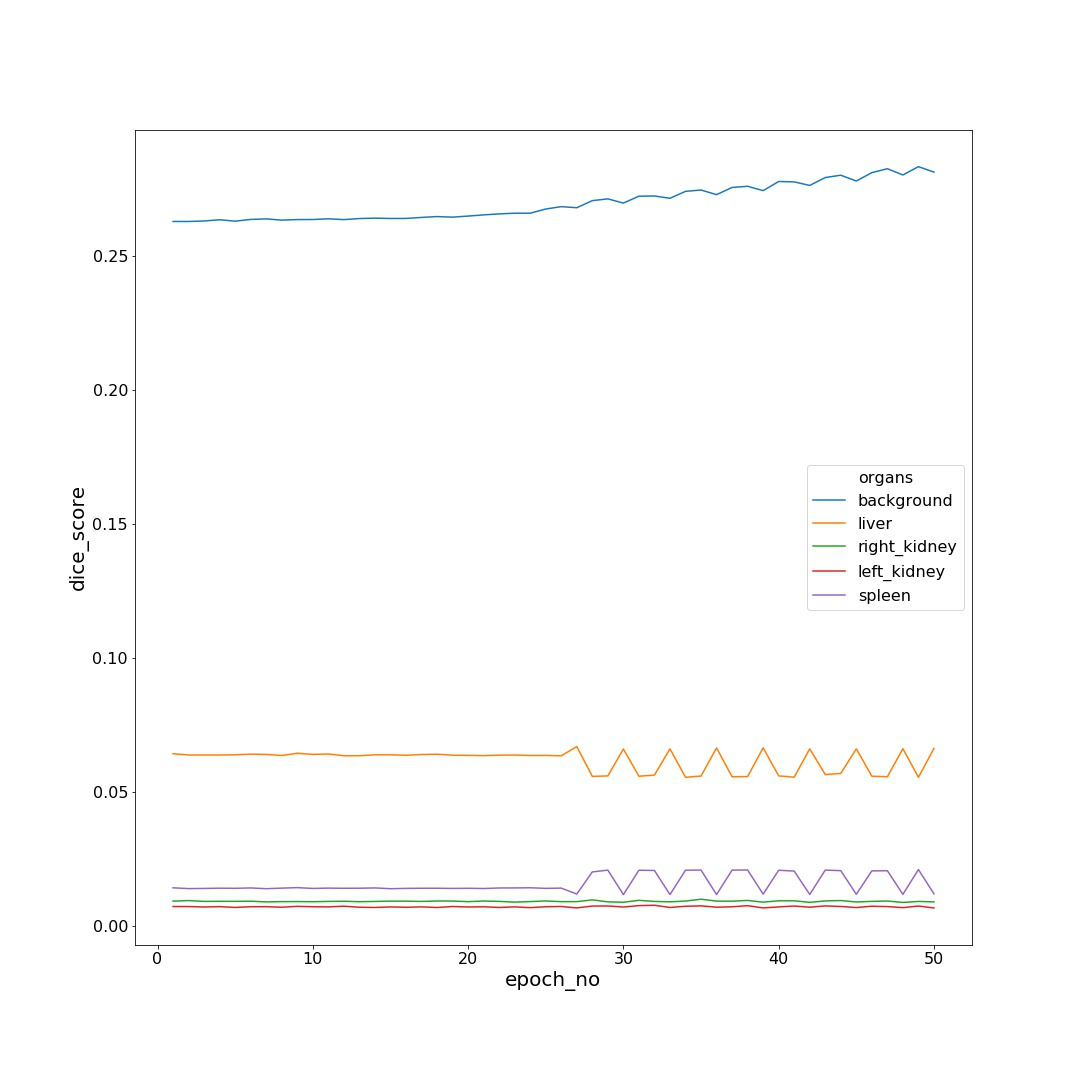

In [4]:
import imageio
from PIL import Image
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.0003.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

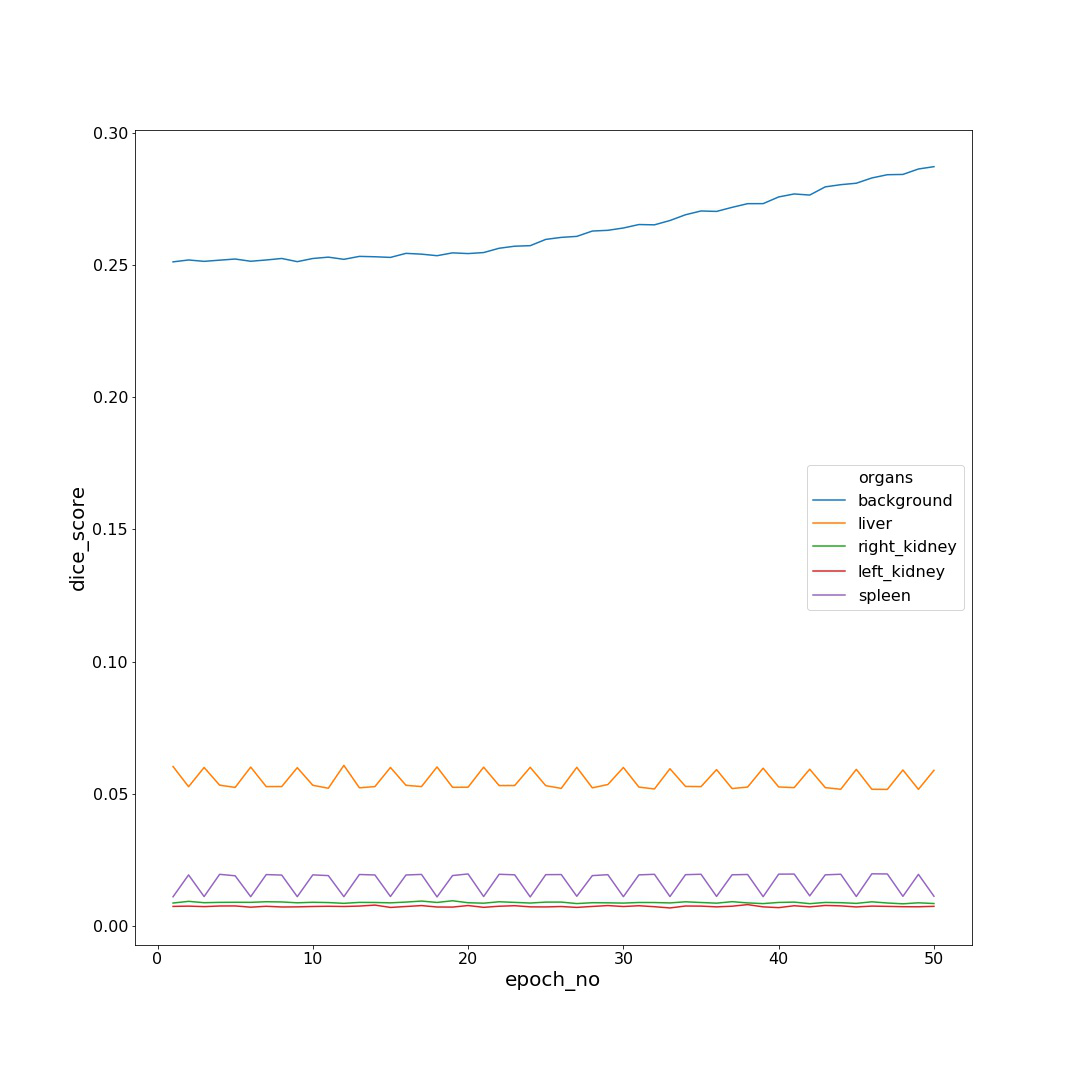

In [5]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.001.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

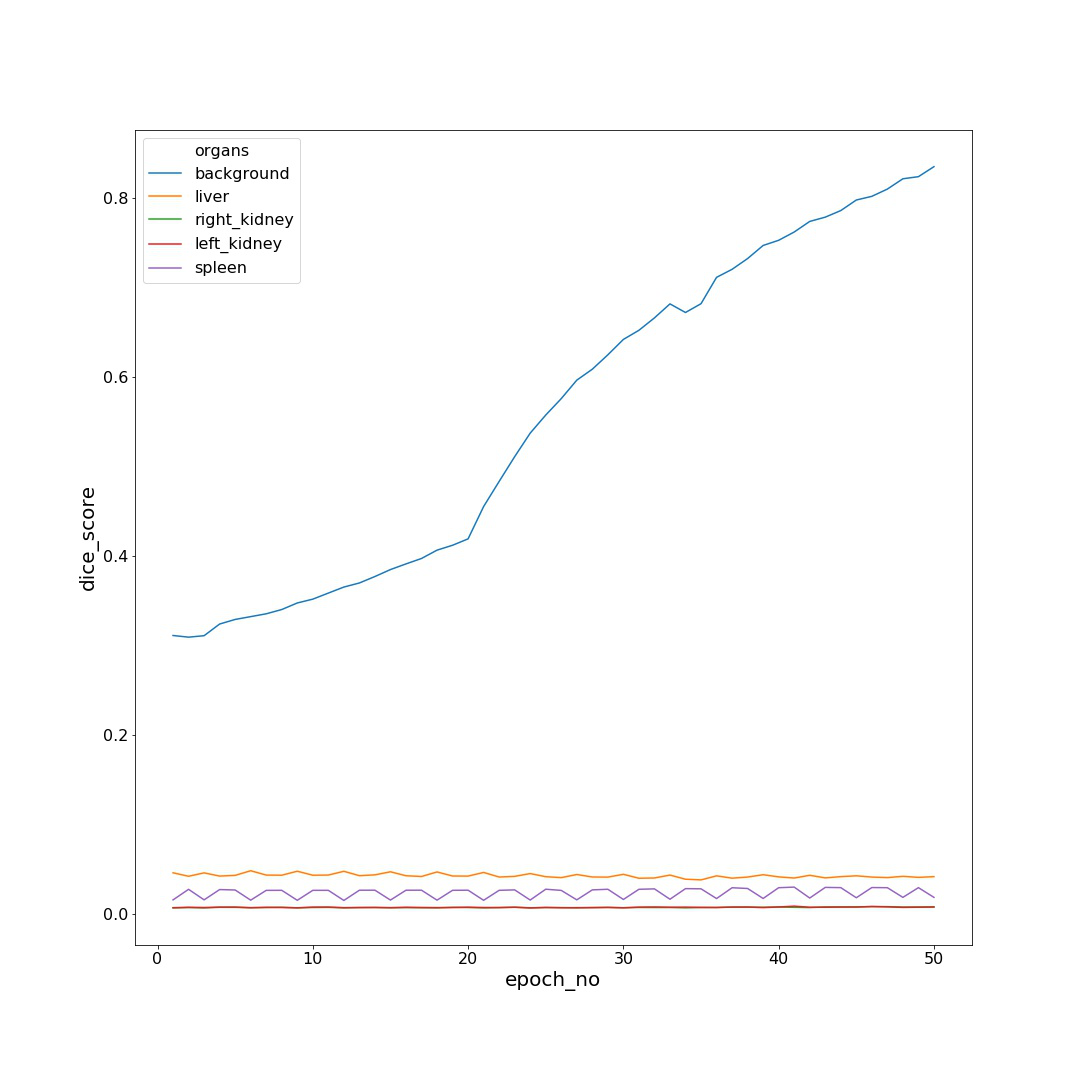

In [6]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.01.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

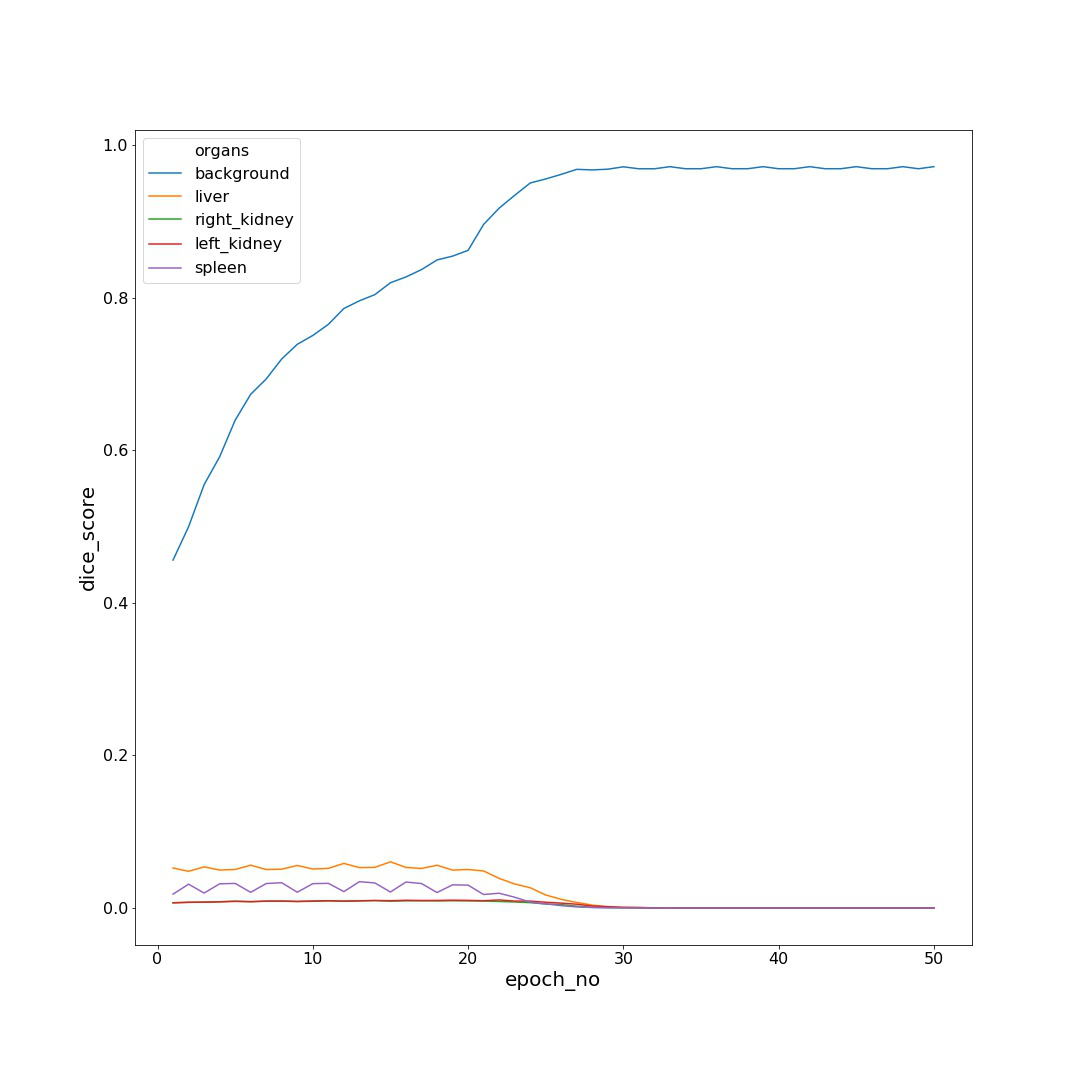

In [7]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_focal_learn_rate_0.1.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

## Dice loss test set Segcaps plots

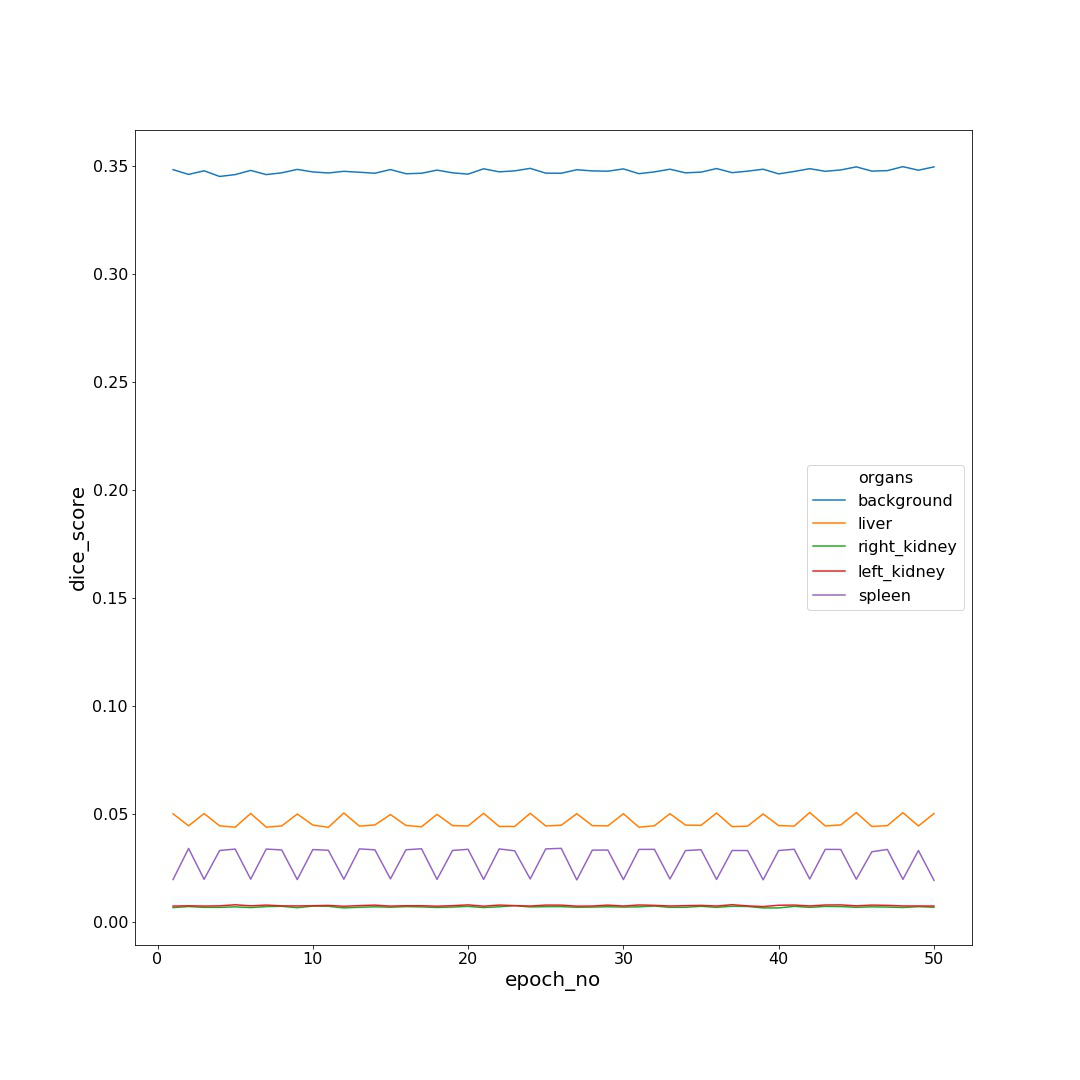

In [8]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.0003.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

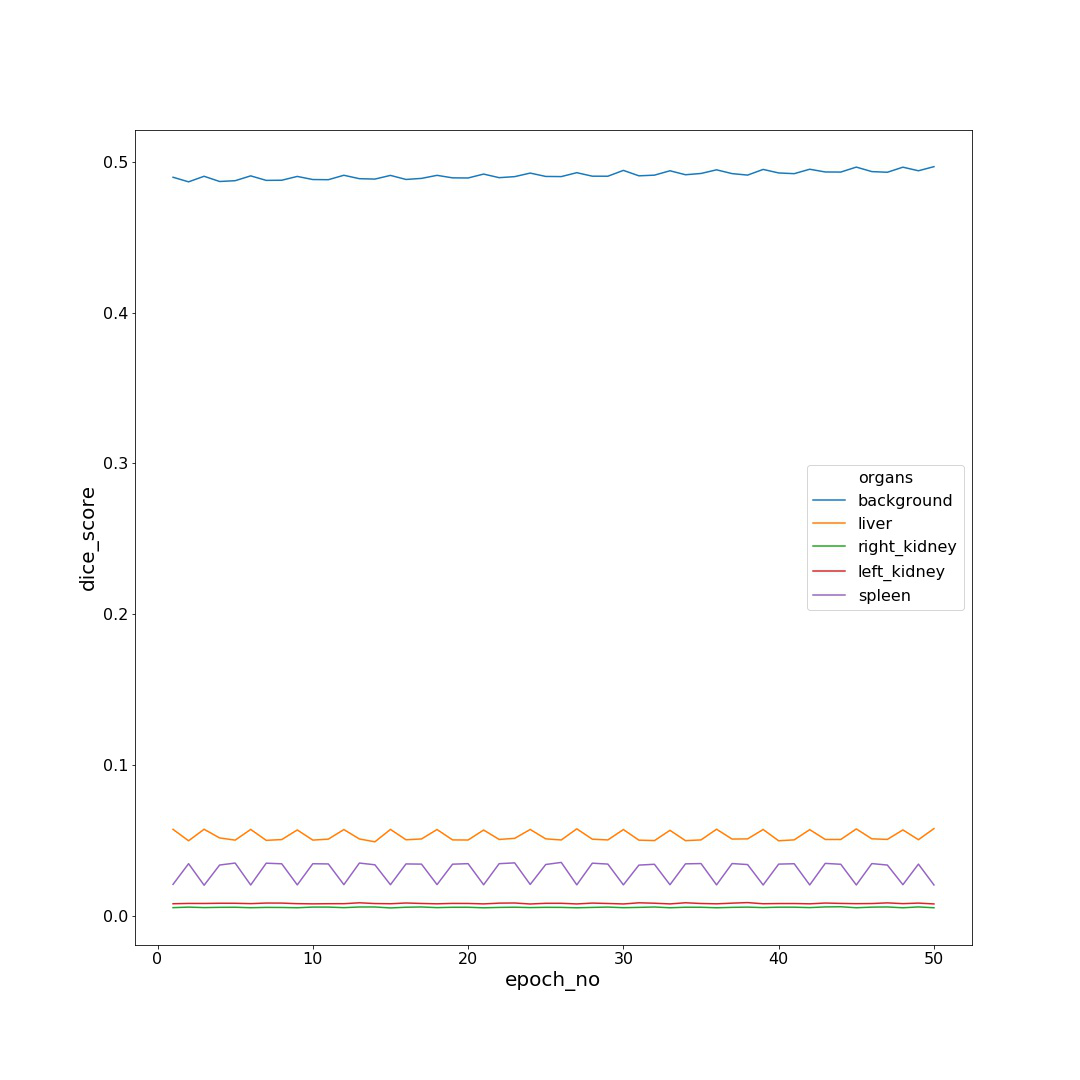

In [9]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.001.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

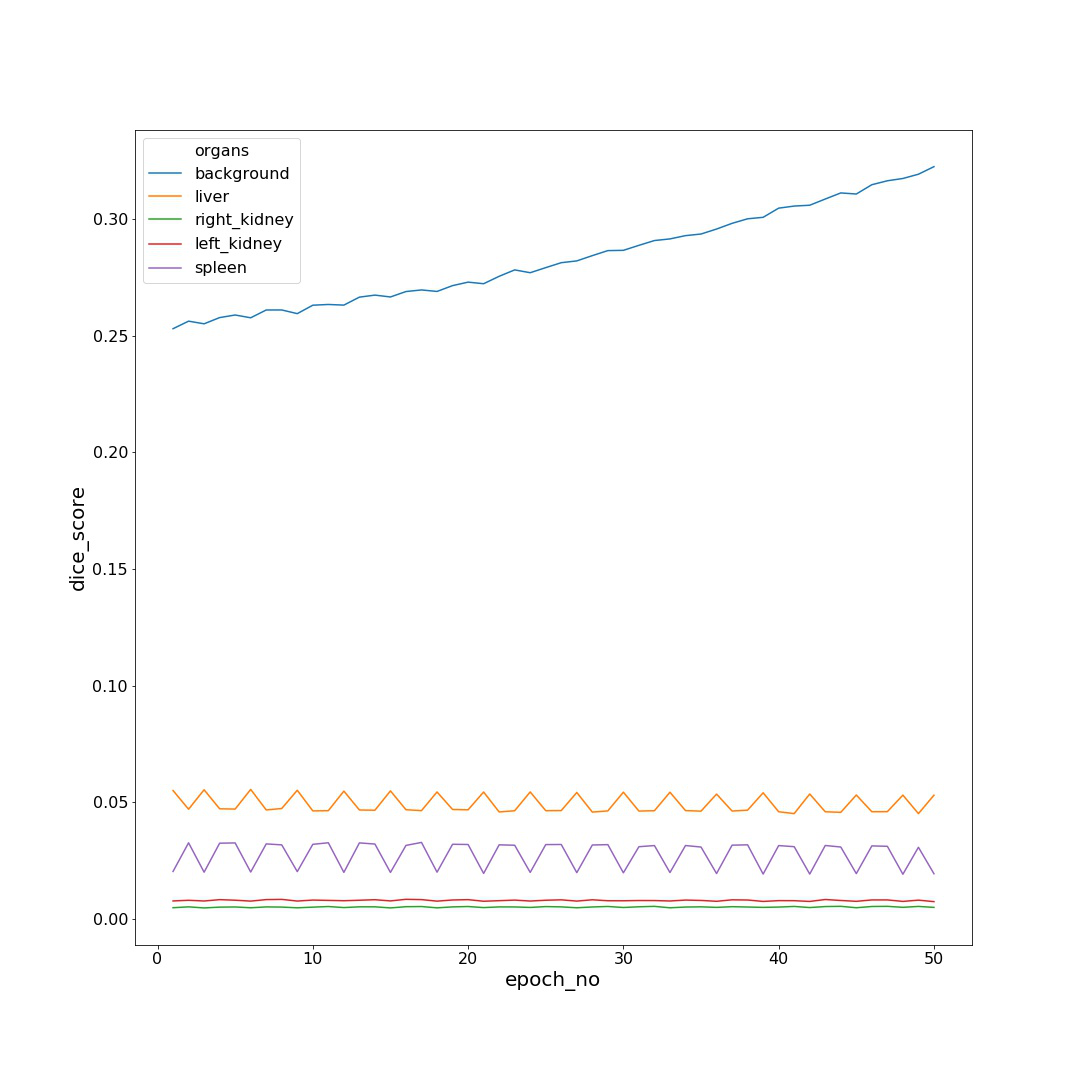

In [10]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.01.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

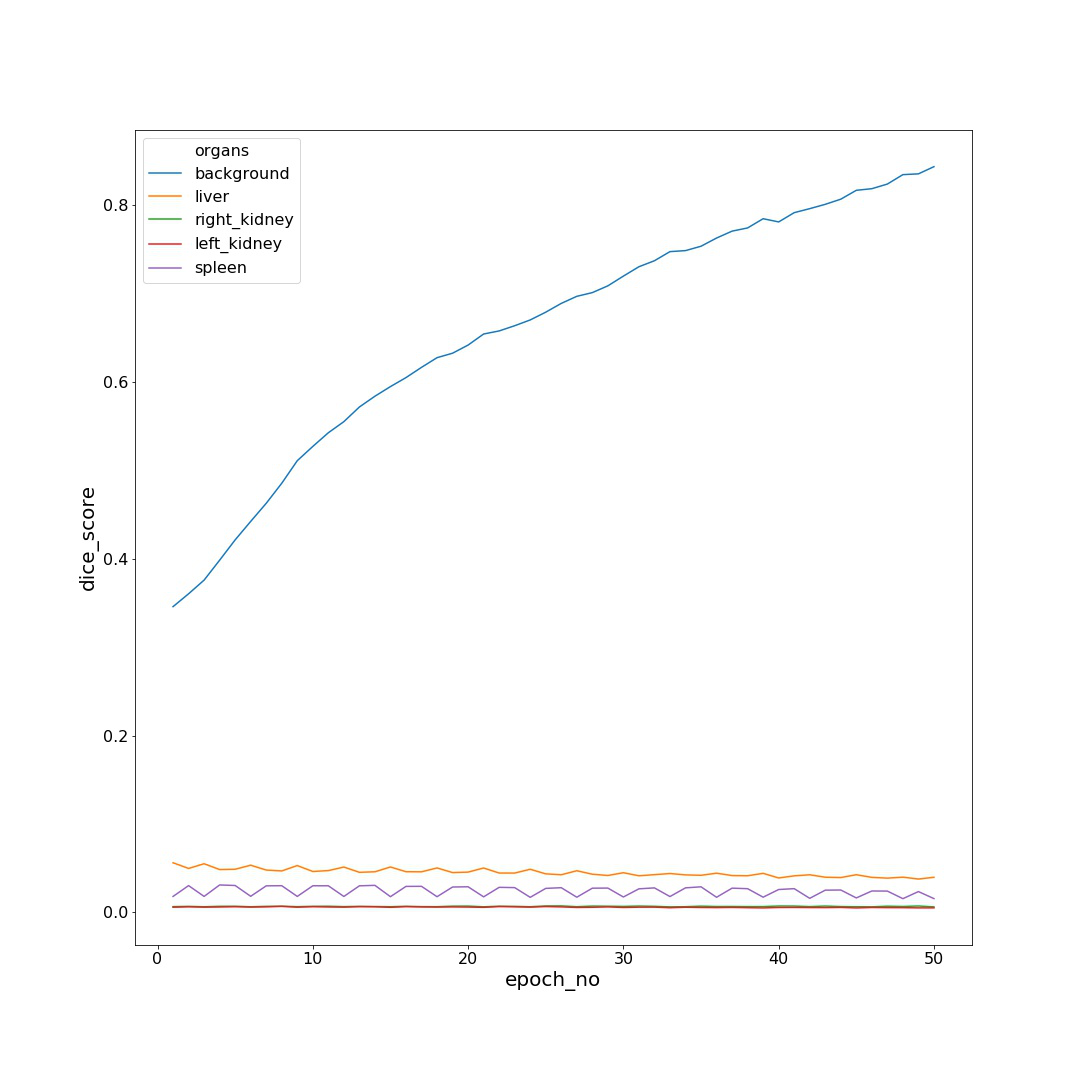

In [11]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_dice_learn_rate_0.1.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

## WCE 

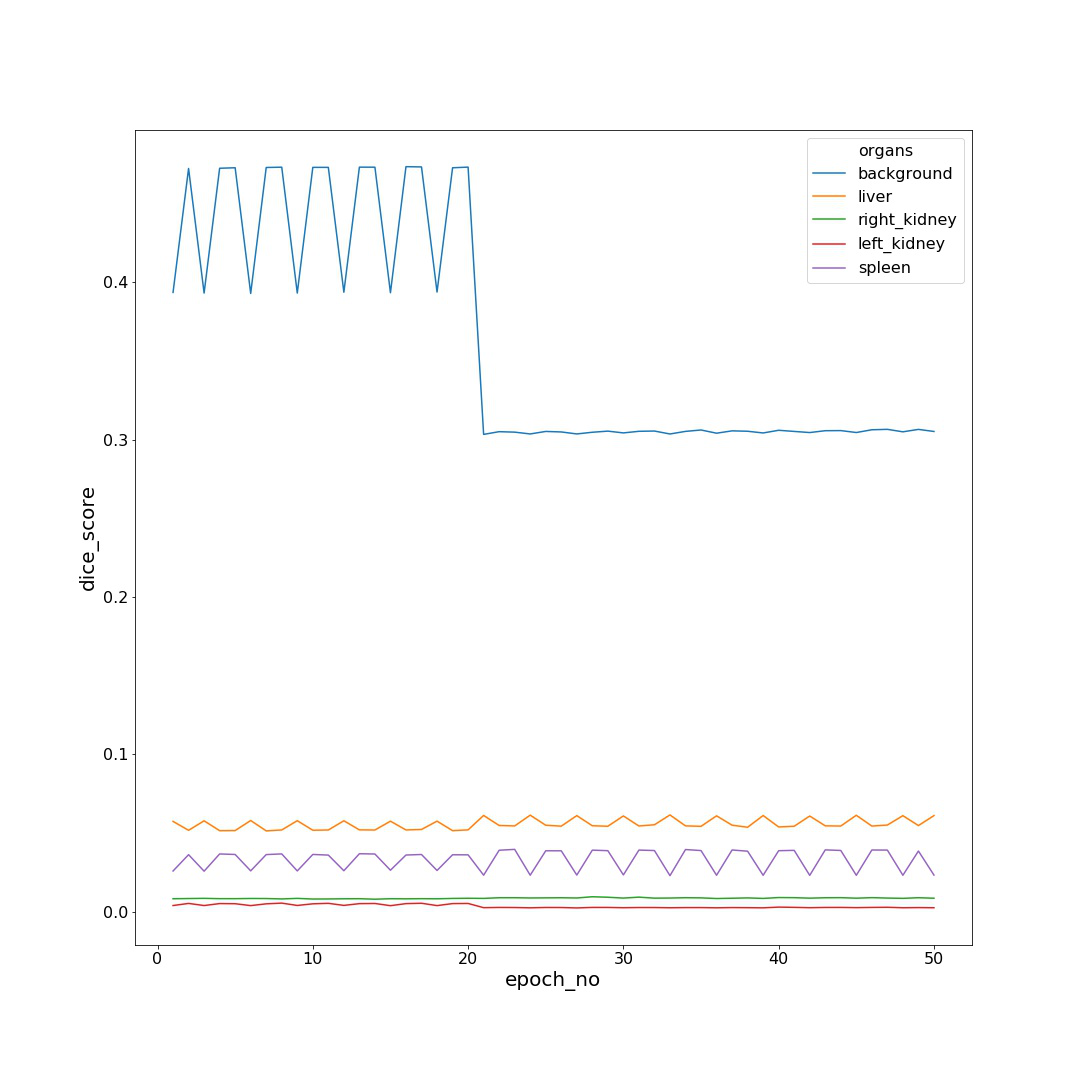

In [14]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_wce_learn_rate_0.0003.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

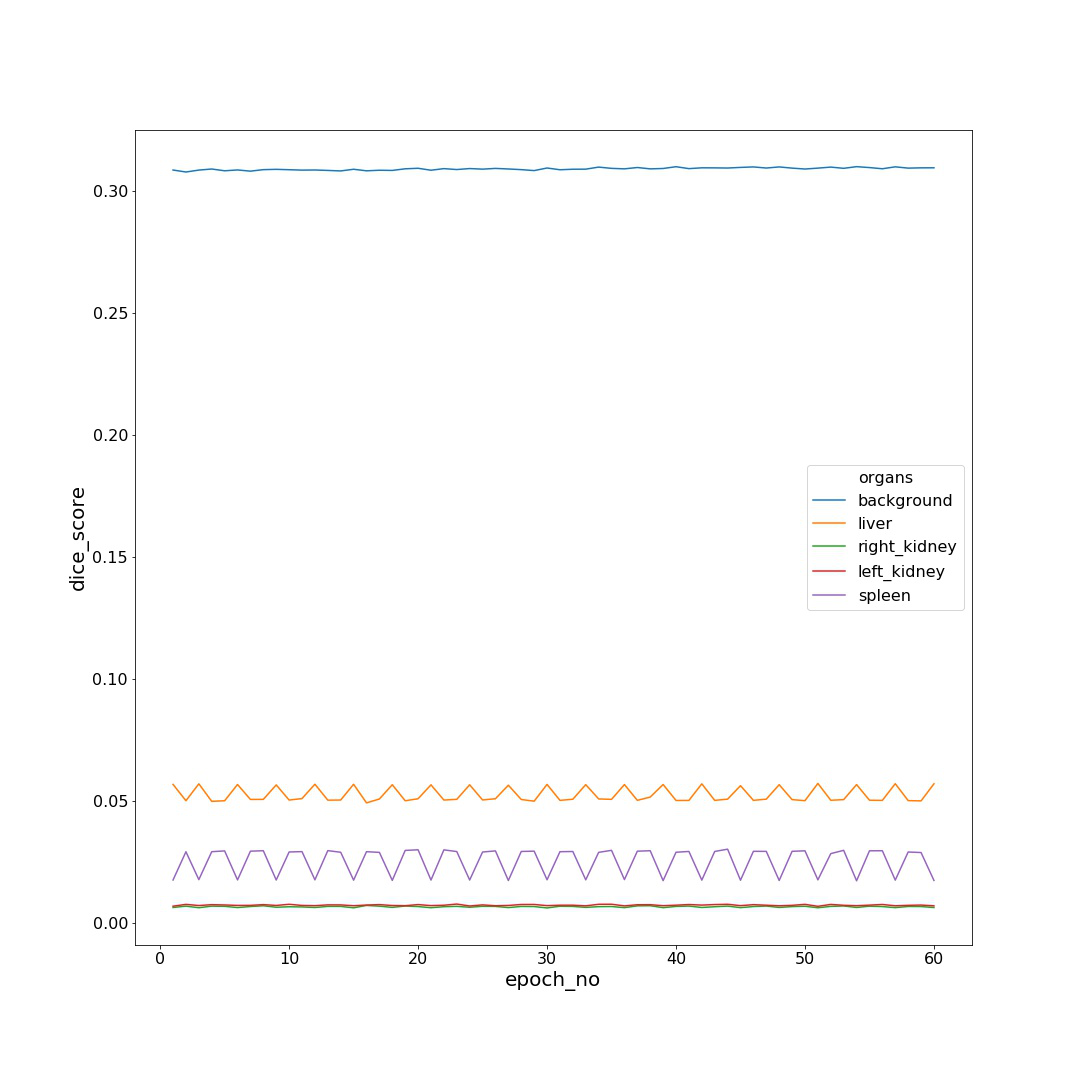

In [15]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_wce_learn_rate_0.001.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

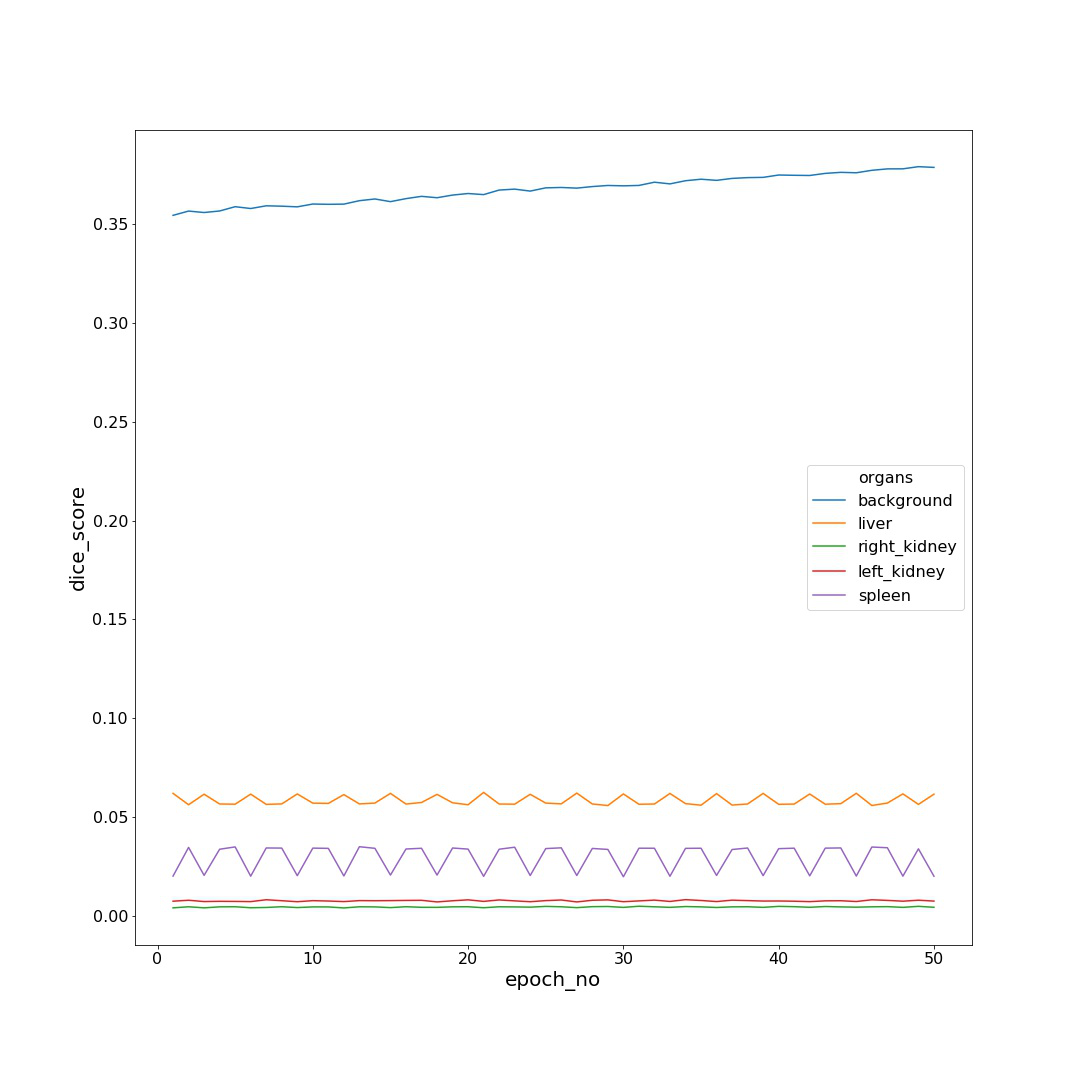

In [16]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_wce_learn_rate_0.01.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt

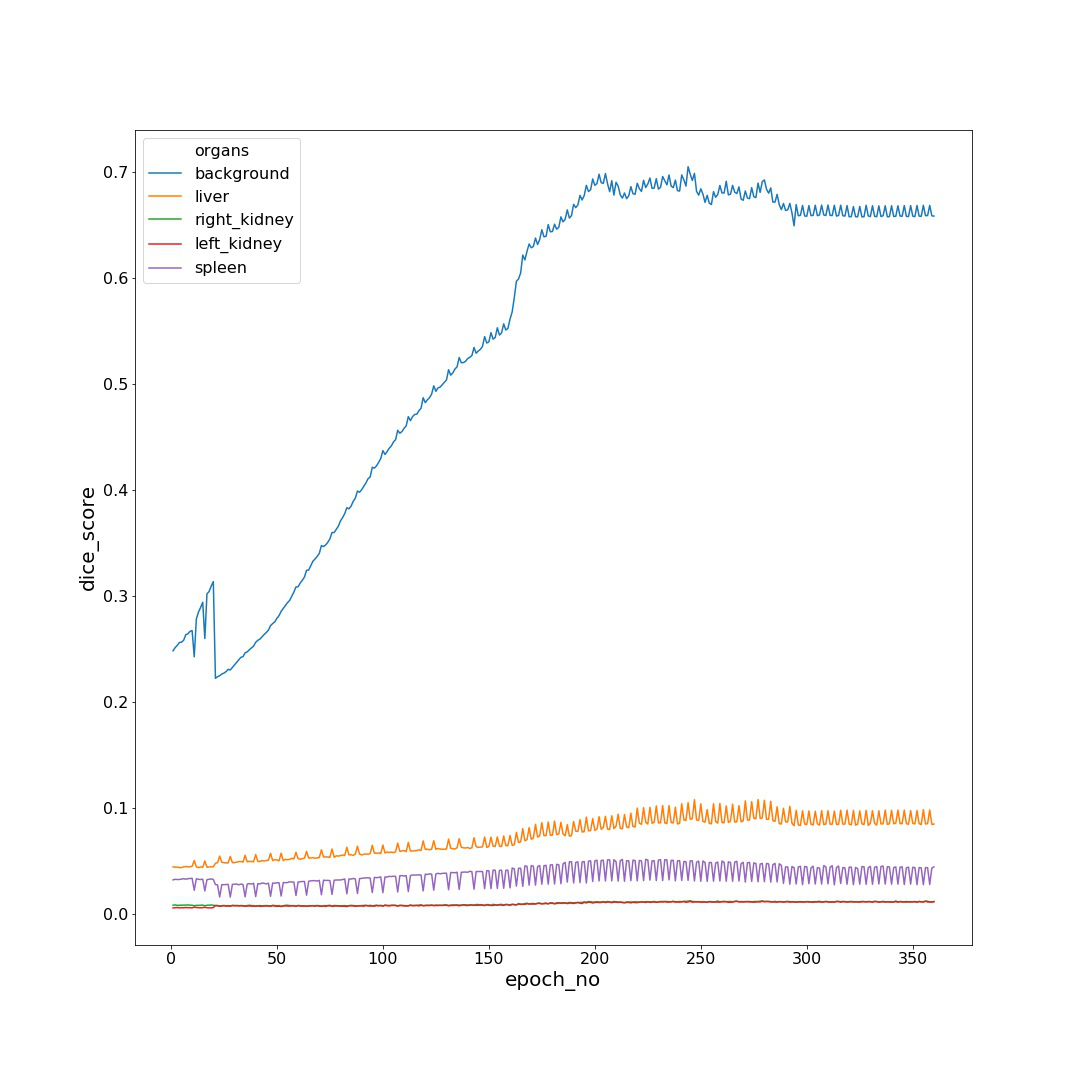

In [17]:
dst_dir_trl=os.path.join(dst_dir_sample,
                        'test_set_organs_dice_score_wrt_epoch_no_loss_func_wce_learn_rate_0.1.jpeg')
trl_plt=Image.fromarray(imageio.imread(dst_dir_trl))
trl_plt